In [1]:
# coding: utf-8    #  par défaut l'encoding est en utf-8 pour python 3

# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import re
import scipy.stats as st
import time
from math import *
from sklearn import preprocessing
import seaborn
import seaborn as sns
# from sklearn import decomposition
# import statsmodels.api as sm
# import statsmodels.formula.api as smf


In [2]:
# import sklearn
# sklearn.__version__

In [3]:
# Changer la taille de police par défaut
plt.rcParams.update({'font.size': 15})

pd.set_option('display.max_row', 2000)
pd.set_option('display.max_column', 300)
pd.set_option('display.column_space', 200)
pd.set_option('display.width', 10000)

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 20

<IPython.core.display.Javascript object>

In [5]:
# Source des datasets :  https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking/data


In [ ]:

Questions :  
    
1. Quel est l'id d'un bâtiment pour l'identifier en 2015 et 2016 ?   candidats :
 - 'OSEBuildingID'                   : comment être sûr qu'il pointe sue le même batiment ?          KO
 - 'TaxParcelIdentificationNumber'   : (pour 2016, il y a un 0 en plus à gauche.  Ex: 0653000225 )   Ok mais avec modifs
    659000030  :   9  chiffres
    1142000500 :   10 chiffres
    '6850700316 and 6850700315'   parfois
    NaN
    => Régles: Rajouter un '0' pour les nombres à 9 chiffres pour le dataset 2015
               comptabiliser le nombre de NaN
               comptabiliser le nombre de double Nombres => taille > 10

2. Quelle est l'année la plus complete une fois supprimées les colonnes sans intérêts ?
    
   
# ---------------------------------------------------------------------------------------------------------------
# Exemple 2015 :

OSEBuildingID       =  1
DataYear            =  2015
BuildingType        =  NonResidential
PrimaryPropertyType =  Hotel
PropertyName        =  MAYFLOWER PARK HOTEL
TaxParcelIdentificationNumber =  659000030
Location            =  {\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', 
                        \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}
                        location plus accessible dans le dataset 2016
                        
CouncilDistrictCode =  [7, 3, 2, 4, 5, 6, 1]  : 7 districts pour Seattle  / les 7 districts regroupent des quartiers
Neighborhood        =  ['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH', 'MAGNOLIA / QUEEN ANNE', 'LAKE UNION',
  (quartier)                      'GREATER DUWAMISH', 'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE']                 
   Le quartier précise en quelque sorte le district
Zip Codes              =  [18081, 19576, 18379, 18800, 18383, 18789, 19579, 18390, 18377, 18235, 18792, 18386, 17919, 19575, 
   (code postal)           19578, 19581, 19582, 17920, 18385, 18388, 19584, 18798, 17916, 18795, 17923, 17926, 18229,18376,18230]
latitude-Longitude
                        
YearBuilt           =  1927,... pas de NaN, cool !
NumberofBuildings   =  1
NumberofFloors      =  12.0
PropertyGFATotal    =  88434                                : surface de plancher hors œuvre
PropertyGFAParking  =  0
PropertyGFABuilding(s)          =  88434
ListOfAllPropertyUseTypes       =  Hotel, Parking, Restaurant, pool
LargestPropertyUseType          =  Hotel
LargestPropertyUseTypeGFA       =  88434.0
SecondLargestPropertyUseType    =  Parking
SecondLargestPropertyUseTypeGFA =  15064.0
ThirdLargestPropertyUseType     =  Restaurant
ThirdLargestPropertyUseTypeGFA  =  4622.0
YearsENERGYSTARCertified        =  NaN   

                        
                        
ENERGYSTARScore       =  65.0           (1 - 100)   Quelle énergie Site ou Source est utilisée pour calculer ce score ?
                                                    EPA recommends using Source energy.
                        
SiteEUI(kBtu/sf)      =  78.9          : energie consommé par foot carré (square foot), sous-entendu ici pour 1 an
SiteEUIWN(kBtu/sf)    =  80.3
                        
SourceEUI(kBtu/sf)    =  173.5
SourceEUIWN(kBtu/sf)  =  175.1
                        
SiteEnergyUse(kBtu)   =  6981428.0     : non raporté à la surface. Divisé par 'PropertyGFATotal', on a bien 78.9  *
SiteEnergyUseWN(kBtu) =  7097539.0     : non raporté à la surface
                        
SteamUse(kBtu)        =  2023032.0     : non raporté à la surface                
Electricity(kWh)      =  1080307.0
Electricity(kBtu)     =  3686160.0     : non raporté à la surface
NaturalGas(therms)    =  12724.0           
NaturalGas(kBtu)      =  1272388.0     : non raporté à la surface
OtherFuelUse(kBtu)    =  0.0           : non raporté à la surface
                        
GHGEmissions(MetricTonsCO2e)       =  249.43  *
GHGEmissionsIntensity(kgCO2e/ft2)  =  2.64                     
                        
                        
DefaultData            =  ['No', 'Yes', nan]
Comment                =  commentaire long
ComplianceStatus       =  ['Compliant', 'Not Compliant']  (conforme)
Outlier                =  [nan, 'High Outlier', 'Low Outlier']
2010 Census Tracts     =  [ nan, 124., 116., 123., 134., 131., 127., 117., 129., 135., 119., 118., 122., 125.]
City Council Districts =  [nan,  1.,  2.]
SPD Beats              =  31.0                   # rythme de collecte de l'info                
Zip Codes              =  [18081, 19576, 18379, 18800, 18383, 18789, 19579, 18390, 18377, 18235, 18792, 18386, 17919, 19575, 
   (code postal)           19578, 19581, 19582, 17920, 18385, 18388, 19584, 18798, 17916, 18795, 17923, 17926, 18229,18376,18230]
                        
Seattle Police Department Micro Community Policing Plan Areas = 14.0

{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', 
 \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}
                         
                        
Census Tracts :  Secteurs de recensement

# ---------------------------------------
EUI   :  Energy Use Intensity
EUIWN :  Energy Use Intensity Weather Normalized           https://www.youtube.com/watch?v=u3wbcxhHdHk&feature=youtu.be
kWh   :  kilowatt-hours              (1kWh = 3.412 kBtu)
kBtu  :  kilo-British Thermal Units

NaturalGas(therms)    NaturalGas(kBtu)    rapport
12724                 1272388             99,9990569
44490                 4448985             99,9996628
37099                 3709900             100
                        
                        
                        
Ex:   Energy intensive homes and buildings might have an EUI between 100 and 200 kBtu/sf/yr, 
        while high performance homes and buildings might have an EUI of 25 kBtu/sf/yr or less. 
      The Passive House standard requires less than 14.6 kBtu/sf/yr.

                        
La simple mesure de la quantité d'énergie utilisée par période choisie ne prend pas en compte la taille, 
    la configuration ou le type d'utilisation du bâtiment.

Le EUI peut être normalisé pour tenir compte de l'influence du climat, différent selon les régions.

                        
# --------- Réduire le EUI ----------------
- assurer un bon entretien de l'équipement pour améliorer l'efficacité de fonctionnement
- installer des lumières activées par le mouvement (détecteurs de présence)
- incorporer l'utilisation de la lumière naturelle du soleil dans la conception des espaces occupés
- fournir un moyen pour le chauffage et le refroidissement passifs des espaces intérieurs
- développer la production d'énergie renouvelable sur site
                        
Le chauffage, la climatisation et l'éclairage dans les espaces des bâtiments constituent ensemble,
  la majorité de la consommation d'énergie et l'obtention de gains d'efficacité dans ces deux domaines,
     peut entraîner des économies de coûts significatives, 
        et des gains en conformité avec les objectifs de réduction d'énergie de 2030.
                        
Questions :
1. Doit-on convertir toutes les valeurs 'kBtu' en unités 'kBtu/sf'  ?
   Cà implique d'éliminer les observations ou 'PropertyGFATotal' n'est pas défini ?
2. Que faire du 'PropertyGFAParking' ?  Parfois il y a un parking et PropertyGFAParking=0
3. Utiliser de préférence les valeurs WN ?
4. Entre 2015 et 2016 il y a des changements de colonnes qui posent probleme comme :
    'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity', 'GHGEmissionsIntensity(kgCO2e/ft2)','OtherFuelUse(kBtu)'
    'TotalGHGEmissions'

5. Pourquoi ...
   PropertyGFATotal !=  LargestPropertyUseTypeGFA + SecondLargestPropertyUseTypeGFA + ThirdLargestPropertyUseTypeGFA  ?
   D'aprés mes calculs on a :
     PropertyGFATotal = PropertyGFAParking + PropertyGFABuildings
     PropertyGFATotal = LargestPropertyUseTypeGFA + SecondLargestPropertyUseTypeGFA + ThirdLargestPropertyUseTypeGFA

6. Des relevés minutieux ont été effectués par vos agents en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, 
     et à partir de ceux déjà réalisés,  vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie 
      de bâtiments pour lesquels elles n’ont pas encore été mesurées.
        

In [ ]:
Pour évaluer l'efficacité relative des bâtiments avec des proportions variables de consommation d'énergie primaire et secondaire,
  il est nécessaire de convertir ces deux types d'énergie en unités équivalentes de combustible brut consommées pour générer 
     cette unité d'énergie consommée sur place. 
Pour atteindre cette équivalence, l'EPA utilise de l'énergie à la Source.

Lorsque l'énergie primaire est consommée sur le site, 
  la conversion en énergie source doit tenir compte des pertes subies lors du stockage, 
    du transport et de la livraison du combustible au bâtiment.
Lorsque de l'énergie secondaire est consommée sur site, 
  la conversion doit tenir compte des pertes encourues lors de la production, du transport et de la livraison sur le site.
Les facteurs utilisés pour retraiter l'énergie primaire et secondaire,
  en termes d'unités d'énergie de source équivalentes totales sont appelés les ratios source-site.

    
https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/understand-metrics/what-energy#:~:text=For%20most%20property%20types%20in,floor%20area%20of%20the%20building.
https://www.archtoolbox.com/materials-systems/sustainability/energy-use-intensity.html
https://portfoliomanager.zendesk.com/hc/en-us/articles/213381958-What-is-EUI-#:~:text=EUI%20stands%20for%20Energy%20Use,to%20compare%20different%20sized%20buildings.&text=National%20Median%20Site%20EUI%20(kBtu%2Fft%C2%B2)
    
Learn the difference between source and site energy.   <- expliqué sur ce site

Commercial buildings use all types of energy, from electricity to natural gas to steam(vapeur). 
To compare this diverse set of commercial buildings equitably,
  the (1 – 100) ENERGY STAR score must express the consumption of each type of energy in a single common unit.


## Data 2015

In [5]:
energy_2015 = pd.read_csv("2015-building-energy-benchmarking.csv")
print(energy_2015.shape)
energy_2015.head(3)
# energy_2015.sort_values('TaxParcelIdentificationNumber').head(100)


(3340, 47)


OSEBuildingID  DataYear    BuildingType PrimaryPropertyType          PropertyName TaxParcelIdentificationNumber                                           Location  CouncilDistrictCode Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes LargestPropertyUseType  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  OtherFuelUse(kBtu)  GHGEmissions(MetricTonsCO2e)  GHGEmissionsIntensity(kgCO2e/ft2) DefaultData Comment ComplianceStatus Outlier  2010 Census Tracts  Seattle Police Department Micro Community Policing Plan Areas  City Council Districts  SPD Beats  Zip Codes
0              1      2015  NonResidential               Hotel  MAYFLOWER PARK HOTEL                     659000030  {'latitude': '47.61219025', 'longitude': '-122...                    7     DOWNTOWN       1927                  1            12.0             88434                   0                   88434                          Hotel                  Hotel                    88434.0                          NaN                              NaN                         NaN                             NaN                      NaN             65.0              78.9                80.3               173.5                 175.1            6981428.0              7097539.0       2023032.0         1080307.0          3686160.0             12724.0         1272388.0                 0.0                        249.43                               2.64          No     NaN        Compliant     NaN                 NaN                                               14.0                                 NaN       31.0      18081
1              2      2015  NonResidential               Hotel       PARAMOUNT HOTEL                     659000220  {'latitude': '47.61310583', 'longitude': '-122...                    7     DOWNTOWN       1996                  1            11.0            103566               15064                   88502     Hotel, Parking, Restaurant                  Hotel                    83880.0                      Parking                          15064.0                  Restaurant                          4622.0                      NaN             51.0              94.4                99.0               191.3                 195.2            8354235.0              8765788.0             0.0         1144563.0          3905411.0             44490.0         4448985.0                 0.0                        263.51                               2.38          No     NaN        Compliant     NaN                 NaN                                               14.0                                 NaN       31.0      18081
2              3      2015  NonResidential               Hotel          WESTIN HOTEL                     659000475  {'latitude': '47.61334897', 'longitude': '-122...                    7     DOWNTOWN       1969                  1            41.0            961990                   0                  961990  Hotel, Parking, Swimming Pool                  Hotel                   757243.0                      Parking                         100000.0               Swimming Pool                             0.0                      NaN             18.0              96.6                99.7               242.7                 246.5           73130656.0             75506272.0      19660404.0        14583930.0         49762435.0             37099.0         3709900.0                 0.0                       2061.48                               1.92         Yes     NaN        Compliant     NaN                 NaN     

### Filtre sur les batiments non residentiels

In [6]:
print("Taille energy_2015 avant Sup. bâtiments destinés à l’habitation:", len(energy_2015))
energy_2015 = energy_2015[(energy_2015['BuildingType'] == 'NonResidential') |
                          (energy_2015['BuildingType'] == 'Nonresidential COS')]
print("Taille energy_2015 après Sup. bâtiments destinés à l’habitation:", len(energy_2015))
print(energy_2015.shape)


Taille energy_2015 avant Sup. bâtiments destinés à l’habitation: 3340
Taille energy_2015 après Sup. bâtiments destinés à l’habitation: 1529
(1529, 47)


### Eliminations des colonnes sans intérêts

In [7]:
energy_2015 = energy_2015.drop(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'NumberofBuildings',
       #'PropertyName', 
       'TaxParcelIdentificationNumber',   # 'OSEBuildingID', 
       'ListOfAllPropertyUseTypes',
       'YearsENERGYSTARCertified',  'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', 'Comment', 'ComplianceStatus',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Outlier', '2010 Census Tracts', 'City Council Districts',
       'SPD Beats'], 1) 
print("Shape aprés :", energy_2015.shape)
energy_2015.columns


Shape aprés : (1529, 20)


Index(['OSEBuildingID', 'PropertyName', 'Location', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'Zip Codes'], dtype='object')

### Renommage des colonnes

In [8]:
energy_2015.columns = ['BuildingId', 'PropertyName5', 
                       'Location', 'CouncilDistrictCode', 'Neighborhood', 'age', 'NumberofFloors', 
                       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuildings',
                       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
                       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
                       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
                       'ENERGYSTARScore', 'SiteEnergyUse', 'GHGEmissionsCO2', 'ZipCode']


### Supression des batiments sans 'SiteEnergyUse' ou sans 'GHGEmissionsCO2'

In [9]:
# Cas ou 'SiteEnergyUse' <= 0 ou 'GHGEmissionsCO2' <= 0:  2 cas.
# energy_2015[(energy_2015['SiteEnergyUse'] <= 0) | (energy_2015['GHGEmissionsCO2'] <= 0)]
nbCas = len(energy_2015[(energy_2015['SiteEnergyUse'] <= 0) | (energy_2015['GHGEmissionsCO2'] <= 0)])
print(nbCas, "cas ou 'SiteEnergyUse' <= 0 ou 'GHGEmissionsCO2' <= 0:")

# Impossible à réparer => suppression car la valeur de la variable expliquée est indispensable.
energy_2015 = energy_2015[(energy_2015['SiteEnergyUse'] > 0) & (energy_2015['GHGEmissionsCO2'] > 0)]

# Contrôle de la suppression :  il doit n'y avoir aucun cas répondant à cette recherche.
energy_2015[(energy_2015['SiteEnergyUse'] <= 0) | (energy_2015['GHGEmissionsCO2'] <= 0)]


2 cas ou 'SiteEnergyUse' <= 0 ou 'GHGEmissionsCO2' <= 0:


Empty DataFrame
Columns: [BuildingId, PropertyName5, Location, CouncilDistrictCode, Neighborhood, age, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuildings, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEnergyUse, GHGEmissionsCO2, ZipCode]
Index: []

### Doublons

In [10]:
print("Nombre de doublons = ", len(energy_2015[energy_2015.duplicated(subset = ['BuildingId'])]))


Nombre de doublons =  0


## Data 2016

In [11]:
energy_2016 = pd.read_csv("2016-building-energy-benchmarking.csv")
print(energy_2016.shape)
energy_2016.head(3)


(3376, 46)


OSEBuildingID  DataYear    BuildingType PrimaryPropertyType             PropertyName          Address     City State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)   ListOfAllPropertyUseTypes LargestPropertyUseType  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments ComplianceStatus Outlier  TotalGHGEmissions  GHGEmissionsIntensity
0              1      2016  NonResidential               Hotel     Mayflower park hotel    405 Olive way  Seattle    WA  98101.0                    0659000030                    7     DOWNTOWN  47.61220 -122.33799       1927                1.0              12             88434                   0                   88434                       Hotel                  Hotel                    88434.0                          NaN                              NaN                         NaN                             NaN                      NaN             60.0         81.699997           84.300003          182.500000            189.000000            7226362.5              7456910.0       2003882.0      1.156514e+06          3946027.0         12764.52930         1276453.0        False       NaN        Compliant     NaN             249.98                   2.83
1              2      2016  NonResidential               Hotel          Paramount Hotel  724 Pine street  Seattle    WA  98101.0                    0659000220                    7     DOWNTOWN  47.61317 -122.33393       1996                1.0              11            103566               15064                   88502  Hotel, Parking, Restaurant                  Hotel                    83880.0                      Parking                          15064.0                  Restaurant                          4622.0                      NaN             61.0         94.800003           97.900002          176.100006            179.399994            8387933.0              8664479.0             0.0      9.504252e+05          3242851.0         51450.81641         5145082.0        False       NaN        Compliant     NaN             295.86                   2.86
2              3      2016  NonResidential               Hotel  5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0                    0659000475                    7     DOWNTOWN  47.61393 -122.33810       1969                1.0              41            956110              196718                  759392                       Hotel                  Hotel                   756493.0                          NaN                              NaN                         NaN                             NaN                      NaN             43.0         96.000000           97.699997          241.899994            244.100006           72587024.0             73937112.0      21566554.0      1.451544e+07         49526664.0         14938.00000         1493800.0        False       NaN        Compliant     NaN            2089.28                   2.19

### Filtre sur les batiments non residentiels

In [12]:
energy_2016['BuildingType'].unique()

energy_2016 = energy_2016[(energy_2016['BuildingType'] == 'NonResidential') |
                          (energy_2016['BuildingType'] == 'Nonresidential COS') |
                          (energy_2016['BuildingType'] == 'Nonresidential WA') ]
print(energy_2016.shape)


(1546, 46)


### Eliminations des colonnes sans intérêts

In [13]:
energy_2016 = energy_2016.drop(['DataYear', 'BuildingType', 'PrimaryPropertyType',
       #'PropertyName',
       'Address', 'City', 'State',
       'TaxParcelIdentificationNumber',  # 'OSEBuildingID', 
       'NumberofBuildings',
       'ListOfAllPropertyUseTypes',
       'YearsENERGYSTARCertified', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus', 'GHGEmissionsIntensity',
       'Outlier'], 1) 

print("Shape aprés :", energy_2016.shape)

# energy_2015.GHGEmissionsCO2 <=> energy_2016.TotalGHGEmissions

energy_2016.columns


Shape aprés : (1546, 21)


Index(['OSEBuildingID', 'PropertyName', 'ZipCode', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], dtype='object')

### Renommage des colonnes

In [14]:
energy_2016.columns = ['BuildingId', 'PropertyName6', 
                       'ZipCode', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 
                       'age', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuildings',
                       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
                       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
                       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
                       'ENERGYSTARScore', 'SiteEnergyUse', 'GHGEmissionsCO2']

# energy_2015.GHGEmissionsCO2 <=> energy_2016.TotalGHGEmissions = energy_2016.GHGEmissionsCO2


### Supression des batiments sans 'SiteEnergyUse' ou sans 'GHGEmissionsCO2'

In [15]:
# Cas ou 'SiteEnergyUse' <= 0 ou 'TotalGHGEmissions' <= 0:  4 cas.
# energy_2016[(energy_2016['SiteEnergyUse'] <= 0) | (energy_2016['GHGEmissionsCO2'] <= 0)]
nbCas = len(energy_2016[(energy_2016['SiteEnergyUse'] <= 0) | (energy_2016['GHGEmissionsCO2'] <= 0)])
print(nbCas, "cas ou 'SiteEnergyUse' <= 0 ou 'GHGEmissionsCO2' <= 0 :")

# Impossible à réparer => suppression car la valeur de la variable expliquée est indispensable.
energy_2016 = energy_2016[(energy_2016['SiteEnergyUse'] > 0) & (energy_2016['GHGEmissionsCO2'] > 0)]

# Contrôle de la suppression :  il doit n'y avoir aucun cas répondant à cette recherche.
energy_2016[(energy_2016['SiteEnergyUse'] <= 0) | (energy_2016['GHGEmissionsCO2'] <= 0)]


4 cas ou 'SiteEnergyUse' <= 0 ou 'GHGEmissionsCO2' <= 0 :


Empty DataFrame
Columns: [BuildingId, PropertyName6, ZipCode, CouncilDistrictCode, Neighborhood, Latitude, Longitude, age, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuildings, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEnergyUse, GHGEmissionsCO2]
Index: []

### Doublons

In [16]:
print("Nombre de doublons = ", len(energy_2016[energy_2016.duplicated(subset = ['BuildingId'])]))


Nombre de doublons =  0


### Contrôle des BuildingId pour les deux datasets

In [17]:
# Comparer les dataset 2015 et 2016 pour s'assurer qu'un même 'OSEBuildingID' pointe sur le même batiment.

print("Structure de energy_2015 :", energy_2015.shape)
print("Structure de energy_2016 :", energy_2016.shape)

l_2015 = energy_2015['BuildingId'].unique().tolist()
l_2016 = energy_2016['BuildingId'].unique().tolist()

res = [value for value in l_2016 if value not in l_2015]
print("\n")
print(len(res),"BuildingIds de 2016 non présents en 2015 :\n", res)
res = [value for value in l_2015 if value not in l_2016]
print("\n")
print(len(res),"BuildingIds de 2015 non présents en 2016 :\n", res)

# set_2015 = set(l_2015)
# set_2016 = set(l_2016)
# print("\nBuildingIds différents entre 2015 et 2016", (set_2015 | set_2016) - (set_2015 & set_2016),"\n")
#                                                    ( différence entre l'union et l'intersection )

# 'OSEBuildingID'  va nous aider à faire la complétion du dataset 2016 avec le dataset 2015

# On constate que "49 BuildingIds de 2016 ne sont pas présents en 2015", donc la complétion si elle est 
#  nécessaire pour ces 49 BuildingIds de 2016, ne pourra pas se faire avec le dataset 2015.
    

Structure de energy_2015 : (1526, 20)
Structure de energy_2016 : (1540, 21)


49 BuildingIds de 2016 non présents en 2015 :
 [58, 364, 365, 750, 765, 20377, 20978, 21103, 23964, 24418, 25451, 49715, 49716, 49968, 49970, 49972, 49979, 49980, 49983, 50026, 50031, 50035, 50037, 50039, 50045, 50054, 50062, 50068, 50069, 50070, 50081, 50094, 50101, 50196, 50198, 50201, 50204, 50207, 50208, 50210, 50212, 50219, 50220, 50221, 50222, 50223, 50224, 50225, 50226]


35 BuildingIds de 2015 non présents en 2016 :
 [325, 400, 435, 442, 499, 559, 560, 675, 700, 714, 773, 790, 838, 19656, 19658, 19776, 19780, 21237, 21471, 21688, 21796, 22138, 22441, 22446, 23117, 23163, 23848, 24904, 25042, 25455, 25654, 26532, 27639, 27829, 49784]


In [18]:
# On s'assure que 'BuildingId' pointe sur les memes batiments du dataset 2015 au 2016 en comparant les noms.
# 
# Ca semble etre le cas.

BuildingId_2016 = energy_2016[['BuildingId', 'PropertyName6']]
BuildingId_2015 = energy_2015[['BuildingId', 'PropertyName5']]
fusion = pd.merge(BuildingId_2016, BuildingId_2015, how="left")

fusion.sort_values('BuildingId').head(100)


BuildingId                                      PropertyName6                                      PropertyName5
0             1                               Mayflower park hotel                               MAYFLOWER PARK HOTEL
1             2                                    Paramount Hotel                                    PARAMOUNT HOTEL
2             3                            5673-The Westin Seattle                                       WESTIN HOTEL
3             5                                          HOTEL MAX                                          HOTEL MAX
4             8                        WARWICK SEATTLE HOTEL (ID8)                              WARWICK SEATTLE HOTEL
5             9                                      West Precinct                     WEST PRECINCT (SEATTLE POLICE)
6            10                                             Camlin                             CAMLIN WORLDMARK HOTEL
7            11                                  Paramount Theatre                                  PARAMOUNT THEATER
8            12                               311wh-Pioneer Square        COURTYARD BY MARRIOTT - ALASKA BLDG SEATTLE
9            15                               Hotel Monaco Seattle                                       HOTEL MONACO
10           16                                     5679-W Seattle                                    W SEATTLE HOTEL
11           17                            Executive Pacific Plaza                            EXECUTIVE PACIFIC PLAZA
12           18                         Crowne Plaza Hotel Seattle                                       CROWNE PLAZA
13           19                              Hotel Vintage Seattle                                 HOTEL VINTAGE PARK
14           21       The Seattle Public Library - Central Library                            SEATTLE CENTRAL LIBRARY
15           22                              Downtown Seattle YMCA                              DOWNTOWN SEATTLE YMCA
16           23                          Renaissance Seattle Hotel                          RENAISSANCE MADISON HOTEL
17           24                                   The Rainier Club                 RAINIER CLUB (HISTORICAL LANDMARK)
18           25                                Arctic Club Seattle            DOUBLE TREE ARCTIC CLUB HOTEL - SEATTLE
19           26                             King County Courthouse                             KING COUNTY COURTHOUSE
20           27                  King County Correctional Facility                  KING COUNTY CORRECTIONAL FACILITY
21           29                                    WATERTOWN HOTEL                                    WATERTOWN HOTEL
22           30                                 Main Campus Center                       Cornish (Main Campus Center)
23           31                                      Seattle Honda                                      SEATTLE HONDA
24           32                                    Homewood Suites                  HOMEWOOD SUITES -SEATTLE - Hilton
25           33                    Marriott Springhill Suites (33)                 SPRINGHILL SUITES SEATTLE DOWNTOWN
26           35                                         Hotel Five                                         Hotel Five
27           38                               Good Shepherd Center                             HOUSE OF GOOD SHEPHERD
28           40                            Silver Cloud University                        SILVER CLOUD INN UNIVERSITY
29           41                           08781-University Village         QFC / SHURGARD MINI STORAGE / LIQUOR STORE
30           46                                      Seattle 11-13                  SEATTLE WAREHOUSE OFFICE BUILDING
31           52                                              SBC52                      SALMON BAY CENTER 5305 & 5309
32           53                               El Centro de la Raza                               EL CENTRO DE L

In [19]:
energy_2016 = energy_2016.drop(['PropertyName6'], 1)   # On en a plus besoin
energy_2015 = energy_2015.drop(['PropertyName5'], 1)   # On en a plus besoin


#### Point de Sauvegarde / Restauration

In [20]:
avantCompletion5 = energy_2015.copy()   # sauvegarde
avantCompletion6 = energy_2016.copy()   # sauvegarde

In [21]:
energy_2015 = avantCompletion5.copy()   # restore
energy_2016 = avantCompletion6.copy()   # restore

### Données manquantes

In [71]:
def plot_missing_values(df, nom):

    fig = plt.figure(figsize = (40, 40))
    data = [(col, df[col].isnull().sum() / len(df)) 
            for col in df.columns if df[col].isnull().sum() > 0]
    col_names = ['colonne', '%manquant']
    missing_df = pd.DataFrame(data, columns=col_names).sort_values('%manquant')
    pylab.rcParams['figure.figsize'] = (18, 11)
    missing_df.plot(kind='barh', x='colonne', y='%manquant'); 
    plt.title('% données manquantes / colonne');
    plt.savefig(nom, dpi=50 )
    plt.show()


<Figure size 2880x2880 with 0 Axes>

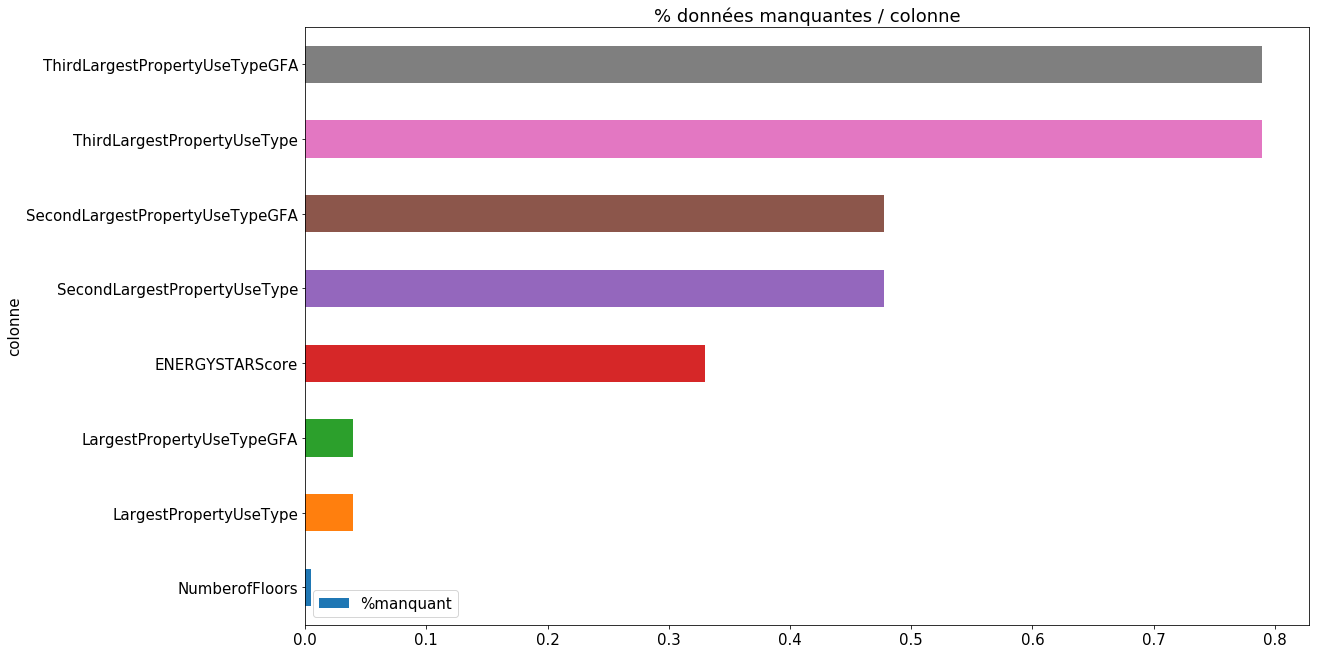

In [72]:
plot_missing_values(energy_2015, "miss_energy_2015.png")


In [73]:
#   Dataset 2015 :  Par colonne, nombre d'observations ou la colonne= NaN :
print(energy_2015.shape)
energy_2015.isna().sum()


(1526, 19)


BuildingId                            0
Location                              0
CouncilDistrictCode                   0
Neighborhood                          0
age                                   0
NumberofFloors                        7
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuildings                  0
LargestPropertyUseType               61
LargestPropertyUseTypeGFA            61
SecondLargestPropertyUseType        729
SecondLargestPropertyUseTypeGFA     729
ThirdLargestPropertyUseType        1204
ThirdLargestPropertyUseTypeGFA     1204
ENERGYSTARScore                     504
SiteEnergyUse                         0
GHGEmissionsCO2                       0
ZipCode                               0
dtype: int64

In [74]:
(energy_2015.isna().sum()/energy_2015.shape[0]).sort_values(ascending=True)*100


BuildingId                          0.000000
SiteEnergyUse                       0.000000
GHGEmissionsCO2                     0.000000
PropertyGFABuildings                0.000000
PropertyGFAParking                  0.000000
PropertyGFATotal                    0.000000
ZipCode                             0.000000
age                                 0.000000
Neighborhood                        0.000000
CouncilDistrictCode                 0.000000
Location                            0.000000
NumberofFloors                      0.458716
LargestPropertyUseTypeGFA           3.997379
LargestPropertyUseType              3.997379
ENERGYSTARScore                    33.027523
SecondLargestPropertyUseType       47.771953
SecondLargestPropertyUseTypeGFA    47.771953
ThirdLargestPropertyUseType        78.899083
ThirdLargestPropertyUseTypeGFA     78.899083
dtype: float64

<Figure size 2880x2880 with 0 Axes>

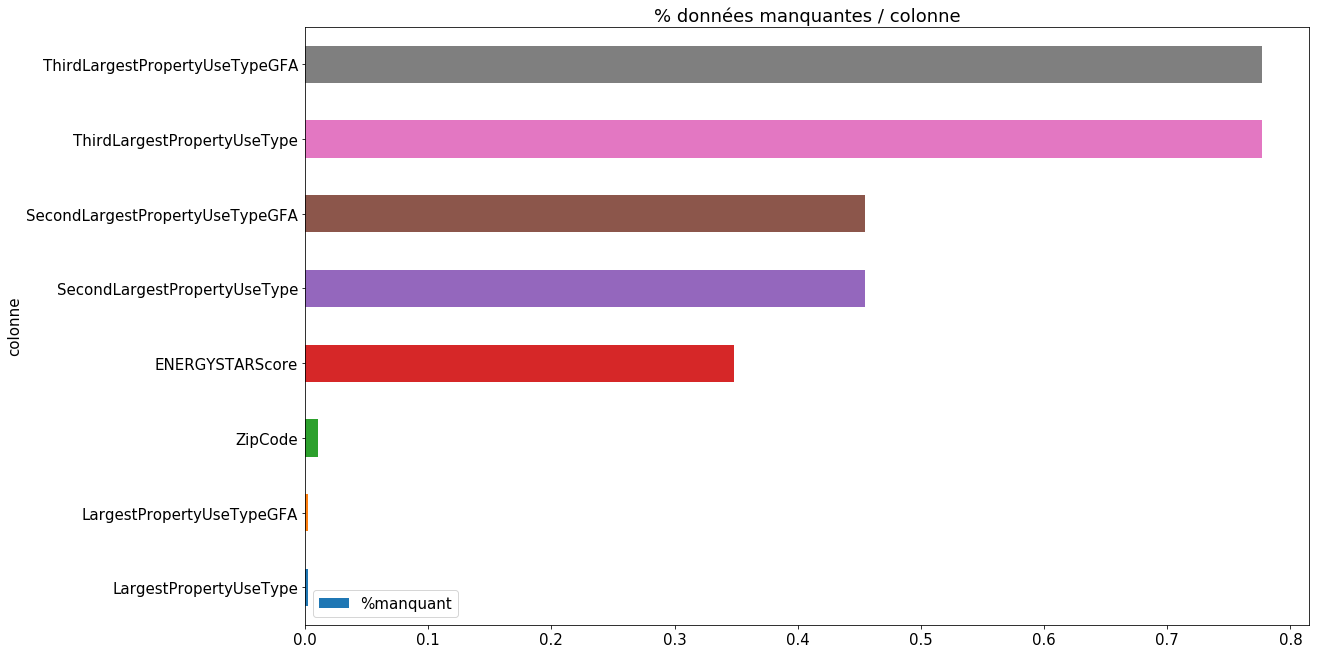

In [75]:
plot_missing_values(energy_2016, "miss_energy_2016.png")


In [76]:
#   Dataset 2016 :  Par colonne, nombre d'observations ou la colonne= NaN :

print(energy_2016.shape)
energy_2016.isna().sum()


(1540, 20)


BuildingId                            0
ZipCode                              16
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
age                                   0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuildings                  0
LargestPropertyUseType                4
LargestPropertyUseTypeGFA             4
SecondLargestPropertyUseType        700
SecondLargestPropertyUseTypeGFA     700
ThirdLargestPropertyUseType        1196
ThirdLargestPropertyUseTypeGFA     1196
ENERGYSTARScore                     536
SiteEnergyUse                         0
GHGEmissionsCO2                       0
dtype: int64

In [77]:
(energy_2016.isna().sum()/energy_2016.shape[0]).sort_values(ascending=True)*100


BuildingId                          0.000000
PropertyGFABuildings                0.000000
SiteEnergyUse                       0.000000
PropertyGFATotal                    0.000000
NumberofFloors                      0.000000
age                                 0.000000
PropertyGFAParking                  0.000000
Latitude                            0.000000
Neighborhood                        0.000000
CouncilDistrictCode                 0.000000
Longitude                           0.000000
GHGEmissionsCO2                     0.000000
LargestPropertyUseType              0.259740
LargestPropertyUseTypeGFA           0.259740
ZipCode                             1.038961
ENERGYSTARScore                    34.805195
SecondLargestPropertyUseType       45.454545
SecondLargestPropertyUseTypeGFA    45.454545
ThirdLargestPropertyUseType        77.662338
ThirdLargestPropertyUseTypeGFA     77.662338
dtype: float64

In [78]:
# energy_2016 sera notre dataset de référence, car il a moins de données manquantes. Il sera complété par energy_2015.


# Variables qui vont faire l'objet d'une complétion :
#
#   ZipCode, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA,
#   ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA,  ENERGYSTARScore


### Comparaison des Features 2015 / 2016

In [22]:
col_diff = energy_2015.columns.difference(energy_2016.columns)
print("Colonnes de energy_2015 absentes de energy_2016 :\n", col_diff)

col_diff = energy_2016.columns.difference(energy_2015.columns)
print("\nColonnes de energy_2016 absentes de energy_2015 :\n", col_diff)

l_2015 = list(energy_2015)   # Liste des colonnes du dataframe 2015
l_2016 = list(energy_2016)   # Liste des colonnes du dataframe 2016
set_2015 = set(l_2015)
set_2016 = set(l_2016)
print("\ncolonnes différentes entre 2015 et 2016", (set_2015 | set_2016) - (set_2015 & set_2016),"\n")
                                                  # ( différence entre l'union et l'intersection )
        

Colonnes de energy_2015 absentes de energy_2016 :
 Index(['Location'], dtype='object')

Colonnes de energy_2016 absentes de energy_2015 :
 Index(['Latitude', 'Longitude'], dtype='object')

colonnes différentes entre 2015 et 2016 {'Latitude', 'Location', 'Longitude'} 



## Complétion du dataset 2015

In [23]:
# Hypothèse :  Utiliser les données de 2015 pour compléter celles de 2016, n'introduit pas un biais important.  
#              Sur un décalage d'un an, les relevés doivent être similaires.


### Préparation du contrôle de la complétion

In [24]:
# Etablissement des listes d'observations ou une variable ('ZipCode', 'ENERGYSTARScore') = nan :

energy_2016[energy_2016['ZipCode'].isna()]
l_ZipCode_nan = energy_2016[energy_2016['ZipCode'].isna()]['BuildingId'].tolist()
# energy_2016[energy_2016['BuildingId'] == 50196]   # ex

energy_2016[energy_2016['ENERGYSTARScore'].isna()]
l_ENERGYSTARScore_nan = energy_2016[energy_2016['ENERGYSTARScore'].isna()]['BuildingId'].tolist()
# energy_2016[energy_2016['BuildingId'] == 9]   # ex


###  Feature 'ZipCode'

In [25]:
# Completion de la colonne 'ZipCode' du dataset 2016 avec la valeur - si elle existe - du dataset 2015 :

avant_nan = energy_2016['ZipCode'].isna().sum()

for id in l_ZipCode_nan:
        une_obs = energy_2015[energy_2015['BuildingId'] == id]    # est-ce que cet Id existe dans le dataset 2015 ?
        if len(une_obs) == 1:
            print("Un zipcode trouvé dans 2015")
            energy_2016.loc[energy_2016['BuildingId'] == id, ['ZipCode']] = une_obs['ZipCode'].values[0]

apres_nan = energy_2016['ZipCode'].isna().sum()

# En final, si la complétion n'a pas été totale, on remplie avec des zéros :
energy_2016['ZipCode'].fillna(0, inplace=True)

print("Avant, ZipCode manquants =", avant_nan)
print("Après, ZipCode manquants =", apres_nan)


Avant, ZipCode manquants = 16
Après, ZipCode manquants = 16


In [26]:
# Supprimer les observations ou ZipCode = 0
print("Avant :", energy_2016.shape)
energy_2016 = energy_2016[energy_2016.ZipCode > 0]
print("Avant :", energy_2016.shape)


Avant : (1540, 20)
Avant : (1524, 20)


###  Feature 'ENERGYSTARScore'

In [27]:
# Completion de la colonne 'ENERGYSTARScore' du dataset 2016 avec la valeur - si elle existe - du dataset 2015 :

avant_nan = energy_2016['ENERGYSTARScore'].isna().sum()

for id in l_ENERGYSTARScore_nan:
        une_obs = energy_2015[energy_2015['BuildingId'] == id]    # est-ce que cet Id existe dans le dataset 2015 ?
        if len(une_obs) == 1:
            energy_2016.loc[energy_2016['BuildingId'] == id, ['ENERGYSTARScore']] = une_obs['ENERGYSTARScore'].values[0]

apres_nan = energy_2016['ENERGYSTARScore'].isna().sum()
# energy_2016.isna().sum()

# En final, si la complétion n'a pas été totale, on remplie avec des zéros :
energy_2016['ENERGYSTARScore'].fillna(0, inplace=True)

print("Avant, ENERGYSTARScore manquants =", avant_nan)
print("Après, ENERGYSTARScore manquants =", apres_nan)


Avant, ENERGYSTARScore manquants = 523
Après, ENERGYSTARScore manquants = 494


In [28]:
# On ne peut pas supprimer les observations ou ENERGYSTARScore = 0.  Il y en a trop, 494 sur 1524 observations.
# energy_2016 = energy_2016[energy_2016['ENERGYSTARScore'] == 0]


In [29]:
# Contrôle :
liste_a_verifier = []
liste_a_verifier.extend(l_ENERGYSTARScore_nan)
liste_a_verifier.extend(l_ZipCode_nan)

energy_2016[energy_2016['BuildingId'].isin(list(set(liste_a_verifier)))]   # set pour enlever les doublons


BuildingId  ZipCode  CouncilDistrictCode           Neighborhood   Latitude   Longitude   age  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuildings                             LargestPropertyUseType  LargestPropertyUseTypeGFA                       SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA            ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse  GHGEmissionsCO2
5              9  98101.0                    7               DOWNTOWN  47.616230 -122.336570  1999               2             97288               37198                 60090                                     Police Station                    88830.0                                                NaN                              NaN                                    NaN                             NaN              0.0   1.208662e+07           301.81
7             11  98101.0                    7               DOWNTOWN  47.613270 -122.331360  1926               8            102761                   0                102761              Other - Entertainment/Public Assembly                   102761.0                                                NaN                              NaN                                    NaN                             NaN              0.0   6.298132e+06           221.51
15            21  98154.0                    7               DOWNTOWN  47.606490 -122.332970  2004              11            412000               57000                355000                                            Library                   364913.0                                            Parking                     49000.000000                            Data Center                     1074.000000              0.0   1.858886e+07           181.38
16            22  98104.0                    7               DOWNTOWN  47.605460 -122.332790  1930               6            103911                   0                103911                     Fitness Center/Health Club/Gym                    90000.0                                             Office                     40000.000000                          Swimming Pool                        0.000000              0.0   9.956396e+06           433.86
18            24  98104.0                    7               DOWNTOWN  47.605150 -122.331590  1907               5             57452                   0                 57452                                Social/Meeting Hall                    16442.0                                         Restaurant                     15505.000000                                 Office                     9741.000000              0.0   7.606084e+06           273.02
21            27  98104.0                    3               DOWNTOWN  47.603780 -122.328420  1985              19            385274                   0                385274                                              Other                   385274.0                                                NaN                              NaN                                    NaN                             NaN              0.0   4.785981e+07          1699.45
24            30  98121.0                    7               DOWNTOWN  47.618160 -122.336290  1928               7            126593                   0                126593                                 College/University                   125000.0                                                NaN                              NaN                                    NaN                             NaN              0.0   1.134369e+07           388.04
25            31  98101.0                    7               DOWNTOWN  47.615000 -122.330810  1930               2             67224                   0                 67224                              Automobile Dealership                    67224.0                                                NaN                              NaN              

In [30]:
# Autres variables à compléter :

energy_2016[energy_2016['LargestPropertyUseTypeGFA'].isna()]
l_LargestPropertyUseTypeGFA_nan = energy_2016[energy_2016['LargestPropertyUseTypeGFA'].isna()]['BuildingId'].tolist()

energy_2016[energy_2016['SecondLargestPropertyUseTypeGFA'].isna()]
l_SecondLargestPropertyUseTypeGFA_nan = energy_2016[energy_2016['SecondLargestPropertyUseTypeGFA'].isna()]['BuildingId'].tolist()

energy_2016[energy_2016['ThirdLargestPropertyUseTypeGFA'].isna()]
l_ThirdLargestPropertyUseTypeGFA_nan = energy_2016[energy_2016['ThirdLargestPropertyUseTypeGFA'].isna()]['BuildingId'].tolist()

energy_2016[energy_2016['LargestPropertyUseType'].isna()]
l_LargestPropertyUseType_nan = energy_2016[energy_2016['LargestPropertyUseType'].isna()]['BuildingId'].tolist()

energy_2016[energy_2016['SecondLargestPropertyUseType'].isna()]
l_SecondLargestPropertyUseType_nan = energy_2016[energy_2016['SecondLargestPropertyUseType'].isna()]['BuildingId'].tolist()

energy_2016[energy_2016['ThirdLargestPropertyUseTypeGFA'].isna()]
l_ThirdLargestPropertyUseType_nan = energy_2016[energy_2016['SecondLargestPropertyUseType'].isna()]['BuildingId'].tolist()


In [31]:
# Lorsque le champ = NaN, on lui assigne 0 :

energy_2015['LargestPropertyUseTypeGFA'].fillna(0, inplace=True)
energy_2015['SecondLargestPropertyUseTypeGFA'].fillna(0, inplace=True)
energy_2015['ThirdLargestPropertyUseTypeGFA'].fillna(0, inplace=True)
energy_2015['LargestPropertyUseType'].fillna("", inplace=True)
energy_2015['SecondLargestPropertyUseType'].fillna("", inplace=True)
energy_2015['ThirdLargestPropertyUseType'].fillna("", inplace=True)

energy_2016['LargestPropertyUseTypeGFA'].fillna(0, inplace=True)
energy_2016['SecondLargestPropertyUseTypeGFA'].fillna(0, inplace=True)
energy_2016['ThirdLargestPropertyUseTypeGFA'].fillna(0, inplace=True)
energy_2016['LargestPropertyUseType'].fillna("", inplace=True)
energy_2016['SecondLargestPropertyUseType'].fillna("", inplace=True)
energy_2016['ThirdLargestPropertyUseType'].fillna("", inplace=True)


### Complétion

In [32]:
nb_LargestPropertyUseTypeGFA_trt = 0
nb_SecondLargestPropertyUseTypeGFA_trt = 0
nb_ThirdLargestPropertyUseTypeGFA_trt = 0
nb_LargestPropertyUseType_trt = 0
nb_SecondLargestPropertyUseType_trt = 0
nb_ThirdLargestPropertyUseType_trt = 0


for id in l_LargestPropertyUseTypeGFA_nan:
        une_obs = energy_2015[energy_2015['BuildingId'] == id] 
        if len(une_obs) == 0:
            continue
        if une_obs['LargestPropertyUseTypeGFA'].values[0] > 0:
            energy_2016.loc[energy_2016['BuildingId'] == id, ['LargestPropertyUseTypeGFA']] = une_obs['LargestPropertyUseTypeGFA'].values[0]
            nb_LargestPropertyUseTypeGFA_trt += 1
            
for id in l_SecondLargestPropertyUseTypeGFA_nan:
        une_obs = energy_2015[energy_2015['BuildingId'] == id]
        if len(une_obs) == 0:
            continue
        if une_obs['SecondLargestPropertyUseTypeGFA'].values[0] > 0:
            energy_2016.loc[energy_2016['BuildingId'] == id, ['SecondLargestPropertyUseTypeGFA']] = une_obs['SecondLargestPropertyUseTypeGFA'].values[0]
            nb_SecondLargestPropertyUseTypeGFA_trt += 1
            
for id in l_ThirdLargestPropertyUseTypeGFA_nan:
        une_obs = energy_2015[energy_2015['BuildingId'] == id]
        if len(une_obs) == 0:
            continue
        if une_obs['ThirdLargestPropertyUseTypeGFA'].values[0] > 0:
            energy_2016.loc[energy_2016['BuildingId'] == id, ['ThirdLargestPropertyUseTypeGFA']] = une_obs['ThirdLargestPropertyUseTypeGFA'].values[0]
            nb_ThirdLargestPropertyUseTypeGFA_trt += 1
            
for id in l_LargestPropertyUseType_nan:
        une_obs = energy_2015[energy_2015['BuildingId'] == id]
        if len(une_obs) == 0:
            continue
        if une_obs['LargestPropertyUseType'].values[0] != "":
            energy_2016.loc[energy_2016['BuildingId'] == id, ['LargestPropertyUseType']] = une_obs['LargestPropertyUseType'].values[0]
            nb_LargestPropertyUseType_trt += 1
            
for id in l_SecondLargestPropertyUseType_nan:
        une_obs = energy_2015[energy_2015['BuildingId'] == id]
        if len(une_obs) == 0:
            continue
        if une_obs['SecondLargestPropertyUseType'].values[0] != "":
            energy_2016.loc[energy_2016['BuildingId'] == id, ['SecondLargestPropertyUseType']] = une_obs['SecondLargestPropertyUseType'].values[0]
            nb_SecondLargestPropertyUseType_trt += 1
            
for id in l_ThirdLargestPropertyUseType_nan:
        une_obs = energy_2015[energy_2015['BuildingId'] == id]
        if len(une_obs) == 0:
            continue
        if une_obs['ThirdLargestPropertyUseType'].values[0] != "":
            energy_2016.loc[energy_2016['BuildingId'] == id, ['ThirdLargestPropertyUseType']] = une_obs['ThirdLargestPropertyUseType'].values[0]
            nb_ThirdLargestPropertyUseType_trt += 1

            
print(nb_LargestPropertyUseTypeGFA_trt)        # 0
print(nb_SecondLargestPropertyUseTypeGFA_trt)  # 2
print(nb_ThirdLargestPropertyUseTypeGFA_trt)   # 3
print(nb_LargestPropertyUseType_trt)           # 0
print(nb_SecondLargestPropertyUseType_trt)     # 2
print(nb_ThirdLargestPropertyUseType_trt)      # 2


0
2
3
0
2
2


In [33]:
# Contrôle :
liste_a_verifier = []
liste_a_verifier.extend(l_LargestPropertyUseTypeGFA_nan)
liste_a_verifier.extend(l_SecondLargestPropertyUseTypeGFA_nan)
liste_a_verifier.extend(l_ThirdLargestPropertyUseTypeGFA_nan)

energy_2016[energy_2016['BuildingId'].isin(list(set(liste_a_verifier)))]   # set pour enlever les doublons


BuildingId  ZipCode  CouncilDistrictCode           Neighborhood   Latitude   Longitude   age  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuildings                             LargestPropertyUseType  LargestPropertyUseTypeGFA                       SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse  GHGEmissionsCO2
0              1  98101.0                    7               DOWNTOWN  47.612200 -122.337990  1927              12             88434                   0                 88434                                              Hotel                    88434.0                                                                            0.000000                                                         0.0             60.0   7.226362e+06           249.98
2              3  98101.0                    7               DOWNTOWN  47.613930 -122.338100  1969              41            956110              196718                759392                                              Hotel                   756493.0                                            Parking                    100000.000000               Swimming Pool                             0.0             43.0   7.258702e+07          2089.28
3              5  98101.0                    7               DOWNTOWN  47.614120 -122.336640  1926              10             61320                   0                 61320                                              Hotel                    61320.0                                                                            0.000000                                                         0.0             56.0   6.794584e+06           286.43
5              9  98101.0                    7               DOWNTOWN  47.616230 -122.336570  1999               2             97288               37198                 60090                                     Police Station                    88830.0                                                                            0.000000                                                         0.0              0.0   1.208662e+07           301.81
6             10  98101.0                    7               DOWNTOWN  47.613900 -122.332830  1926              11             83008                   0                 83008                                              Hotel                    81352.0                                                                            0.000000                                                         0.0             27.0   5.758795e+06           176.14
7             11  98101.0                    7               DOWNTOWN  47.613270 -122.331360  1926               8            102761                   0                102761              Other - Entertainment/Public Assembly                   102761.0                                                                            0.000000                                                         0.0              0.0   6.298132e+06           221.51
8             12  98104.0                    7               DOWNTOWN  47.602940 -122.332630  1904              15            163984                   0                163984                                              Hotel                   163984.0                                                                            0.000000                                                         0.0             43.0   1.372382e+07           392.16
10            15  98101.0                    7               DOWNTOWN  47.606950 -122.334140  1969              11            153163               19279                133884                                              Hotel                   133884.0                                                                            0.000000                                                         0.0             30.0   1.601664e+07          

In [34]:
# 'BuildingId' a servi pour la complétion. On en a plus besoin maintenant.
energy_2016 = energy_2016.drop(['BuildingId'], 1) 


#### Point de Sauvegarde / Restauration

In [35]:
avantDivers = energy_2016.copy()   # sauvegarde

In [36]:
energy_2016 = avantDivers.copy()   # restore


### Divers

In [37]:
# Rendre 'Longitude' positive:
energy_2016.Longitude = abs(energy_2016.Longitude)


In [38]:
# 1. Traitement des variables de 'Surface'.  

# Constat :  le cumul des surfaces est parfois faux.

# Règles :
#          PropertyGFATotal = PropertyGFABuildings + PropertyGFAParking
#          PropertyGFATotal = LargestPropertyUseTypeGFA + SecondLargestPropertyUseTypeGFA + ThirdLargestPropertyUseTypeGFA


# 2. Traitement des colonnes avec des ZERO :

# Colonnes pouvant être=0 : 'PropertyGFAParking', 
#                           'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
#                           'ENERGYSTARScore',   'NumberofFloors', 'SiteEnergyUse', 'GHGEmissionsCO2', 'PercentParking'

# Louches :  'LargestPropertyUseTypeGFA', 'ENERGYSTARScore','NumberofFloors', 'SiteEnergyUse', 'GHGEmissionsCO2'   ?

energy_2016.describe()   # pour observr les minimums sur chaque variable


ZipCode  CouncilDistrictCode     Latitude    Longitude          age  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuildings  LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse  GHGEmissionsCO2
count   1524.000000          1524.000000  1524.000000  1524.000000  1524.000000     1524.000000      1.524000e+03         1524.000000          1.524000e+03               1.524000e+03                      1524.000000                     1524.000000      1524.000000   1.524000e+03      1524.000000
mean   98116.654199             4.418635    47.616077   122.333388  1961.049869        4.322178      1.121896e+05        14022.526247          9.816705e+04               9.048573e+04                     19348.736415                     3041.001574        42.935039   7.715834e+06       166.251004
std       18.551640             2.193363     0.046614     0.023031    32.874103        6.821849      1.897369e+05        43962.436068          1.658677e+05               1.548338e+05                     49566.357537                    14414.850902        38.210484   1.876631e+07       574.276617
min    98006.000000             1.000000    47.509590   122.261800  1900.000000        0.000000      1.630000e+04            0.000000          3.636000e+03               0.000000e+00                         0.000000                        0.000000         0.000000   1.680890e+04         0.120000
25%    98104.000000             2.000000    47.587788   122.322700  1929.000000        1.000000      2.884700e+04            0.000000          2.800850e+04               2.500000e+04                         0.000000                        0.000000         0.000000   1.219337e+06        19.597500
50%    98109.000000             4.000000    47.612380   122.333160  1965.000000        2.000000      4.789950e+04            0.000000          4.569000e+04               4.154300e+04                         0.000000                        0.000000        45.000000   2.650598e+06        48.875000
75%    98125.000000             7.000000    47.648653   122.342597  1988.000000        4.000000      1.037505e+05            0.000000          9.362250e+04               8.914825e+04                     13786.250000                        0.000000        80.000000   7.103784e+06       138.475000
max    98199.000000             7.000000    47.733870   122.411820  2015.000000       99.000000      1.952220e+06       512608.000000          1.765970e+06               1.680937e+06                    441551.000000                   303910.000000       100.000000   2.930908e+08     12307.160000

In [39]:
# Cas des Building avec PropertyGFABuildings =< 0

# Elimination de ce building :
print("Après :", energy_2016.shape)
energy_2016 = energy_2016[energy_2016.PropertyGFABuildings > 0]
print("Après :", energy_2016.shape)


Après : (1524, 19)
Après : (1524, 19)


In [40]:
#   Cas ou 'LargestPropertyUseTypeGFA'= 0  ALORS QUE 'PropertyGFATotal'> 0 :  4 cas.
#
#   Dans les cas 'SecondLargestPropertyUseType' et 'ThirdLargestPropertyUseTypeGFA' sont null,
#        on devrait donc avoir   PropertyGFATotal = LargestPropertyUseTypeGFA.

energy_2016[(energy_2016['PropertyGFATotal'] > 0) & (energy_2016['LargestPropertyUseTypeGFA'] == 0)]
list_index = energy_2016[(energy_2016['PropertyGFATotal'] > 0) & (energy_2016['LargestPropertyUseTypeGFA'] == 0)].index

# Réparation de la colonne 'LargestPropertyUseTypeGFA' pour ces cas. On la renseigne avec 'PropertyGFATotal' :
energy_2016['LargestPropertyUseTypeGFA'] = np.where((energy_2016['PropertyGFATotal'] > 0) & (energy_2016['LargestPropertyUseTypeGFA'] == 0), energy_2016['PropertyGFATotal'] , energy_2016['LargestPropertyUseTypeGFA'])

# y_class = np.where(y<6, 0, 1)    # met des (0 ou 1) à la place des (3,4,5,6,7,8)

# Contrôle de la modification :
energy_2016[energy_2016.index.isin(list_index)]


ZipCode  CouncilDistrictCode Neighborhood  Latitude  Longitude   age  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuildings LargestPropertyUseType  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse  GHGEmissionsCO2
353   98107.0                    6      BALLARD  47.66838  122.39310  1946               2            111445                   0                111445                                          111445.0                                                           0.0                                                         0.0              0.0   5.697472e+06           163.83
1147  98121.0                    7     DOWNTOWN  47.61203  122.34165  1910               8             61721                   0                 61721                                           61721.0                                                           0.0                                                         0.0             93.0   2.897080e+06            36.92
2414  98103.0                    4   LAKE UNION  47.64747  122.34086  2008               4             48350                   0                 48350                                           48350.0                                                           0.0                                                         0.0             45.0   3.168131e+06            22.09
2459  98104.0                    2     DOWNTOWN  47.59697  122.32474  1913               3             28800                   0                 28800                                           28800.0                                                           0.0                                                         0.0              0.0   8.999242e+05            29.21

In [41]:
#   Cas ou 'NumberofFloors'= 0 :  Est-ce vraiment une erreur ? 

energy_2016[(energy_2016['NumberofFloors'] == 0)]


ZipCode  CouncilDistrictCode Neighborhood  Latitude  Longitude   age  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuildings      LargestPropertyUseType  LargestPropertyUseTypeGFA           SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse  GHGEmissionsCO2
166   98101.0                    7     DOWNTOWN  47.61275  122.33330  1999               0            934292                   0                934292                       Hotel                   495536.0                                Parking                         438756.0                  Restaurant                         49700.0              0.0    65047284.00          1638.46
487   98104.0                    3         EAST  47.60979  122.32298  2004               0            225982                   0                225982              Medical Office                   200184.0                                                                     0.0                                                         0.0             53.0    20560622.00           692.12
488   98121.0                    7     DOWNTOWN  47.61783  122.33729  2006               0            516407                   0                516407                     Parking                   385196.0                    Multifamily Housing                         340236.0                       Hotel                         67627.0             31.0    39403320.00           734.72
564   98101.0                    7     DOWNTOWN  47.61289  122.33531  1999               0            947987                   0                947987                Other - Mall                   561684.0  Other - Entertainment/Public Assembly                         100000.0                  Restaurant                         80000.0              0.0    46510960.00           324.25
1754  98104.0                    3         EAST  47.60862  122.32372  1945               0            274568                   0                274568              Medical Office                   228133.0                                Parking                         135954.0                                                         0.0             52.0    25311526.00          1110.07
3130  98115.0                    4    NORTHEAST  47.68454  122.26235  1940               0            384772                   0                384772  Non-Refrigerated Warehouse                   349953.0                                 Office                          63872.0                                                         0.0             69.0    15206762.00           391.70
3131  98115.0                    4    NORTHEAST  47.68240  122.26223  1960               0             30287                   0                 30287              Medical Office                    28050.0                                                                     0.0                                                         0.0             32.0     2193115.00            32.72
3132  98115.0                    4    NORTHEAST  47.68254  122.26299  1960               0             21931                   0                 21931                      Office                    31845.0                                 Office                          31845.0                                                         0.0             32.0     3947209.25           145.11
3168  98115.0                    4    NORTHEAST  47.68212  122.26330  1929               0            502030                   0                502030          Other - Recreation                   564258.0                                                                     0.0                                                         0.0              0.0    18470340.00           549.11
3273  98108.0                    2    SOUTHEAST  47.56260  122.29396  2009               0             40265                   0        

In [42]:
# Cas ou    PropertyGFATotal =! LargestPropertyUseTypeGFA + SecondLargestPropertyUseTypeGFA + ThirdLargestPropertyUseTypeGFA

# Remarque :  On ne mentionne que les 3 plus grandes surfaces. Il peut y en avoir d'autres et dans ce cas l'égalité est KO !
#               Si c'est le cas alors on doit avoir une inégalité :
#     PropertyGFATotal > LargestPropertyUseTypeGFA + SecondLargestPropertyUseTypeGFA + ThirdLargestPropertyUseTypeGFA

energy_2016['totSurface3'] = energy_2016['LargestPropertyUseTypeGFA'] + energy_2016['SecondLargestPropertyUseTypeGFA'] + \
                             energy_2016['ThirdLargestPropertyUseTypeGFA']
energy_2016['RapportSurface'] = energy_2016['totSurface3'] / energy_2016['PropertyGFATotal']

len(energy_2016[energy_2016['PropertyGFATotal'] != energy_2016['totSurface3']])     # 876 cas / 1540 , c'est énorme
len(energy_2016[energy_2016['PropertyGFATotal'] > energy_2016['totSurface3']])      # 500 <- On peut le comprendre
len(energy_2016[energy_2016['PropertyGFATotal'] < energy_2016['totSurface3']])      # 376 <- Là c'est curieux

# Quand c'est 'Swimming Pool' , la surface est systématiquement = 0.
# Parfois quand le Type est un 'Parking', la surface= 0.  C'est rarement le cas pour les autres types.
# Comme si lorqu'il s'agit d'un parking alors la surface ne compte pas. C'est systématique pour la piscine.

# energy_2016[energy_2016['RapportSurface'] < 0.8]
# energy_2016[energy_2016['RapportSurface'] > 1.2]


nbCas = len(energy_2016[(energy_2016['RapportSurface'] < 0.8) | (energy_2016['RapportSurface'] > 1.2)])
print("Nombre d'observations avec une erreur de surface de plus de 20% : ", nbCas,"observations /", energy_2016.shape[0])


Nombre d'observations avec une erreur de surface de plus de 20% :  234 observations / 1524


In [43]:
# Cas ou    PropertyGFATotal =! PropertyGFABuildings + PropertyGFAParking

energy_2016['totSurface2'] = energy_2016['PropertyGFABuildings'] + energy_2016['PropertyGFAParking']
nbCas = len(energy_2016[energy_2016['PropertyGFATotal'] != energy_2016['totSurface2']])     # 0 cas  , OK
print("Nombre d'observations ou  PropertyGFATotal =! PropertyGFABuildings + PropertyGFAParking : ", nbCas)


Nombre d'observations ou  PropertyGFATotal =! PropertyGFABuildings + PropertyGFAParking :  0


In [44]:
energy_2016 = energy_2016.drop(['totSurface2', 'totSurface3', 'RapportSurface'], 1) 


#### Point de Sauvegarde / Restauration

In [45]:
avantEng5 = energy_2015.copy()   # sauvegarde
avantEng6 = energy_2016.copy()   # sauvegarde

In [46]:
energy_2015 = avantEng5.copy()   # restore
energy_2016 = avantEng6.copy()   # restore

In [47]:
energy_2016.head(5)

ZipCode  CouncilDistrictCode Neighborhood  Latitude  Longitude   age  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuildings LargestPropertyUseType  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse  GHGEmissionsCO2
0  98101.0                    7     DOWNTOWN  47.61220  122.33799  1927              12             88434                   0                 88434                  Hotel                    88434.0                                                           0.0                                                         0.0             60.0      7226362.5           249.98
1  98101.0                    7     DOWNTOWN  47.61317  122.33393  1996              11            103566               15064                 88502                  Hotel                    83880.0                      Parking                          15064.0                  Restaurant                          4622.0             61.0      8387933.0           295.86
2  98101.0                    7     DOWNTOWN  47.61393  122.33810  1969              41            956110              196718                759392                  Hotel                   756493.0                      Parking                         100000.0               Swimming Pool                             0.0             43.0     72587024.0          2089.28
3  98101.0                    7     DOWNTOWN  47.61412  122.33664  1926              10             61320                   0                 61320                  Hotel                    61320.0                                                           0.0                                                         0.0             56.0      6794584.0           286.43
4  98121.0                    7     DOWNTOWN  47.61375  122.34047  1980              18            175580               62000                113580                  Hotel                   123445.0                      Parking                          68009.0               Swimming Pool                             0.0             75.0     14172606.0           505.01

## Feature engineering

In [48]:
# Création de la variable représentant le rapport de surface entre le parking et la totalité du building :
energy_2016['PercentParking'] = energy_2016['PropertyGFAParking'] / energy_2016['PropertyGFATotal']

# Remplace l'année de construction par l'age du batiment :
energy_2016.age = 2020 - energy_2016.age
energy_2016.head(5)


ZipCode  CouncilDistrictCode Neighborhood  Latitude  Longitude  age  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuildings LargestPropertyUseType  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse  GHGEmissionsCO2  PercentParking
0  98101.0                    7     DOWNTOWN  47.61220  122.33799   93              12             88434                   0                 88434                  Hotel                    88434.0                                                           0.0                                                         0.0             60.0      7226362.5           249.98        0.000000
1  98101.0                    7     DOWNTOWN  47.61317  122.33393   24              11            103566               15064                 88502                  Hotel                    83880.0                      Parking                          15064.0                  Restaurant                          4622.0             61.0      8387933.0           295.86        0.145453
2  98101.0                    7     DOWNTOWN  47.61393  122.33810   51              41            956110              196718                759392                  Hotel                   756493.0                      Parking                         100000.0               Swimming Pool                             0.0             43.0     72587024.0          2089.28        0.205748
3  98101.0                    7     DOWNTOWN  47.61412  122.33664   94              10             61320                   0                 61320                  Hotel                    61320.0                                                           0.0                                                         0.0             56.0      6794584.0           286.43        0.000000
4  98121.0                    7     DOWNTOWN  47.61375  122.34047   40              18            175580               62000                113580                  Hotel                   123445.0                      Parking                          68009.0               Swimming Pool                             0.0             75.0     14172606.0           505.01        0.353115

In [49]:
# Matrice de corrélation sans colonnes encodées :
Orig_energy_2016 = energy_2016.copy()


### Encodage des variables catégorielles

In [50]:
from sklearn.preprocessing import OneHotEncoder

# Choix des variables :
X = energy_2016[['CouncilDistrictCode', 'Neighborhood', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 
                 'ThirdLargestPropertyUseType', 'ZipCode']]
# X = energy_2016.select_dtypes(include=[object])   # alternative équivalente à la ligne précédente sauf que, 
                                                    #           'CouncilDistrictCode' et 'ZipCode' ont été oublié.
                                                  
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()
print(type(X_encoded))   # 'numpy.ndarray'              
X_encoded.shape


<class 'numpy.ndarray'>


(1524, 215)

### Reconstitution du dataframe principal

In [51]:
# Récupérer les colonnes crées par OneHotEncoder :
col = encoder.get_feature_names(['CouncilDistrictCode', 'Neighborhood', 'LargestPropertyUseType', 
                                 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'ZipCode'])

# Convertir le 'numpy.ndarray' en un dataframe :
df_X = pd.DataFrame(data=X_encoded, index=energy_2016.index, columns=col)
df_X.head(50)

# Supprimer les colonnes traitées par OneHotEncoder ...
energy_2016_enc = energy_2016.drop(['CouncilDistrictCode', 'Neighborhood', 'LargestPropertyUseType',
                                    'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'ZipCode'], 1) 

# ... et les remplacer par leurs équivalents OneHotEncoder :
energy_2016 = energy_2016_enc.join(df_X)
print(energy_2016.shape)
energy_2016.head(10)


(1524, 229)


Latitude  Longitude  age  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuildings  LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse  GHGEmissionsCO2  PercentParking  CouncilDistrictCode_1  CouncilDistrictCode_2  CouncilDistrictCode_3  CouncilDistrictCode_4  CouncilDistrictCode_5  CouncilDistrictCode_6  CouncilDistrictCode_7  Neighborhood_BALLARD  Neighborhood_Ballard  Neighborhood_CENTRAL  Neighborhood_Central  Neighborhood_DELRIDGE  Neighborhood_DOWNTOWN  Neighborhood_Delridge  Neighborhood_EAST  Neighborhood_GREATER DUWAMISH  Neighborhood_LAKE UNION  Neighborhood_MAGNOLIA / QUEEN ANNE  Neighborhood_NORTH  Neighborhood_NORTHEAST  Neighborhood_NORTHWEST  Neighborhood_North  Neighborhood_Northwest  Neighborhood_SOUTHEAST  Neighborhood_SOUTHWEST  LargestPropertyUseType_  LargestPropertyUseType_Adult Education  LargestPropertyUseType_Automobile Dealership  LargestPropertyUseType_Bank Branch  LargestPropertyUseType_College/University  LargestPropertyUseType_Courthouse  LargestPropertyUseType_Data Center  LargestPropertyUseType_Distribution Center  LargestPropertyUseType_Financial Office  LargestPropertyUseType_Fire Station  LargestPropertyUseType_Fitness Center/Health Club/Gym  LargestPropertyUseType_Food Service  LargestPropertyUseType_Hospital (General Medical & Surgical)  LargestPropertyUseType_Hotel  LargestPropertyUseType_K-12 School  LargestPropertyUseType_Laboratory  LargestPropertyUseType_Library  LargestPropertyUseType_Lifestyle Center  LargestPropertyUseType_Manufacturing/Industrial Plant  LargestPropertyUseType_Medical Office  LargestPropertyUseType_Movie Theater  LargestPropertyUseType_Multifamily Housing  LargestPropertyUseType_Museum  LargestPropertyUseType_Non-Refrigerated Warehouse  LargestPropertyUseType_Office  LargestPropertyUseType_Other  LargestPropertyUseType_Other - Education  LargestPropertyUseType_Other - Entertainment/Public Assembly  LargestPropertyUseType_Other - Lodging/Residential  LargestPropertyUseType_Other - Mall  LargestPropertyUseType_Other - Public Services  LargestPropertyUseType_Other - Recreation  LargestPropertyUseType_Other - Restaurant/Bar  LargestPropertyUseType_Other - Services  LargestPropertyUseType_Other - Utility  LargestPropertyUseType_Other/Specialty Hospital  LargestPropertyUseType_Parking  LargestPropertyUseType_Performing Arts  LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)  LargestPropertyUseType_Police Station  LargestPropertyUseType_Pre-school/Daycare  LargestPropertyUseType_Refrigerated Warehouse  LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)  LargestPropertyUseType_Residence Hall/Dormitory  LargestPropertyUseType_Residential Care Facility  LargestPropertyUseType_Restaurant  LargestPropertyUseType_Retail Store  LargestPropertyUseType_Self-Storage Facility  LargestPropertyUseType_Senior Care Community  LargestPropertyUseType_Social/Meeting Hall  LargestPropertyUseType_Strip Mall  LargestPropertyUseType_Supermarket/Grocery Store  LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient  LargestPropertyUseType_Wholesale Club/Supercenter  LargestPropertyUseType_Worship Facility  SecondLargestPropertyUseType_  SecondLargestPropertyUseType_Adult Education  SecondLargestPropertyUseType_Automobile Dealership  SecondLargestPropertyUseType_Bank Branch  SecondLargestPropertyUseType_Bar/Nightclub  SecondLargestPropertyUseType_College/University  SecondLargestPropertyUseType_Convenience Store without Gas Station  SecondLargestPropertyUseType_Courthouse  SecondLargestPropertyUseType_Data Center  SecondLargestPropertyUseType_Distribution Center  SecondLargestPropertyUseType_Enclosed Mall  SecondLargestPropertyUseType_Financial Office  SecondLargestPropertyUseType_Fitness Center/Health Club/Gym  SecondLargestPropertyUseType_Food Sales  SecondLargestPropertyUseType_Food Service  SecondLargestPropertyUseType_Hospital (General Medical & Surgical)

## Statistiques

In [49]:
# energy_2016.describe().round()
energy_2016.describe()


Latitude    Longitude          age  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuildings  LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse  GHGEmissionsCO2  PercentParking  CouncilDistrictCode_1  CouncilDistrictCode_2  CouncilDistrictCode_3  CouncilDistrictCode_4  CouncilDistrictCode_5  CouncilDistrictCode_6  CouncilDistrictCode_7  Neighborhood_BALLARD  Neighborhood_Ballard  Neighborhood_CENTRAL  Neighborhood_Central  Neighborhood_DELRIDGE  Neighborhood_DOWNTOWN  Neighborhood_Delridge  Neighborhood_EAST  Neighborhood_GREATER DUWAMISH  Neighborhood_LAKE UNION  Neighborhood_MAGNOLIA / QUEEN ANNE  Neighborhood_NORTH  Neighborhood_NORTHEAST  Neighborhood_NORTHWEST  Neighborhood_North  Neighborhood_Northwest  Neighborhood_SOUTHEAST  Neighborhood_SOUTHWEST  LargestPropertyUseType_  LargestPropertyUseType_Adult Education  LargestPropertyUseType_Automobile Dealership  LargestPropertyUseType_Bank Branch  LargestPropertyUseType_College/University  LargestPropertyUseType_Courthouse  LargestPropertyUseType_Data Center  LargestPropertyUseType_Distribution Center  LargestPropertyUseType_Financial Office  LargestPropertyUseType_Fire Station  LargestPropertyUseType_Fitness Center/Health Club/Gym  LargestPropertyUseType_Food Service  LargestPropertyUseType_Hospital (General Medical & Surgical)  LargestPropertyUseType_Hotel  LargestPropertyUseType_K-12 School  LargestPropertyUseType_Laboratory  LargestPropertyUseType_Library  LargestPropertyUseType_Lifestyle Center  LargestPropertyUseType_Manufacturing/Industrial Plant  LargestPropertyUseType_Medical Office  LargestPropertyUseType_Movie Theater  LargestPropertyUseType_Multifamily Housing  LargestPropertyUseType_Museum  LargestPropertyUseType_Non-Refrigerated Warehouse  LargestPropertyUseType_Office  LargestPropertyUseType_Other  LargestPropertyUseType_Other - Education  LargestPropertyUseType_Other - Entertainment/Public Assembly  LargestPropertyUseType_Other - Lodging/Residential  LargestPropertyUseType_Other - Mall  LargestPropertyUseType_Other - Public Services  LargestPropertyUseType_Other - Recreation  LargestPropertyUseType_Other - Restaurant/Bar  LargestPropertyUseType_Other - Services  LargestPropertyUseType_Other - Utility  LargestPropertyUseType_Other/Specialty Hospital  LargestPropertyUseType_Parking  LargestPropertyUseType_Performing Arts  LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)  LargestPropertyUseType_Police Station  LargestPropertyUseType_Pre-school/Daycare  LargestPropertyUseType_Refrigerated Warehouse  LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)  LargestPropertyUseType_Residence Hall/Dormitory  LargestPropertyUseType_Residential Care Facility  LargestPropertyUseType_Restaurant  LargestPropertyUseType_Retail Store  LargestPropertyUseType_Self-Storage Facility  LargestPropertyUseType_Senior Care Community  LargestPropertyUseType_Social/Meeting Hall  LargestPropertyUseType_Strip Mall  LargestPropertyUseType_Supermarket/Grocery Store  LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient  LargestPropertyUseType_Wholesale Club/Supercenter  LargestPropertyUseType_Worship Facility  SecondLargestPropertyUseType_  SecondLargestPropertyUseType_Adult Education  SecondLargestPropertyUseType_Automobile Dealership  SecondLargestPropertyUseType_Bank Branch  SecondLargestPropertyUseType_Bar/Nightclub  SecondLargestPropertyUseType_College/University  SecondLargestPropertyUseType_Convenience Store without Gas Station  SecondLargestPropertyUseType_Courthouse  SecondLargestPropertyUseType_Data Center  SecondLargestPropertyUseType_Distribution Center  SecondLargestPropertyUseType_Enclosed Mall  SecondLargestPropertyUseType_Financial Office  SecondLargestPropertyUseType_Fitness Center/Health Club/Gym  SecondLargestPropertyUseType_Food Sales  SecondLargestPropertyUseType_Food Service  SecondLargestPropertyUseType_Hospital (General Medical &

In [50]:
# Médianes :
energy_2016.median()


Latitude                                                                             4.761238e+01
Longitude                                                                            1.223332e+02
age                                                                                  5.500000e+01
NumberofFloors                                                                       2.000000e+00
PropertyGFATotal                                                                     4.789950e+04
PropertyGFAParking                                                                   0.000000e+00
PropertyGFABuildings                                                                 4.569000e+04
LargestPropertyUseTypeGFA                                                            4.160450e+04
SecondLargestPropertyUseTypeGFA                                                      0.000000e+00
ThirdLargestPropertyUseTypeGFA                                                       0.000000e+00
ENERGYSTARScore     

## Analyse univariée Avant traitement des données

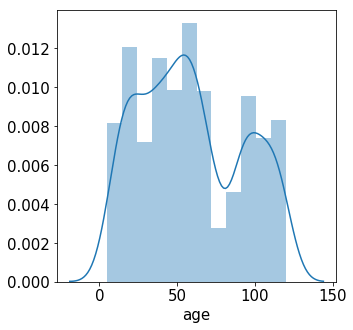

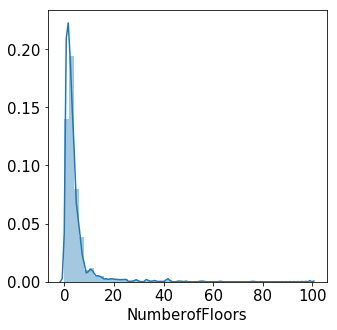

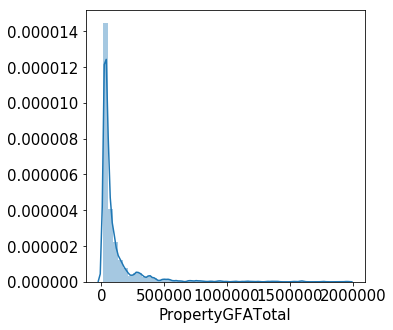

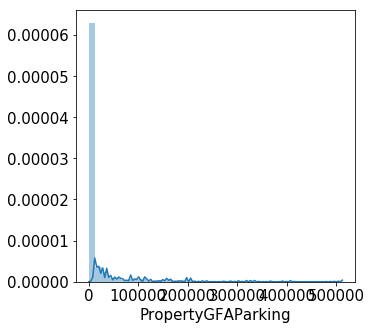

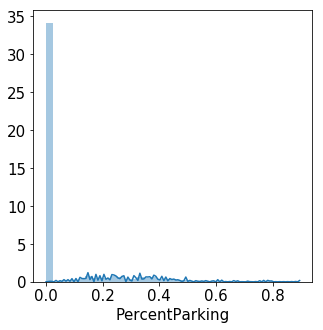

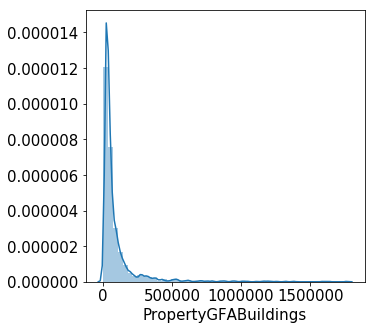

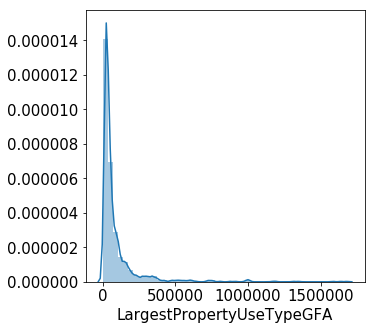

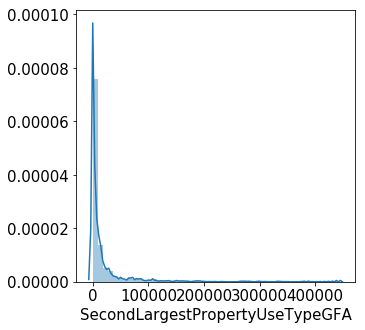

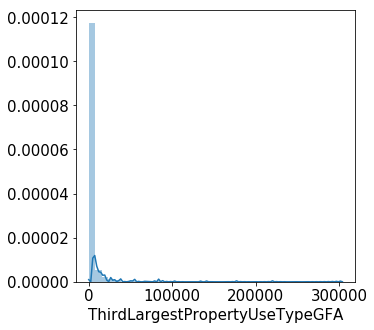

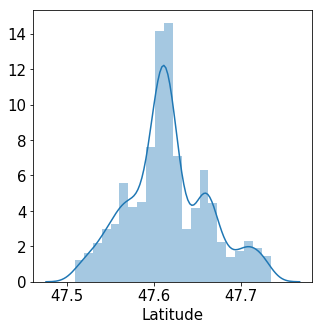

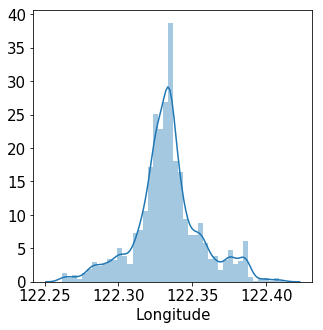

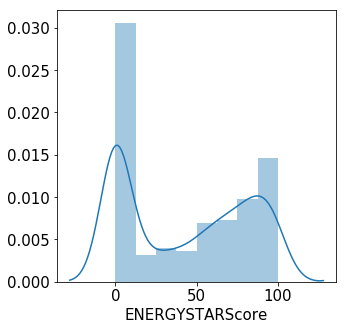

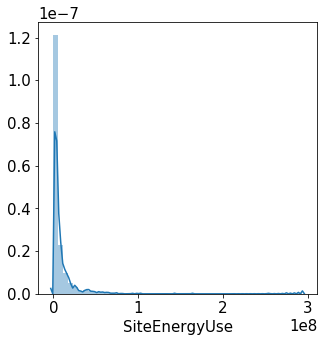

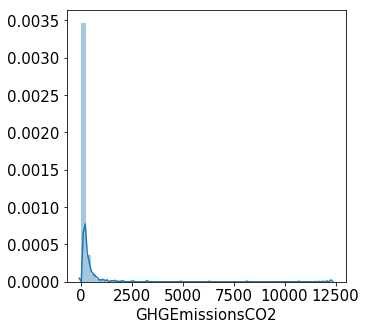

In [111]:
# Histogramme des variables quantitatives :

colonnes =  ['age', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PercentParking', 'PropertyGFABuildings', 
             'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 
             'Latitude', 'Longitude', 'ENERGYSTARScore', 'SiteEnergyUse', 'GHGEmissionsCO2']

# Les variables oneHotEncodées restent des variables qualitatives bien qu'elle soient numériques

nb=1
for col in colonnes:    
    fig = plt.figure(figsize = (5, 5))
    sns.distplot(energy_2016[col])
    nomFig = "distplot{0}.png".format(nb)
    plt.savefig(nomFig, dpi=50 )
    nb +=1

# Remarque :
# Appart 'Latitude' et 'Longitude', aucune variable ne semble suivre une distribution normale.
# Une transformation pour les rendre +ou- normales va être nécessaire, notamment si on veut calculer le coef. de Pearson.
# Une standardisation sera également nécessaire si on veut utiliser les régressions Ridge et Lasso.
#
# age  NumberofFloors  PropertyGFATotal  PropertyGFAParking   PercentParking  
# PropertyGFABuildings  LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA   Latitude
# Longitude  ENERGYSTARScore  SiteEnergyUse  GHGEmissionsCO2
        
        

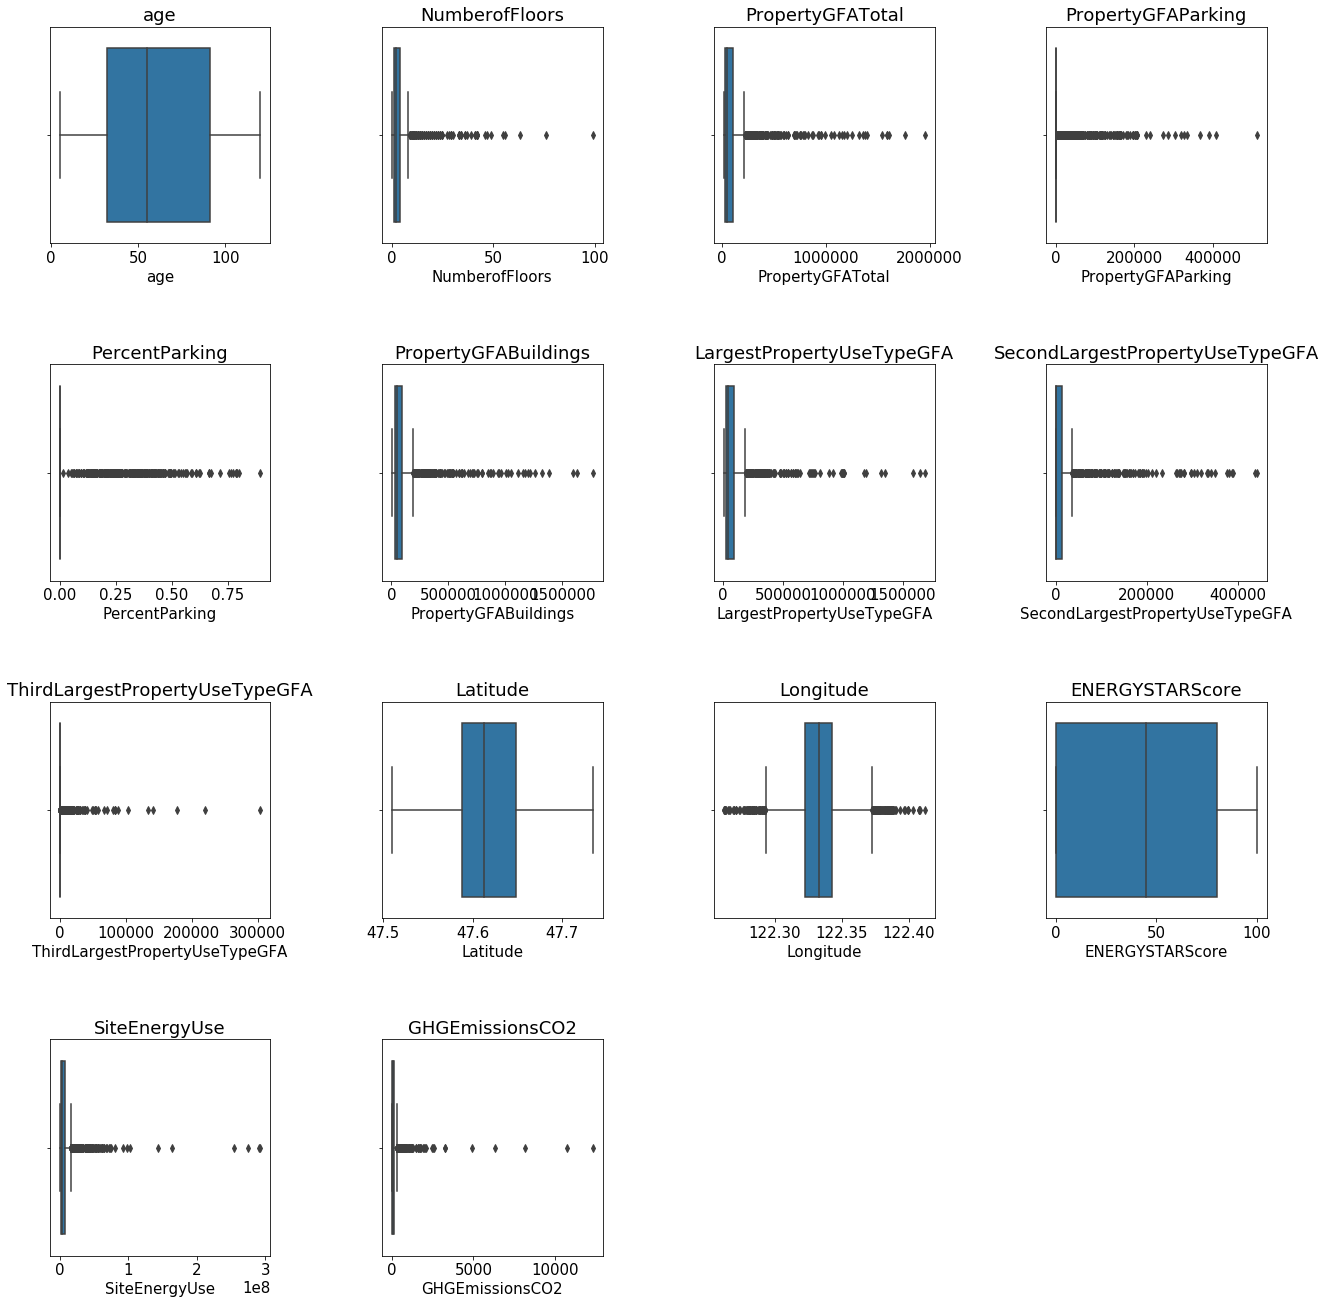

In [112]:
colonnes =  ['age', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PercentParking', 'PropertyGFABuildings', 
             'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 
             'Latitude', 'Longitude', 'ENERGYSTARScore', 'SiteEnergyUse', 'GHGEmissionsCO2']

fig = plt.figure(figsize = (20, 20))   # largeur,hauteur

num=0
for col in colonnes:      
    plt.subplot(4,4, num+1)
    plt.title(colonnes[num])
    sns.boxplot(x=colonnes[num], data=energy_2016)
    num+=1

plt.tight_layout(pad=5.0, w_pad=4.0, h_pad=4.0)   # marges
plt.savefig( "boxplot.png", dpi=50 )
plt.show()


## Analyse bivariée

In [114]:
# Statistiques - Corrélation linéaire => Pearson,   'SiteEnergyUse'

from scipy.stats import pearsonr

colonnes = energy_2016.columns
pearson_SiteEnergyUse = {}
print("Coefficient de Pearson entre SiteEnergyUse et : \n")

for col in colonnes:
    coef_pearson = pearsonr(energy_2016[col], energy_2016['SiteEnergyUse'])[0]   # [0] -> Coef. Pearson correlation
                                                                                 # [1] -> p-value
    pearson_SiteEnergyUse[col] = coef_pearson

# Présentation des Coefs de Pearson du plus Grand au plus petit :    
sorted(pearson_SiteEnergyUse.items(), key=lambda t: t[1], reverse=True)

# Remarque :
# on constate une relation à tendance linéaire entre 'SiteEnergyUse' et :

#  'GHGEmissionsCO2'                                               0.881 
#  'LargestPropertyUseTypeGFA'                                     0.703 
#  'PropertyGFABuildings'                                          0.675 
#  'PropertyGFATotal'                                              0.649 
#  'LargestPropertyUseType_Hospital (General Medical & Surgical)'  0.579 
#  'SecondLargestPropertyUseTypeGFA'                               0.541 
#  'NumberofFloors'                                                0.390 
#  'PropertyGFAParking'                                            0.256 
#  'LargestPropertyUseType_Data Center'                            0.255 
#  'ThirdLargestPropertyUseTypeGFA'                                0.238 
#  'SecondLargestPropertyUseType_Parking'                          0.196 
#  'ZipCode_98101.0'                                               0.147 
#  'ThirdLargestPropertyUseType_Other/Specialty Hospital'          0.129 
#  ...




Coefficient de Pearson entre SiteEnergyUse et : 



[('Latitude', nan),
 ('SiteEnergyUse', 0.9999999999999999),
 ('GHGEmissionsCO2', 0.8811355819703964),
 ('LargestPropertyUseTypeGFA', 0.703054005664678),
 ('PropertyGFABuildings', 0.6750468375102242),
 ('PropertyGFATotal', 0.6495305718229372),
 ('LargestPropertyUseType_Hospital (General Medical & Surgical)',
  0.5797730838722808),
 ('SecondLargestPropertyUseTypeGFA', 0.5413408789906955),
 ('NumberofFloors', 0.39001441835681694),
 ('PropertyGFAParking', 0.2563872506739774),
 ('LargestPropertyUseType_Data Center', 0.25508339926768403),
 ('ThirdLargestPropertyUseTypeGFA', 0.23852976618256577),
 ('SecondLargestPropertyUseType_Parking', 0.19630745815295983),
 ('ZipCode_98101.0', 0.14765759816188517),
 ('ThirdLargestPropertyUseType_Other/Specialty Hospital', 0.12970141644469294),
 ('Neighborhood_DOWNTOWN', 0.12899276398643625),
 ('CouncilDistrictCode_7', 0.1135137047733817),
 ('ThirdLargestPropertyUseType_Other', 0.10243449865482492),
 ('PercentParking', 0.09899630100849618),
 ('LargestProper

In [116]:
# Statistiques - Corrélation linéaire => Pearson,   'GHGEmissionsCO2'

from scipy.stats import pearsonr

colonnes = energy_2016.columns
pearson_GHGEmissionsCO2 = {}
print("Coefficient de Pearson entre GHGEmissionsCO2 et : \n")

for col in colonnes:
    coef_pearson = pearsonr(energy_2016[col], energy_2016['GHGEmissionsCO2'])[0]
    pearson_GHGEmissionsCO2[col] = coef_pearson

# Présentation des Coefs de Pearson du plus Grand au plus petit :    
sorted(pearson_GHGEmissionsCO2.items(), key=lambda t: t[1], reverse=True)

# Remarque :
# on constate une relation à tendance linéaire entre 'GHGEmissionsCO2' et :

#  'SiteEnergyUse'                                                     0.881
#  'LargestPropertyUseType_Hospital (General Medical & Surgical'       0.691
#  'LargestPropertyUseTypeGFA'                                         0.565
#  'PropertyGFABuildings'                                              0.508
#  'PropertyGFATotal'                                                  0.465
#  'SecondLargestPropertyUseTypeGFA'                                   0.377
#  'NumberofFloors'                                                    0.188
#  'Neighborhood_EAST'                                                 0.151
#  'CouncilDistrictCode_3'                                             0.139
#  'ThirdLargestPropertyUseType_Other/Specialty Hospital'              0.137
#  'SecondLargestPropertyUseType_Parking'                              0.126
#  'ZipCode_98101.0'                                                   0.105
#  'LargestPropertyUseType_Laboratory'                                 0.104
#  ...

 

Coefficient de Pearson entre GHGEmissionsCO2 et : 



[('GHGEmissionsCO2', 1.0),
 ('SiteEnergyUse', 0.8811355819703964),
 ('LargestPropertyUseType_Hospital (General Medical & Surgical)',
  0.6917914740845675),
 ('LargestPropertyUseTypeGFA', 0.5658783601376801),
 ('PropertyGFABuildings', 0.5088994289636206),
 ('PropertyGFATotal', 0.46562588040414227),
 ('SecondLargestPropertyUseTypeGFA', 0.3776651373069086),
 ('NumberofFloors', 0.1885570992396982),
 ('Neighborhood_EAST', 0.15150188422314181),
 ('CouncilDistrictCode_3', 0.13934418610610758),
 ('ThirdLargestPropertyUseType_Other/Specialty Hospital', 0.13711693687834875),
 ('SecondLargestPropertyUseType_Parking', 0.1263478796403427),
 ('ZipCode_98101.0', 0.10595496864438345),
 ('LargestPropertyUseType_Laboratory', 0.1049421912206155),
 ('ThirdLargestPropertyUseTypeGFA', 0.09021446118985116),
 ('PropertyGFAParking', 0.08954012411369931),
 ('LargestPropertyUseType_Hotel', 0.087670717161406),
 ('ZipCode_98145.0', 0.07246151683300306),
 ('ThirdLargestPropertyUseType_Swimming Pool', 0.071634436471

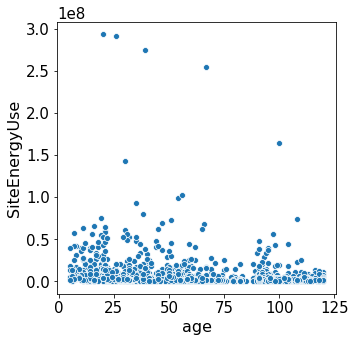

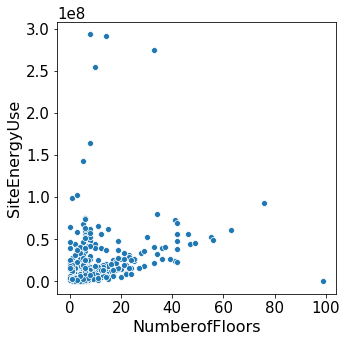

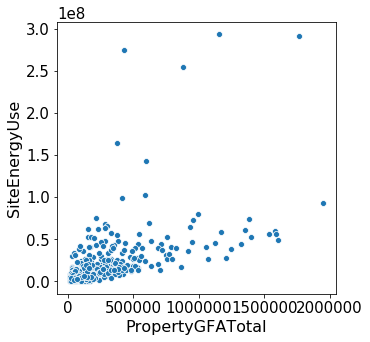

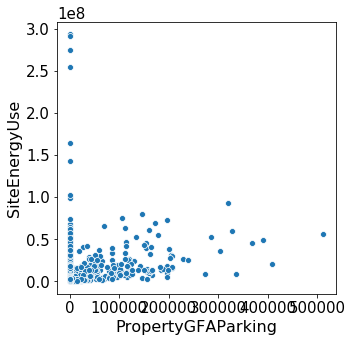

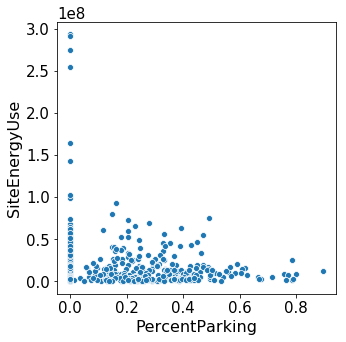

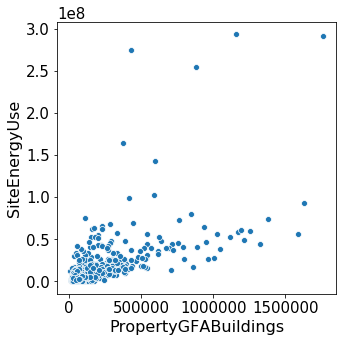

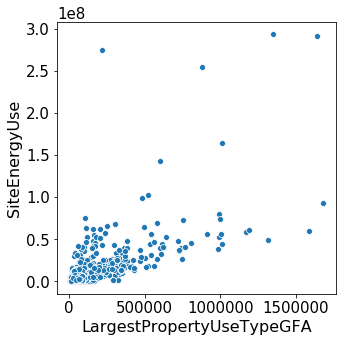

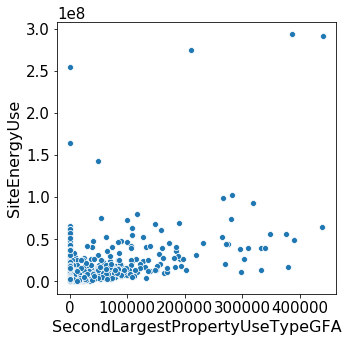

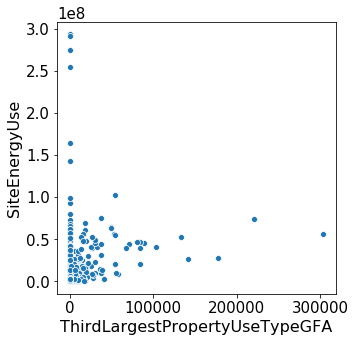

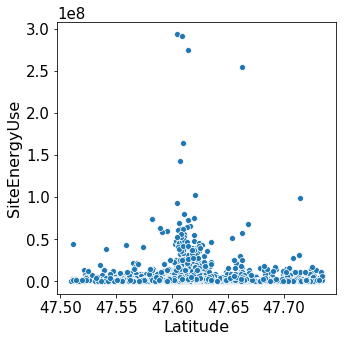

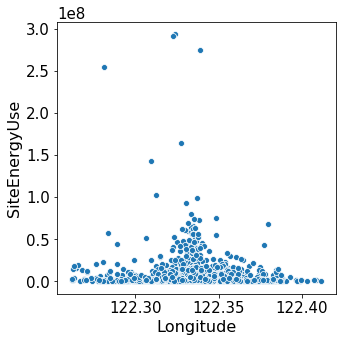

In [81]:
# Graphique - Relation de 'SiteEnergyUse' avec les autres variables :

colonnes =  ['age', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PercentParking', 'PropertyGFABuildings', 
             'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 
             'Latitude', 'Longitude']

nb=1
for col in colonnes:
    fig = plt.figure(figsize = (5, 5))
    sns.scatterplot(x= energy_2016[col], y= energy_2016['SiteEnergyUse'])
    plt.ylabel('SiteEnergyUse', fontsize=16)
    plt.xlabel(col, fontsize=16)
    nomFig = "scatterplot_S{0}.png".format(nb)
    #plt.savefig(nomFig, dpi=50 )
    nb +=1


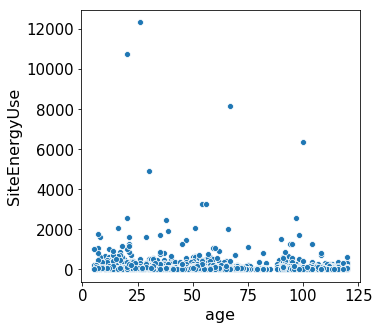

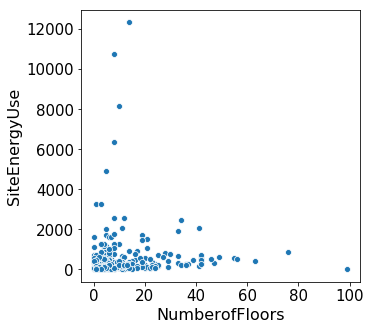

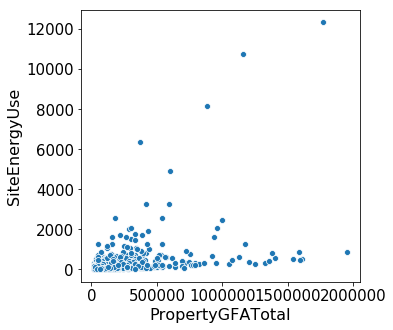

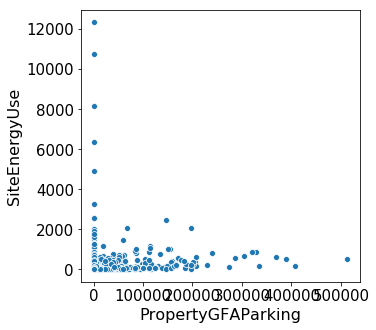

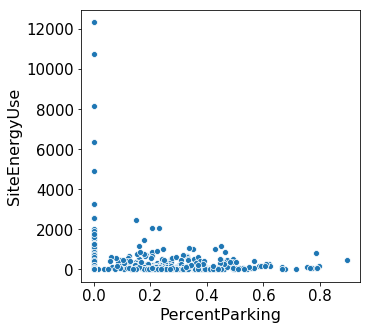

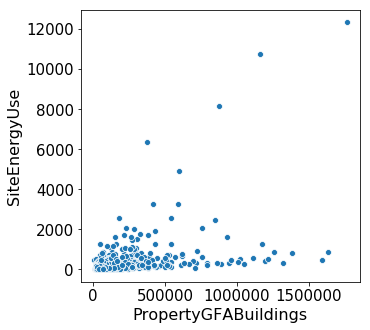

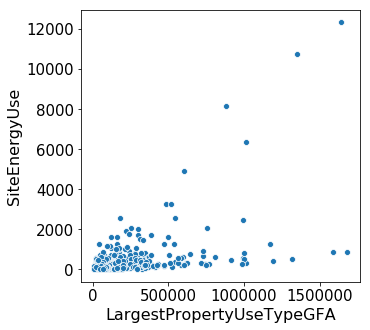

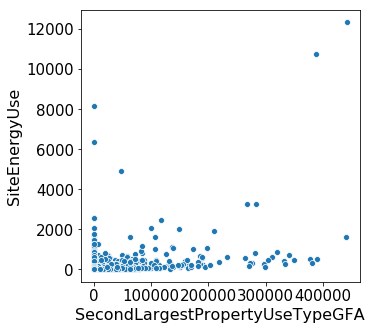

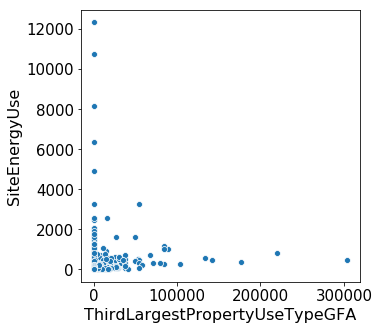

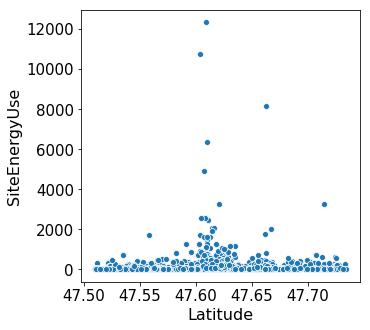

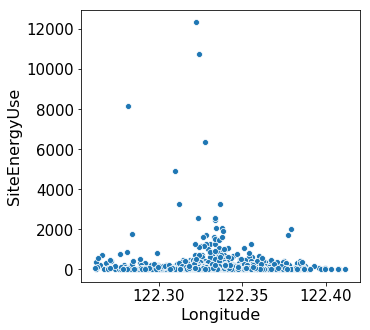

In [82]:
# Graphique - Relation de 'GHGEmissionsCO2' avec les autres variables :

colonnes =  ['age', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PercentParking', 'PropertyGFABuildings', 
             'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 
             'Latitude', 'Longitude']

nb=1
for col in colonnes:
    fig = plt.figure(figsize = (5, 5))
    sns.scatterplot(x= energy_2016[col], y= energy_2016['GHGEmissionsCO2'])
    plt.ylabel('SiteEnergyUse', fontsize=16)
    plt.xlabel(col, fontsize=16)
    nomFig = "scatterplot_G{0}.png".format(nb)
    plt.savefig(nomFig, dpi=50 )
    nb +=1


In [83]:

# Pearson suppose que les données sont normalement distribuées.       => transformation nécessaire avant !
# Spearman ne fait aucune hypothèse sur la distribution des données.

# Interprétation érronnée

# La corrélation de Pearson suppose que les données que nous comparons sont normalement distribuées. 
# Lorsque cette hypothèse n'est pas vraie, la valeur de corrélation reflète la véritable association. 
# La corrélation de Spearman ne suppose pas que les données proviennent d'une distribution spécifique, 
#   il s'agit donc d'une mesure de corrélation non paramétrique. 
# La corrélation de Spearman est également connue sous le nom de corrélation de rang de Spearman 
#  car elle calcule le coefficient de corrélation sur les valeurs de rang des données.


In [117]:
# Statistiques - Corrélation non-linéaire => Spearman,   'SiteEnergyUse'

from scipy.stats import spearmanr


colonnes = energy_2016.columns
spearman_SiteEnergyUse = {}
print("Coefficient de Spearmanr entre SiteEnergyUse et : \n")

for col in colonnes:
    coef_spearman = spearmanr(energy_2016[col], energy_2016['SiteEnergyUse'])[0]    # [0] -> Coef. Spearman correlation
                                                                                    # [1] -> p-value
    spearman_SiteEnergyUse[col] = coef_spearman

# Présentation des Coefs de Pearson du plus Grand au plus petit :    
sorted(spearman_SiteEnergyUse.items(), key=lambda t: t[1], reverse=True)


# Remarque :
# on constate une relation à tendance non-linéaire entre 'SiteEnergyUse' et :


#  'GHGEmissionsCO2'                         0.866
#  'PropertyGFATotal'                        0.737
#  'PropertyGFABuildings'                    0.719
#  'LargestPropertyUseTypeGFA'               0.702
#  'NumberofFloors'                          0.452
#  'PropertyGFAParking'                      0.370
#  'SecondLargestPropertyUseTypeGFA'         0.356
#  'PercentParking'                          0.335
#  'SecondLargestPropertyUseType_Parking'    0.312
#  'CouncilDistrictCode_7'                   0.242
#  'Neighborhood_DOWNTOWN'                   0.231
#  'ZipCode_98101.0'                         0.230
#  ...


Coefficient de Spearmanr entre SiteEnergyUse et : 



[('SiteEnergyUse', 1.0),
 ('GHGEmissionsCO2', 0.8660437646348634),
 ('PropertyGFATotal', 0.7373967022641938),
 ('PropertyGFABuildings', 0.7191509198039014),
 ('LargestPropertyUseTypeGFA', 0.7022277148149546),
 ('NumberofFloors', 0.4529441067057214),
 ('PropertyGFAParking', 0.37056151619475103),
 ('SecondLargestPropertyUseTypeGFA', 0.3568395349168913),
 ('PercentParking', 0.33556687388123535),
 ('SecondLargestPropertyUseType_Parking', 0.31265739408622817),
 ('CouncilDistrictCode_7', 0.2421701955528411),
 ('Neighborhood_DOWNTOWN', 0.2311161775266836),
 ('ZipCode_98101.0', 0.23019038665535174),
 ('ThirdLargestPropertyUseTypeGFA', 0.22879717907192648),
 ('LargestPropertyUseType_Hotel', 0.16150064270010087),
 ('LargestPropertyUseType_Supermarket/Grocery Store', 0.15440337942092577),
 ('ZipCode_98109.0', 0.14490720280770908),
 ('LargestPropertyUseType_Office', 0.14283737100536475),
 ('ThirdLargestPropertyUseType_Other', 0.1411345957611682),
 ('LargestPropertyUseType_Laboratory', 0.1288939039

In [118]:
# Statistiques - Corrélation non-linéaire => Spearman,   'GHGEmissionsCO2'

from scipy.stats import spearmanr


colonnes = energy_2016.columns
spearman_GHGEmissionsCO2 = {}
print("Coefficient de Spearmanr entre GHGEmissionsCO2 et : \n")

for col in colonnes:
    coef_spearman = spearmanr(energy_2016[col], energy_2016['GHGEmissionsCO2'])[0]    # [0] -> Coef. Spearman correlation
                                                                                      # [1] -> p-value
    #print(col," : ", coef_spearman)
    spearman_GHGEmissionsCO2[col] = coef_spearman

# Présentation des Coefs de Pearson du plus Grand au plus petit :    
sorted(spearman_GHGEmissionsCO2.items(), key=lambda t: t[1], reverse=True)

# Remarque :
# on constate une relation à tendance non-linéaire entre 'GHGEmissionsCO2' et :

#  'SiteEnergyUse'                          0.866
#  'PropertyGFABuildings'                   0.568
#  'PropertyGFATotal'                       0.568
#  'LargestPropertyUseTypeGFA'              0.551
#  'NumberofFloors'                         0.308
#  'SecondLargestPropertyUseTypeGFA'        0.247
#  'PropertyGFAParking'                     0.221
#  'LargestPropertyUseType_Hotel'           0.220
#  'ZipCode_98101.0'                        0.204
#  'SecondLargestPropertyUseType_Parking'   0.201
#  'PercentParking'                         0.185
#  'CouncilDistrictCode_7'                  0.179
#  'ThirdLargestPropertyUseTypeGFA'         0.171
#  ...



Coefficient de Spearmanr entre GHGEmissionsCO2 et : 



[('GHGEmissionsCO2', 1.0),
 ('SiteEnergyUse', 0.8660437646348634),
 ('PropertyGFABuildings', 0.5683673833342513),
 ('PropertyGFATotal', 0.5682528065876141),
 ('LargestPropertyUseTypeGFA', 0.5516417670102186),
 ('NumberofFloors', 0.3080502335924574),
 ('SecondLargestPropertyUseTypeGFA', 0.24723474807482443),
 ('PropertyGFAParking', 0.22165099896430568),
 ('LargestPropertyUseType_Hotel', 0.2204754535435096),
 ('ZipCode_98101.0', 0.20474866495699767),
 ('SecondLargestPropertyUseType_Parking', 0.20173260218584138),
 ('PercentParking', 0.18560686933769902),
 ('CouncilDistrictCode_7', 0.17903964418117224),
 ('ThirdLargestPropertyUseTypeGFA', 0.17141727097868412),
 ('Neighborhood_DOWNTOWN', 0.15678827141298815),
 ('LargestPropertyUseType_Supermarket/Grocery Store', 0.1534377828779588),
 ('LargestPropertyUseType_Laboratory', 0.12702882076530705),
 ('LargestPropertyUseType_Hospital (General Medical & Surgical)',
  0.1166584464347488),
 ('ZipCode_98109.0', 0.11464191255363805),
 ('LargestPropert

In [119]:
# Dois-je choisir toutes ces variables pour mon modèle ? 
# Quelles sont les variables qui ont une forte relation linéaire avec les variables 'SiteEnergyUse' et ‘GHGEmissionsCO2’ ?

# Pour y répondre on va faire une matrice de corrélation.

# si le coefficient est proche de  1 c’est qu’il y a une forte corrélation positive
# si le coefficient est proche de -1 c’est qu’il y a une forte corrélation négative
# si le coefficient est proche de  0 c’est qu’il y a une faible corrélation.


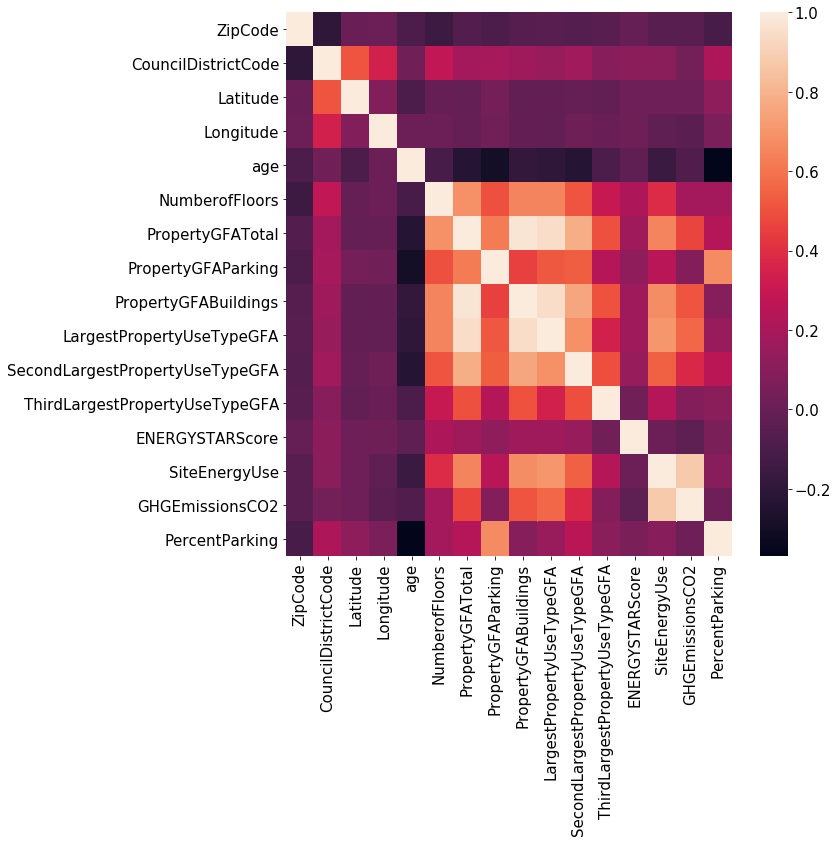

ZipCode  CouncilDistrictCode  Latitude  Longitude       age  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuildings  LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse  GHGEmissionsCO2  PercentParking
ZipCode                          1.000000            -0.199662  0.002706   0.010697 -0.092622       -0.144497         -0.074722           -0.096074             -0.060011                  -0.049116                        -0.069275                       -0.049350        -0.008885      -0.054194        -0.056211       -0.110547
CouncilDistrictCode             -0.199662             1.000000  0.508910   0.344512  0.024712        0.280734          0.191091            0.194507              0.167036                   0.145993                         0.181463                        0.099378         0.108275       0.103697         0.037004        0.218738
Latitude                         0.002706             0.508910  1.000000   0.083963 -0.093811       -0.009262         -0.013281            0.040212             -0.025850                  -0.016661                        -0.006290                       -0.025867         0.016779       0.017934         0.020152        0.119346
Longitude                        0.010697             0.344512  0.083963   1.000000  0.008022        0.008886         -0.009548            0.024734             -0.017477                  -0.023080                         0.012244                        0.003374         0.015618      -0.031115        -0.042995        0.058205
age                             -0.092622             0.024712 -0.093811   0.008022  1.000000       -0.106911         -0.231827           -0.298214             -0.186148                  -0.198937                        -0.230929                       -0.091858        -0.031400      -0.156868        -0.081780       -0.368834
NumberofFloors                  -0.144497             0.280734 -0.009262   0.008886 -0.106911        1.000000          0.685769            0.501077              0.651646                   0.651459                         0.511796                        0.303262         0.216471       0.390014         0.188557        0.183867
PropertyGFATotal                -0.074722             0.191091 -0.013281  -0.009548 -0.231827        0.685769          1.000000            0.624643              0.978346                   0.949592                         0.785417                        0.499629         0.175353       0.649531         0.465626        0.237407
PropertyGFAParking              -0.096074             0.194507  0.040212   0.024734 -0.298214        0.501077          0.624643            1.000000              0.449487                   0.523100                         0.537559                        0.240691         0.126355       0.256387         0.089540        0.668762
PropertyGFABuildings            -0.060011             0.167036 -0.025850  -0.017477 -0.186148        0.651646          0.978346            0.449487              1.000000                   0.947598                         0.755965                        0.507734         0.167098       0.675047         0.508899        0.094319
LargestPropertyUseTypeGFA       -0.049116             0.145993 -0.016661  -0.023080 -0.198937        0.651459          0.949592            0.523100              0.947598                   1.000000                         0.687128                        0.342414         0.170505       0.703054         0.565878        0.154501
SecondLargestPropertyUseTypeGFA -0.069275             0.181463 -0.006290   0.012244 -0.230929        0.511796          0.785417            0.537559              0.755965                   0.687128                         1.000000                        0.496919         0.146216       0.541341         0.377665        0.261342
ThirdLargestPropertyUseTypeGFA  -0.049350             0.099378 -0.025867   0.003374 -0.091858        0.303262 

In [120]:
# Matrice de corrélation heatmap sur le dataframe originale (avant le OneHotEncoding)

fig = plt.figure(figsize = (10, 10))
sns.heatmap(Orig_energy_2016.corr())   # graphique
plt.savefig( "heat.png", dpi=50 )
plt.show()

Orig_energy_2016.corr()                # statistiques

# Remarque :
# 'SiteEnergyUse'   a une forte corrélation avec 'PropertyGFATotal' , 'PropertyGFABuildings' , 'LargestPropertyUseTypeGFA'
#                                                   0.663461             0.693337                0.699967

# 'GHGEmissionsCO2' a une forte corrélation avec 'PropertyGFABuildings' , 'LargestPropertyUseTypeGFA' , 'SiteEnergyUse'
#                                                   0.535380                 0.569726                       0.877279

# Cependant il ne faut pas négliger les autres variables comme 'SecondLargestPropertyUseTypeGFA' par exemple et il y en a 
#   d'autres car leur corrélation est loin de 0.

# N.B :  
# Il faut savoir que lorsqu’on fait une régression linéaire on pose certaines hypothèses notamment la Non-colinéarité 
#   des variables explicatives (une variable explicative ne doit pas pouvoir s’écrire comme combinaison linéaire des autres).
# Ex: 'PropertyGFATotal' et 'NumberofFloors' ont une corrélation de 0.673214
#     'PropertyGFABuildings' et 'PropertyGFATotal' ont une corrélation de 0.978346
     

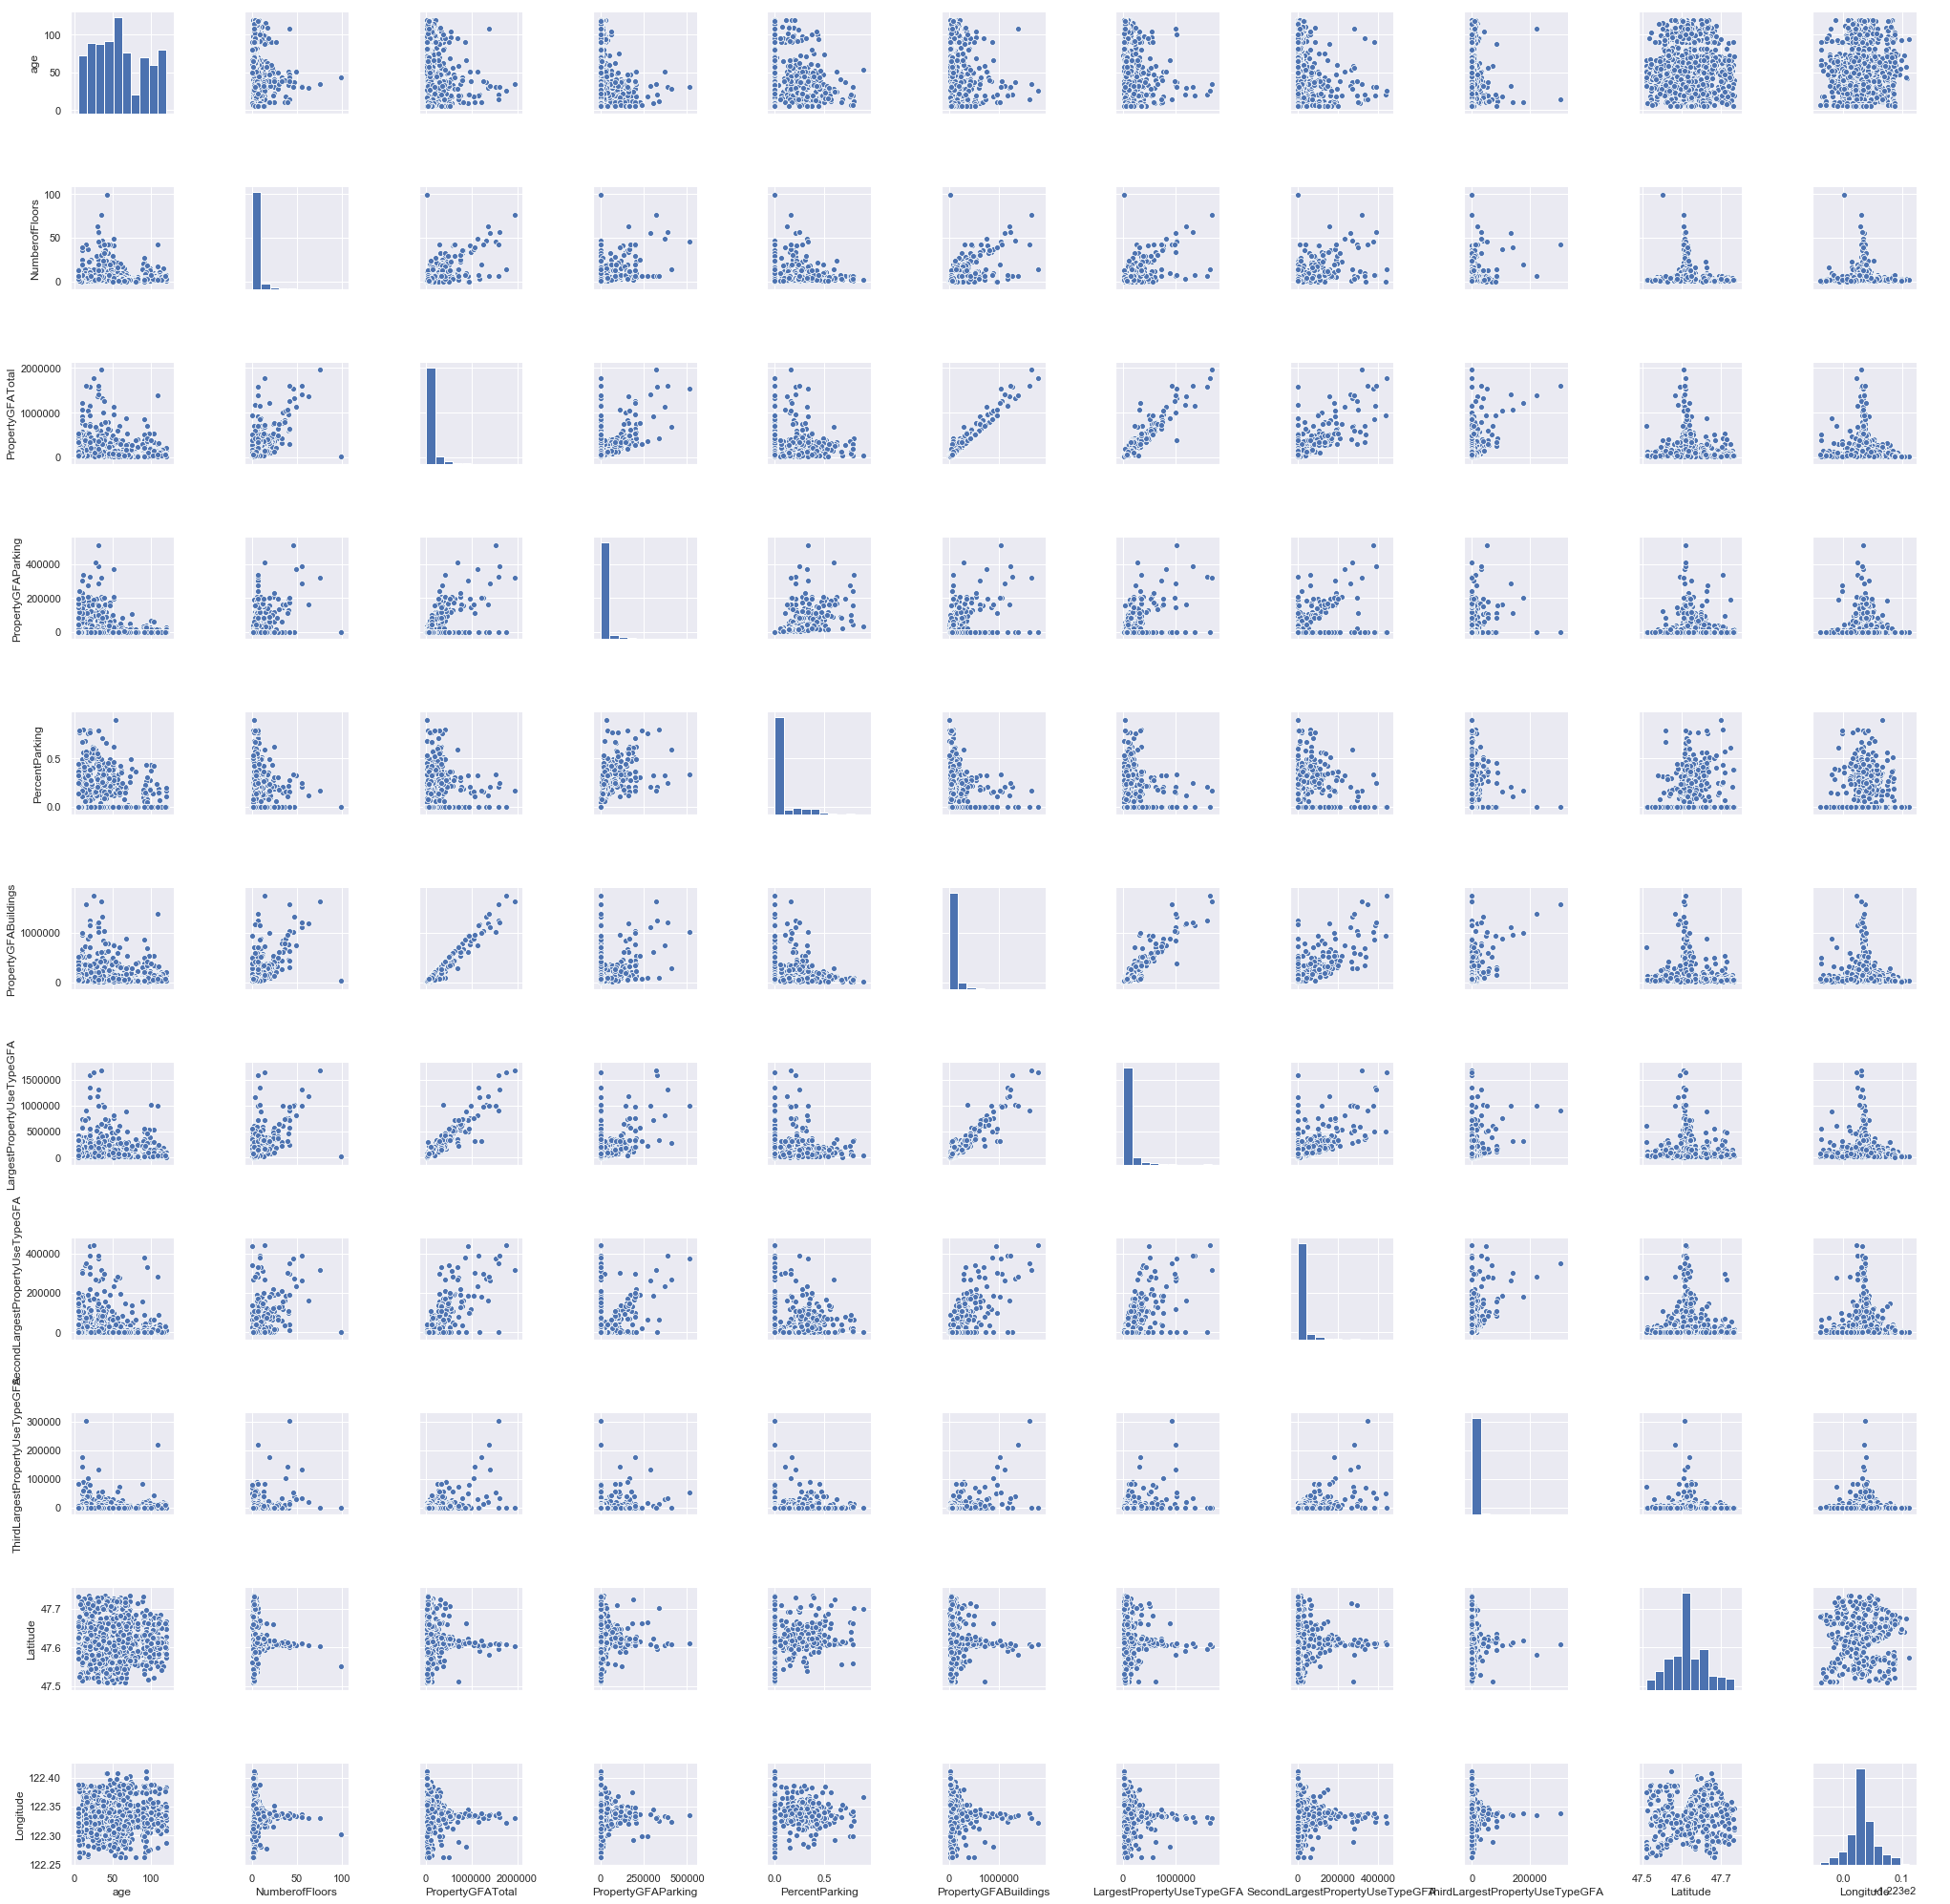

In [121]:
data = energy_2016[['age', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PercentParking', 'PropertyGFABuildings', 
                    'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 
                    'Latitude', 'Longitude']]

sns.set()
sns.pairplot(data);
plt.savefig('corr')
plt.savefig( "analyse_bivar.png", dpi=50 )
plt.show()


### Sauvegarde avant transformation

In [52]:
avantTRANSF_X = energy_2016.copy()     # sauvegarde


In [53]:
energy_2016   = avantTRANSF_X.copy()   # restore


### Transformation des variables

In [53]:
energy_2016.describe()

Latitude    Longitude          age  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuildings  LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse  GHGEmissionsCO2  PercentParking  CouncilDistrictCode_1  CouncilDistrictCode_2  CouncilDistrictCode_3  CouncilDistrictCode_4  CouncilDistrictCode_5  CouncilDistrictCode_6  CouncilDistrictCode_7  Neighborhood_BALLARD  Neighborhood_Ballard  Neighborhood_CENTRAL  Neighborhood_Central  Neighborhood_DELRIDGE  Neighborhood_DOWNTOWN  Neighborhood_Delridge  Neighborhood_EAST  Neighborhood_GREATER DUWAMISH  Neighborhood_LAKE UNION  Neighborhood_MAGNOLIA / QUEEN ANNE  Neighborhood_NORTH  Neighborhood_NORTHEAST  Neighborhood_NORTHWEST  Neighborhood_North  Neighborhood_Northwest  Neighborhood_SOUTHEAST  Neighborhood_SOUTHWEST  LargestPropertyUseType_  LargestPropertyUseType_Adult Education  LargestPropertyUseType_Automobile Dealership  LargestPropertyUseType_Bank Branch  LargestPropertyUseType_College/University  LargestPropertyUseType_Courthouse  LargestPropertyUseType_Data Center  LargestPropertyUseType_Distribution Center  LargestPropertyUseType_Financial Office  LargestPropertyUseType_Fire Station  LargestPropertyUseType_Fitness Center/Health Club/Gym  LargestPropertyUseType_Food Service  LargestPropertyUseType_Hospital (General Medical & Surgical)  LargestPropertyUseType_Hotel  LargestPropertyUseType_K-12 School  LargestPropertyUseType_Laboratory  LargestPropertyUseType_Library  LargestPropertyUseType_Lifestyle Center  LargestPropertyUseType_Manufacturing/Industrial Plant  LargestPropertyUseType_Medical Office  LargestPropertyUseType_Movie Theater  LargestPropertyUseType_Multifamily Housing  LargestPropertyUseType_Museum  LargestPropertyUseType_Non-Refrigerated Warehouse  LargestPropertyUseType_Office  LargestPropertyUseType_Other  LargestPropertyUseType_Other - Education  LargestPropertyUseType_Other - Entertainment/Public Assembly  LargestPropertyUseType_Other - Lodging/Residential  LargestPropertyUseType_Other - Mall  LargestPropertyUseType_Other - Public Services  LargestPropertyUseType_Other - Recreation  LargestPropertyUseType_Other - Restaurant/Bar  LargestPropertyUseType_Other - Services  LargestPropertyUseType_Other - Utility  LargestPropertyUseType_Other/Specialty Hospital  LargestPropertyUseType_Parking  LargestPropertyUseType_Performing Arts  LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)  LargestPropertyUseType_Police Station  LargestPropertyUseType_Pre-school/Daycare  LargestPropertyUseType_Refrigerated Warehouse  LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)  LargestPropertyUseType_Residence Hall/Dormitory  LargestPropertyUseType_Residential Care Facility  LargestPropertyUseType_Restaurant  LargestPropertyUseType_Retail Store  LargestPropertyUseType_Self-Storage Facility  LargestPropertyUseType_Senior Care Community  LargestPropertyUseType_Social/Meeting Hall  LargestPropertyUseType_Strip Mall  LargestPropertyUseType_Supermarket/Grocery Store  LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient  LargestPropertyUseType_Wholesale Club/Supercenter  LargestPropertyUseType_Worship Facility  SecondLargestPropertyUseType_  SecondLargestPropertyUseType_Adult Education  SecondLargestPropertyUseType_Automobile Dealership  SecondLargestPropertyUseType_Bank Branch  SecondLargestPropertyUseType_Bar/Nightclub  SecondLargestPropertyUseType_College/University  SecondLargestPropertyUseType_Convenience Store without Gas Station  SecondLargestPropertyUseType_Courthouse  SecondLargestPropertyUseType_Data Center  SecondLargestPropertyUseType_Distribution Center  SecondLargestPropertyUseType_Enclosed Mall  SecondLargestPropertyUseType_Financial Office  SecondLargestPropertyUseType_Fitness Center/Health Club/Gym  SecondLargestPropertyUseType_Food Sales  SecondLargestPropertyUseType_Food Service  SecondLargestPropertyUseType_Hospital (General Medical &

In [54]:
# Colonnes qui semblent déjà épouser une distribution Gausienne :
#  'Latitude', 'Longitude', 'age'


# colonnes =  ['age', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', , 'PercentParking', 'PropertyGFABuildings', 
#              'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 
#              'Latitude', 'Longitude']

# Remarque :  On ne peut pas passer au LOG des variables <= 0. Ca plante ensuite le fit() des modeles.
#             Log(1)= 0  ;  Log(0.5)= -0,3010299

col_log = ['PropertyGFATotal', 'PropertyGFABuildings', 'LargestPropertyUseTypeGFA']
for col in col_log:      
    energy_2016[col] = np.log(energy_2016[col])
    

col_racine = ['NumberofFloors', 'PropertyGFAParking', 'PercentParking', 'SecondLargestPropertyUseTypeGFA', 
              'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore']
for col in col_racine:      
    energy_2016[col] = np.sqrt(energy_2016[col])

    

# Logarithme :  donne une courbe plus Gausienne
energy_2016['SiteEnergyUse']   = np.log(energy_2016['SiteEnergyUse'])
energy_2016['GHGEmissionsCO2'] = np.log(energy_2016['GHGEmissionsCO2'])

# Racine :
# energy_2016['SiteEnergyUse'] = np.sqrt(energy_2016['SiteEnergyUse'])
# energy_2016['GHGEmissionsCO2'] = np.sqrt(energy_2016['GHGEmissionsCO2'])

# energy_2016 = energy_2016[~y_energy_2016.isin([np.nan, np.inf, -np.inf]).any(1)]   # enlève les inf
# La standardisation crée des négatifs


### Standardisation

In [57]:
# La standardisation n'apporte pas de changement notable sur la valeur du coef. de détermination R2 pour la modélisation,
#    par contre elle diminue l'erreur MSE.


In [58]:
# Standardisation - 1ère version :

# a. Variables explicatives (sauf Les variables oneHotEncodées)
# colonnes =  ['age', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PercentParking', 'PropertyGFABuildings', 
#              'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 
#              'Latitude', 'Longitude', 'ENERGYSTARScore']
# for col in colonnes:      
#     energy_2016[col] = (energy_2016[col] - energy_2016[col].mean()) / energy_2016[col].std()


# b. Variables expliquées
# colonnes = ['SiteEnergyUse', 'GHGEmissionsCO2']
# for col in colonnes:      
#     energy_2016[col] = (energy_2016[col] - energy_2016[col].mean()) / energy_2016[col].std()

# energy_2016.head(3)


In [59]:
# 2. Standardisation - 2ème version :
    
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(energy_2016)
# energy_2016_scaled = scaler.transform(energy_2016)

# cols = energy_2016.columns.tolist()

# # Convertir le 'numpy.ndarray' en un dataframe :
# energy_2016 = pd.DataFrame(data=energy_2016_scaled, index=energy_2016.index, columns=cols)
# energy_2016.head(3)


## Analyse univariée Aprés traitement des données

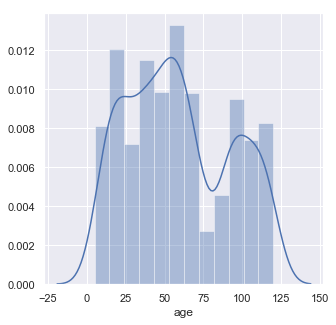

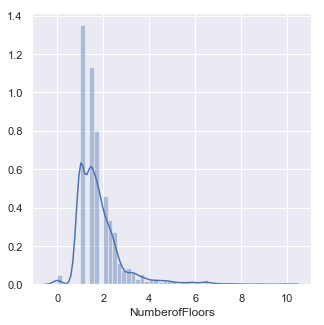

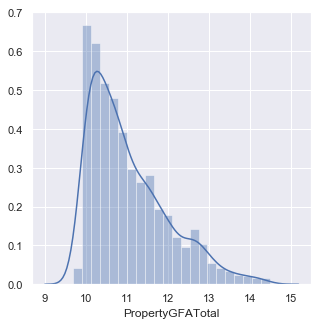

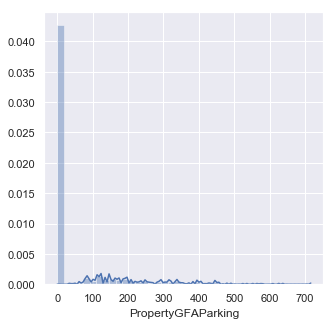

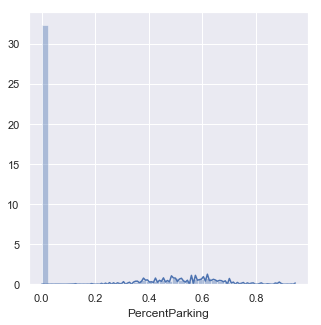

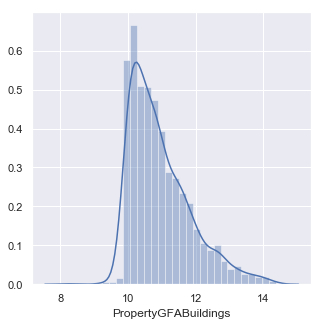

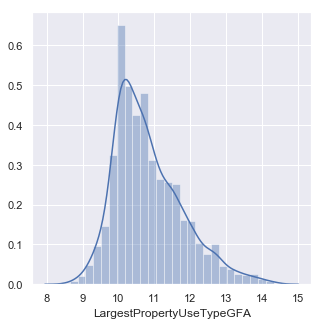

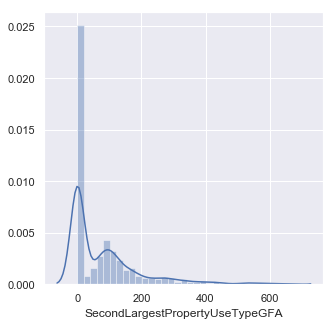

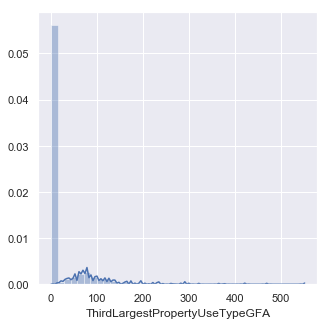

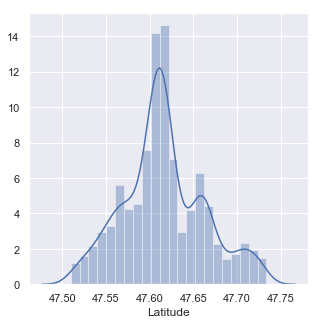

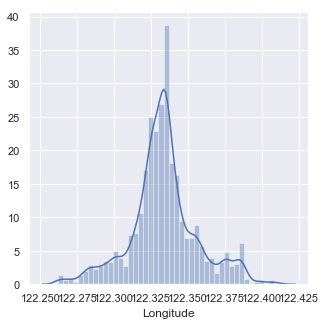

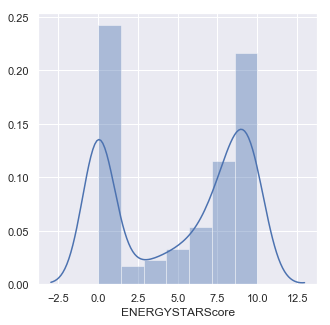

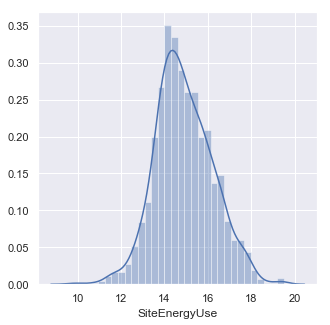

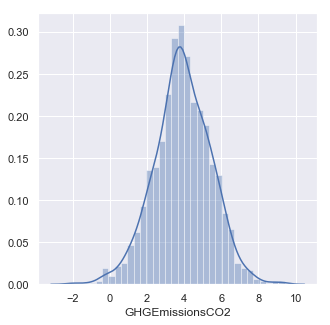

In [129]:
# Histogramme des variables quantitatives :

colonnes =  ['age', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PercentParking', 'PropertyGFABuildings', 
             'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 
             'Latitude', 'Longitude', 'ENERGYSTARScore', 'SiteEnergyUse', 'GHGEmissionsCO2']

nb=1
try:
    for col in colonnes:    
        fig = plt.figure(figsize = (5, 5))
        sns.distplot(energy_2016[col])
        nomFig = "distplotAP{0}.png".format(nb)
        plt.savefig(nomFig, dpi=50 )
        nb +=1
except ValueError:
    print("colonne", col)
except OverflowError:
    print("colonne", col)


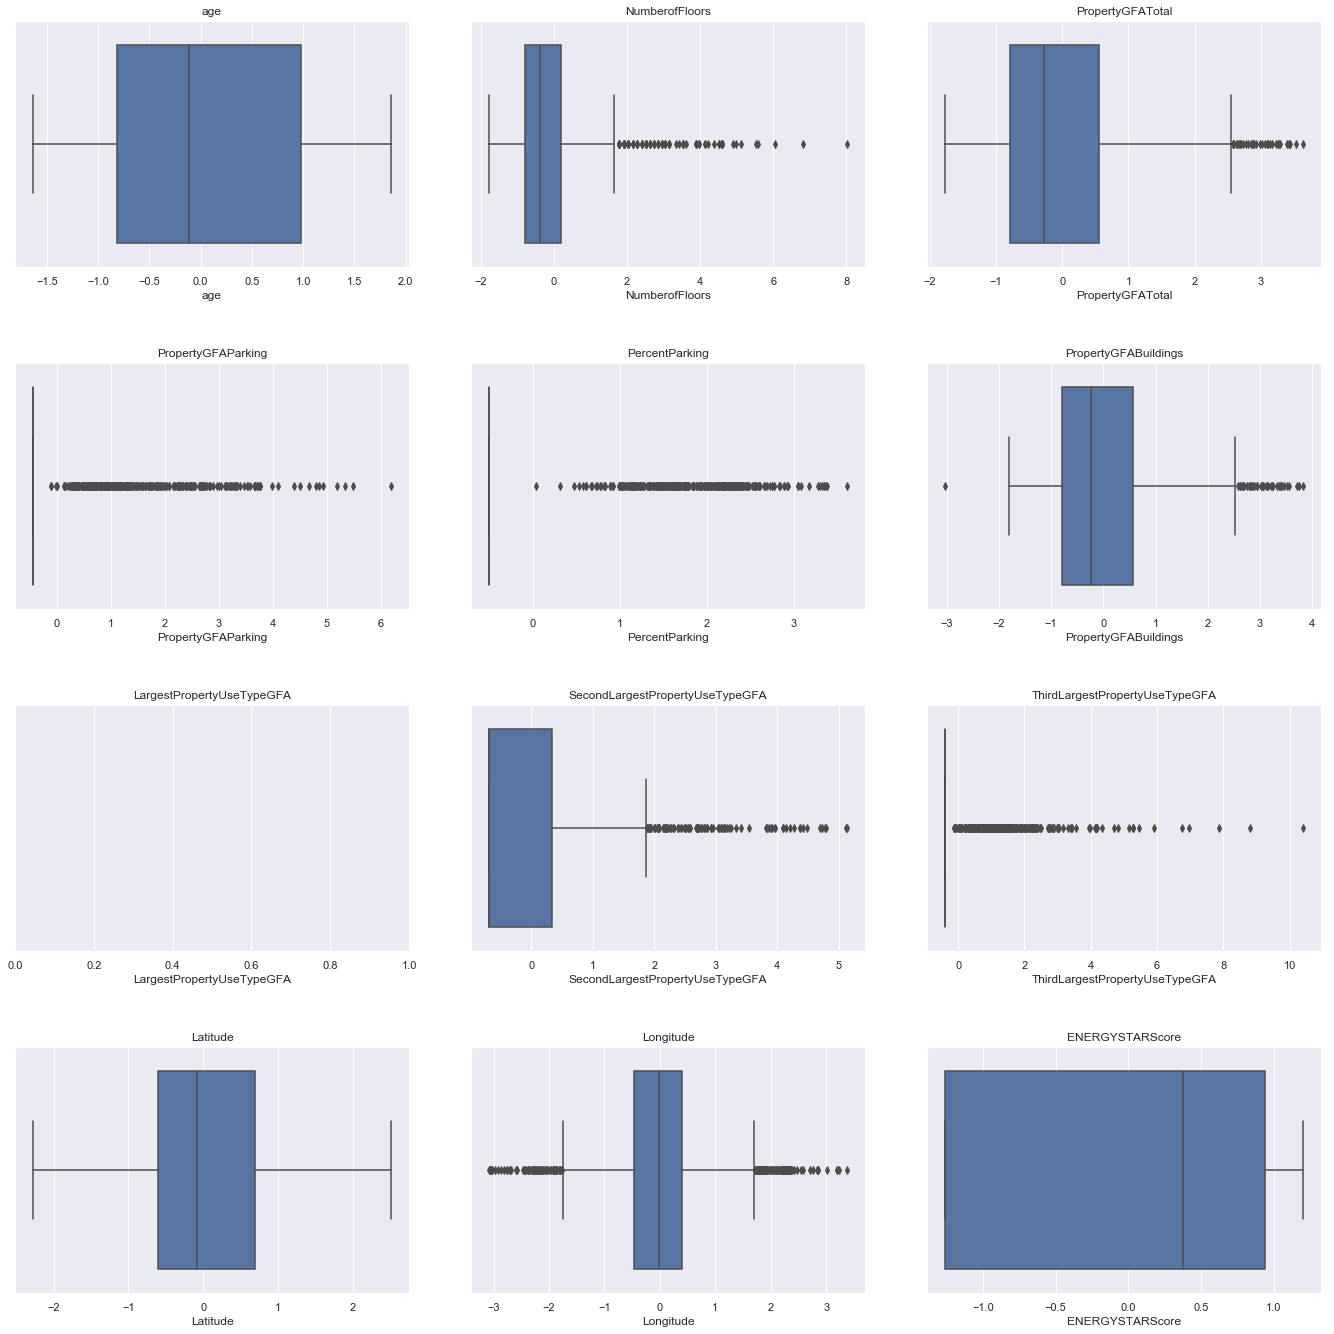

In [135]:
colonnes =  ['age', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PercentParking', 'PropertyGFABuildings', 
             'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 
             'Latitude', 'Longitude', 'ENERGYSTARScore']

fig = plt.figure(figsize = (20, 20))   # largeur,hauteur

num=0
for col in colonnes:      
    plt.subplot(4,3, num+1)
    plt.title(colonnes[num])
    sns.boxplot(x=colonnes[num], data=energy_2016)
    num+=1

plt.tight_layout(pad=5.0, w_pad=4.0, h_pad=4.0)   # marges
plt.savefig( "boxplotAP.png", dpi=50 )
plt.show()


In [352]:
energy_2016.describe()


Latitude    Longitude          age  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuildings  LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse  GHGEmissionsCO2  PercentParking  CouncilDistrictCode_1  CouncilDistrictCode_2  CouncilDistrictCode_3  CouncilDistrictCode_4  CouncilDistrictCode_5  CouncilDistrictCode_6  CouncilDistrictCode_7  Neighborhood_BALLARD  Neighborhood_Ballard  Neighborhood_CENTRAL  Neighborhood_Central  Neighborhood_DELRIDGE  Neighborhood_DELRIDGE NEIGHBORHOODS  Neighborhood_DOWNTOWN  Neighborhood_Delridge  Neighborhood_EAST  Neighborhood_GREATER DUWAMISH  Neighborhood_LAKE UNION  Neighborhood_MAGNOLIA / QUEEN ANNE  Neighborhood_NORTH  Neighborhood_NORTHEAST  Neighborhood_NORTHWEST  Neighborhood_North  Neighborhood_Northwest  Neighborhood_SOUTHEAST  Neighborhood_SOUTHWEST  LargestPropertyUseType_  LargestPropertyUseType_Adult Education  LargestPropertyUseType_Automobile Dealership  LargestPropertyUseType_Bank Branch  LargestPropertyUseType_College/University  LargestPropertyUseType_Courthouse  LargestPropertyUseType_Data Center  LargestPropertyUseType_Distribution Center  LargestPropertyUseType_Financial Office  LargestPropertyUseType_Fire Station  LargestPropertyUseType_Fitness Center/Health Club/Gym  LargestPropertyUseType_Food Service  LargestPropertyUseType_Hospital (General Medical & Surgical)  LargestPropertyUseType_Hotel  LargestPropertyUseType_K-12 School  LargestPropertyUseType_Laboratory  LargestPropertyUseType_Library  LargestPropertyUseType_Lifestyle Center  LargestPropertyUseType_Manufacturing/Industrial Plant  LargestPropertyUseType_Medical Office  LargestPropertyUseType_Movie Theater  LargestPropertyUseType_Multifamily Housing  LargestPropertyUseType_Museum  LargestPropertyUseType_Non-Refrigerated Warehouse  LargestPropertyUseType_Office  LargestPropertyUseType_Other  LargestPropertyUseType_Other - Education  LargestPropertyUseType_Other - Entertainment/Public Assembly  LargestPropertyUseType_Other - Lodging/Residential  LargestPropertyUseType_Other - Mall  LargestPropertyUseType_Other - Public Services  LargestPropertyUseType_Other - Recreation  LargestPropertyUseType_Other - Restaurant/Bar  LargestPropertyUseType_Other - Services  LargestPropertyUseType_Other - Utility  LargestPropertyUseType_Other/Specialty Hospital  LargestPropertyUseType_Parking  LargestPropertyUseType_Performing Arts  LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)  LargestPropertyUseType_Police Station  LargestPropertyUseType_Pre-school/Daycare  LargestPropertyUseType_Prison/Incarceration  LargestPropertyUseType_Refrigerated Warehouse  LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)  LargestPropertyUseType_Residence Hall/Dormitory  LargestPropertyUseType_Residential Care Facility  LargestPropertyUseType_Restaurant  LargestPropertyUseType_Retail Store  LargestPropertyUseType_Self-Storage Facility  LargestPropertyUseType_Senior Care Community  LargestPropertyUseType_Social/Meeting Hall  LargestPropertyUseType_Strip Mall  LargestPropertyUseType_Supermarket/Grocery Store  LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient  LargestPropertyUseType_Wholesale Club/Supercenter  LargestPropertyUseType_Worship Facility  SecondLargestPropertyUseType_  SecondLargestPropertyUseType_Adult Education  SecondLargestPropertyUseType_Automobile Dealership  SecondLargestPropertyUseType_Bank Branch  SecondLargestPropertyUseType_Bar/Nightclub  SecondLargestPropertyUseType_College/University  SecondLargestPropertyUseType_Convenience Store without Gas Station  SecondLargestPropertyUseType_Courthouse  SecondLargestPropertyUseType_Data Center  SecondLargestPropertyUseType_Distribution Center  SecondLargestPropertyUseType_Enclosed Mall  SecondLargestPropertyUseType_Financial Office  SecondLargestPropertyUseType_Fitness Center/Health Club/Gym  SecondLargestPropertyUseType_Food Sales  SecondLargestProp

#### Sauvegarde pour le projet Projet4_bis qui traite de la régression avec 'GHGEmissionsCO2'

In [130]:
energy_2016.to_csv("energy_2016.csv")

#### Sauvegarde avant Regression

In [55]:
avantREG = energy_2016.copy()     # sauvegarde

In [56]:
energy_2016   = avantREG.copy()   # restore

## Régression avec SiteEnergyUse

In [57]:
list_col_X = energy_2016.columns.tolist()

# Enlever de list_col_X les 3 variables expliquées :  'ENERGYSTARScore', 'SiteEnergyUse', 'GHGEmissionsCO2'
list_col_X.remove('ENERGYSTARScore')
list_col_X.remove('SiteEnergyUse')
list_col_X.remove('GHGEmissionsCO2')


In [58]:
from sklearn.model_selection import train_test_split

X = energy_2016[list_col_X]
y = energy_2016['SiteEnergyUse']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)   # Même dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)                 # Différent dataset à chaque coup


### Régression ridge

In [59]:
# Calcul de la baseline 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import Ridge

# On va tester un coefficient alpha= 0 afin de trouver la baseline =  MSE :
ridge = linear_model.Ridge()
ridge.set_params(alpha=0.00000001)
ridge.fit(X_train, y_train)

mse = np.mean((ridge.predict(X_test) - y_test) ** 2)    # MSE
print("BASELINE = MSE =", mse)
baseline_error =  mse


BASELINE = MSE = 0.519133741494546


In [60]:
# Application de la régression ridge:  On doit trouver un coefficient de régularisation adapté.

from sklearn.linear_model import Ridge


# On va tester un certain nombre de coefficients alpha afin de trouver celui qui est optimal.
n_alphas = 150
alphas = np.logspace(-4, 3, n_alphas)    # => de 10^-4 à 10^3
coefs  = []                              # poids des différents coefficients
errors = []                              # erreur quadratique

ridge = linear_model.Ridge()

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)                                        # liste de coefs pour une valeur de alpha
    errors.append(np.mean((ridge.predict(X_test) - y_test) ** 2))    # MSE


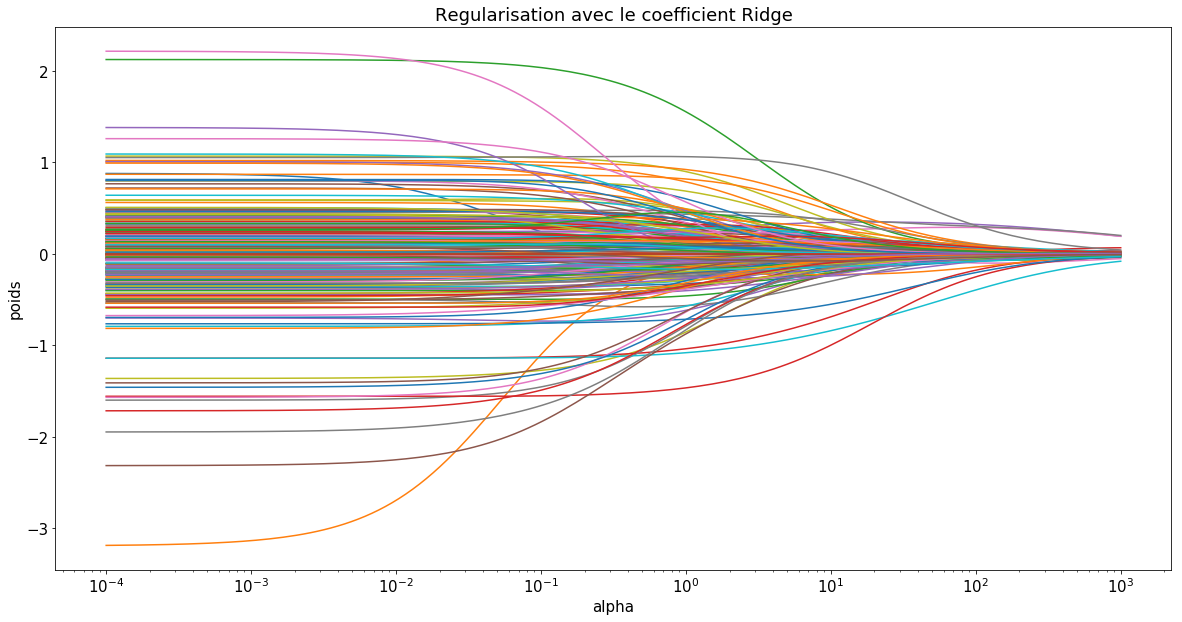

In [61]:
# Evolution de la valeur des différents poids (coef) associés aux paramètres :  Chemin de régularisation

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20, 10))   # largeur,hauteur

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('poids')
plt.title('Regularisation avec le coefficient Ridge')
plt.axis('tight')
plt.savefig( "ridge1.png", dpi=50 )
plt.show()


# Les poids associés aux différents variables évoluent en fonction du coef de régularisation alpha.
# Comme on peut le voir, lorsque la valeur de alpha augmente, les poids de toutes les variables de la régression diminuent. 
#
# Entre 1 et 10, c'est là ou la régularisation est la plus intéressante. 
#
# La régression Ridge groupe les variables corrélées, en leur affectant des coefficients similaires. Ca se voit ici
#     avec 1 groupement de variables qui doivent être corrélés et quelques variables qui semblent indépendantes.


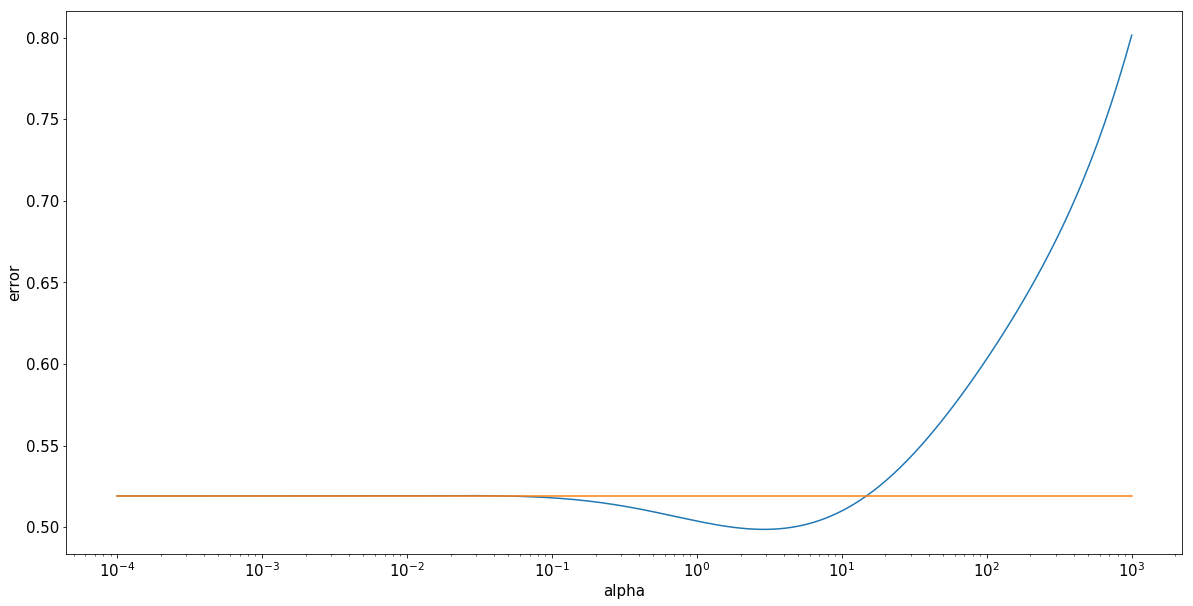

Meilleur paramètre alpha de régularisation =  2.904606121598046
Meilleur score MSE =  0.4986578016084946
Baseline MSE       =  0.519133741494546


In [62]:
# Evolution de la MSE en fonction de alpha en la comparant à la baseline :

fig = plt.figure(figsize = (20, 10))   # largeur,hauteur

ax = plt.gca()
ax.plot(alphas, errors, [10**-4, 10**3], [baseline_error, baseline_error])   # 2 courbes :  x1,y1 , 2x,y2
# ax.plot(alphas, errors)

ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.savefig( "ridge2.png", dpi=50 )
plt.show()

alpha_opt = alphas[np.argmin(errors) ]    

print("Meilleur paramètre alpha de régularisation = ", alpha_opt)
print("Meilleur score MSE = ", errors[np.argmin(errors)])
print("Baseline MSE       = ", baseline_error)

# Le graphique nous montre que la régularisation diminue l'erreur sur le jeu de données test.
# Vers alpha<10, le minimum d'erreur semble se trouver pour la régression ridge. On peut récupérer la valeur minimum :
# = 2.904606121598046  <- ce param de régularisation a permis de diminuer l'erreur quadratique  = 0.51


In [63]:
# Version automatique :

from sklearn.linear_model import RidgeCV

n_alphas = 150
alphas = np.logspace(-4, 3, n_alphas)    # => de 10^-4 à 10^3

ridge = RidgeCV(alphas=alphas, cv=5).fit(X_train, y_train)

r2  = ridge.score(X_test, y_test)
mse = mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test))

print("R2  =", r2)                                     # Coef. de détermination R2
print("MSE =", mse)
print("\nMeilleur alpha =", ridge.alpha_)
# ridge.coef_   # liste de coefs pour une valeur de alpha

# R2  = 0.7205243575602776
# MSE = 0.4989539333721378
# Meilleur alpha = 3.6061765077612336


R2  = 0.7205243575602776
MSE = 0.4989539333721378

Meilleur alpha = 3.6061765077612336


In [ ]:
# ----------------------------------------------------
#             R2                   MSE  
# ----------------------------------------------------
# Ridge       0.7205243575602776   0.4989539333721378     (Meilleur alpha = 3.6061765077612336)


In [ ]:
# La régression Ridge groupe les variables corrélées, en leur affectant des coefficients similaires.

# Là où la régression non régularisée peut répartir le poids affecté à un groupe de variable corrélées de plusieurs façons, 
#   la régression régularisée les répartit de manière homogène.

# La régression Ridge nous permet de réduire l'amplitude des coefficients d'une régression linéaire et 
#   d'éviter le sur-apprentissage.

# Si plusieurs variables corrélées contribuent à la prédiction de l'étiquette, 
#   le lasso va avoir tendance à choisir une seule d'entre elles (affectant un poids de 0 aux autres),
#       plutôt que de répartir les poids équitablement comme la régression ridge.
# C'est ainsi qu'on arrive à avoir des modèles très parcimonieux. 
# Cependant, laquelle de ces variables est choisie est aléatoire, et peut changer si l'on répète la procédure d'optimisation.
# Le lasso a donc tendance à être instable.


### Régression Lasso

In [141]:
# Application de la régression Lasso:  On doit trouver un coefficient de régularisation adapté.

from sklearn.linear_model import Lasso


# On va tester un certain nombre de coefficients alpha afin de trouver celui qui est optimal.
n_alphas = 120
alphas = np.logspace(-4, 2, n_alphas)    # => de 10^-4 à 10^2

lasso = linear_model.Lasso()

coefs  = []
errors = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)                                        # liste de coefs pour une valeur de alpha
    errors.append(np.mean((lasso.predict(X_test) - y_test) ** 2))    # MSE


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211.20492407729242, tolerance: 0.2128325479564903
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205.17003161219628, tolerance: 0.2128325479564903
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200.5698629581295, tolerance: 0.2128325479564903
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

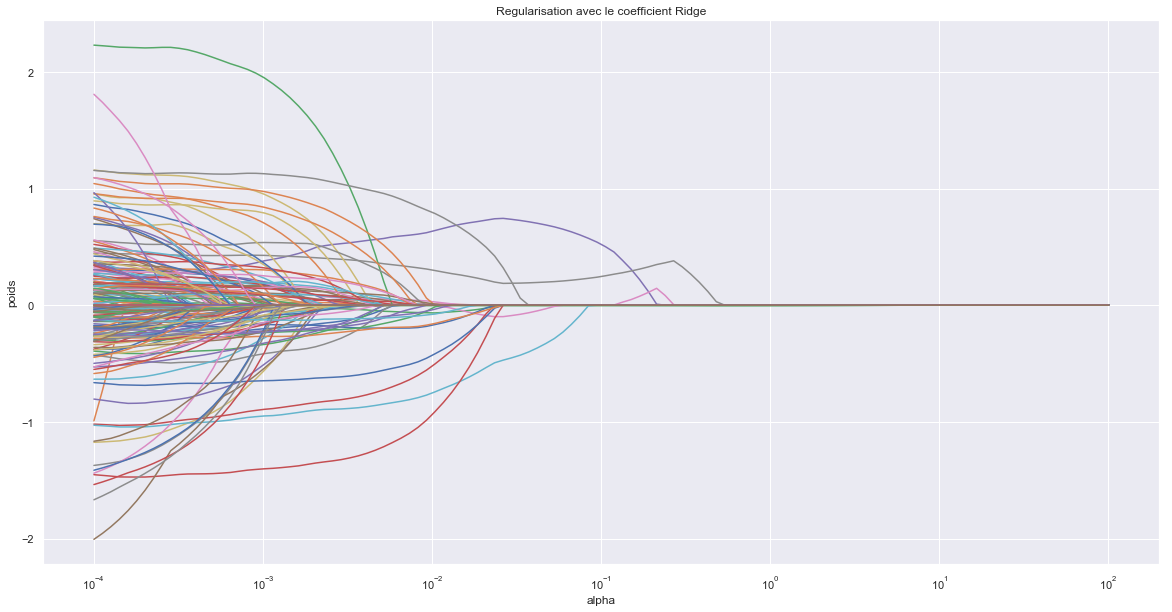

In [142]:
# Evolution de la valeur des différents poids (coef) associés aux paramètres :  Chemin de régularisation

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20, 10))   # largeur,hauteur

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('poids')
plt.title('Regularisation avec le coefficient Ridge')
plt.axis('tight')
plt.savefig( "lasso1.png", dpi=50)
plt.show()

# Les poids des différents paramètres évolue en fonction du coef de régularisation alpha.
# Comme on peut le voir, lorsque la valeur de alpha augmente, les poids de tous les paramètres de la régression diminuent. 

# Autour de 10-2, là ou la régularisation est la plus intéressante. A ce point là beaucoup de coef s'annule et 
#   une poignée d'entre eux garde une valeur non nulle.


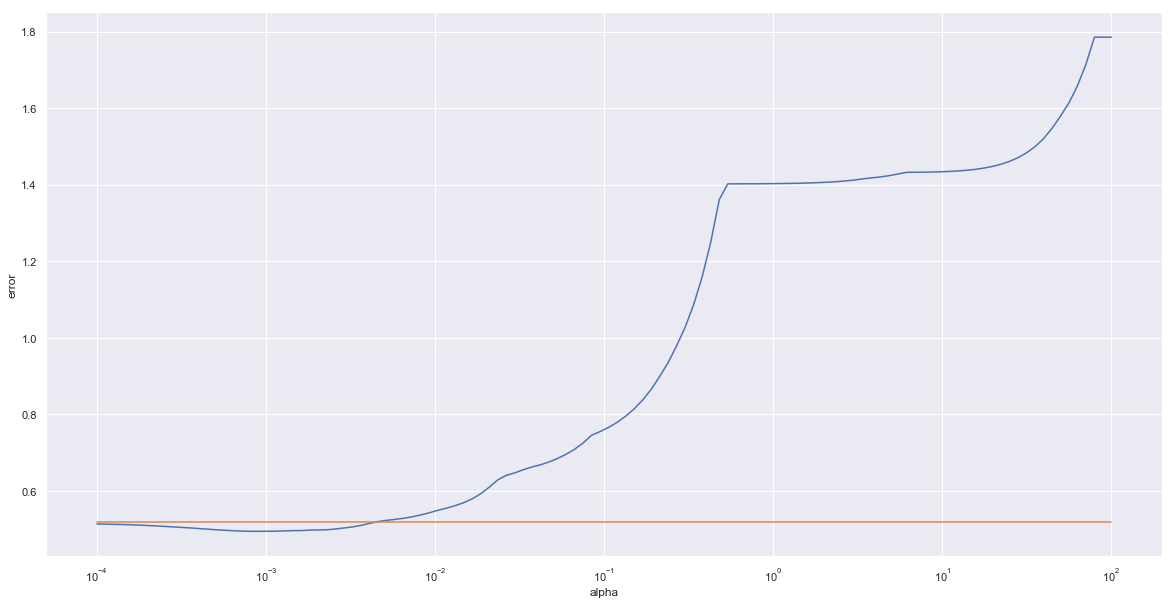

Meilleur paramètre alpha de régularisation =  0.0008082822192522714
Meilleur score MSE =  0.494543911153664


In [143]:
# Evolution de la MSE en fonction de alpha en la comparant à la baseline :

fig = plt.figure(figsize = (20, 10))   # largeur,hauteur

ax = plt.gca()
ax.plot(alphas, errors, [10**-4, 10**2], [baseline_error, baseline_error])   # 2 courbes :  x1,y1 , 2x,y2
# ax.plot(alphas, errors)   # 2 courbes :  x1,y1 , 2x,y2

ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.savefig( "lasso2.png", dpi=50)
plt.show()

# On peut récupérer la valeur de alpha pour lequel l'erreur quadratique est minime :
alpha_opt = alphas[np.argmin(errors)]

print("Meilleur paramètre alpha de régularisation = ", alpha_opt)
print("Meilleur score MSE = ", errors[np.argmin(errors)])

# Le graphique nous montre que la régularisation diminue l'erreur sur le jeu de données test.
# Dans l'intervalle de alpha [10-4;10-2] , le minimum d'erreur semble se trouver pour la régression lasso. 


In [71]:
# Version automatique :

from sklearn.linear_model import LassoCV

n_alphas = 150
alphas = np.logspace(-4, 3, n_alphas)    # => de 10^-4 à 10^3

lasso = LassoCV(alphas=alphas, cv=5).fit(X_train, y_train)

r2  = lasso.score(X_test, y_test)
mse = mean_squared_error(y_true=y_test, y_pred=lasso.predict(X_test))

print("R2  =", r2)
print("MSE =", mse)
print("\nMeilleur alpha =", lasso.alpha_)

# R2  = 0.7211607366376347
# MSE = 0.49781779198610804
# Meilleur alpha = 0.001855480420138844


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.29811882584226623, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6430507407679897, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4876735210435186, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.2312469014888165, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.985316583249414, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.517608723917988, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. Y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.785442498110996, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.37773183390970644, tolerance: 0.16825368703336108
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3682874863278016, tolerance: 0.16825368703336108
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.320110593119921, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.067348270936918, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8607332664050773, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. Y

R2  = 0.7211607366376347
MSE = 0.49781779198610804

Meilleur alpha = 0.001855480420138844


In [114]:
# ----------------------------------------------------
#             R2                   MSE  
# ----------------------------------------------------
# Ridge       0.7205243575602776   0.4989539333721378     (Meilleur alpha = 3.6061765077612336)
# Lasso       0.7211607366376347   0.49781779198610804    (Meilleur alpha = 001855480420138844)



# Scores sont globalement équivalents et La régularisation fonctionne bien dans les deux cas.

# L'un diminue grandement l'influence de certaines variables sur le modèle,
#      tandis que l'autre peut directement les supprimer (mettre leur poids à zéro), et donc d'être parcimonieux.


### Application d'ElasticNet

In [66]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV


elastic = ElasticNet(fit_intercept= False)
search = GridSearchCV(estimator=elastic, 
                      param_grid={'alpha':np.logspace(-4, 3, 100), 'l1_ratio':[.2,.4,.6,.8]},
                      scoring='neg_mean_squared_error', n_jobs=1, refit=True, cv=5)            # MSE
                      #scoring='r2', n_jobs=1, refit=True, cv=5)                               # R2

search.fit(X_train, y_train)

print("Meilleurs paramètres :", search.best_params_)
print("Meilleur MSE :", abs(search.best_score_))
# model = search.best_estimator_    # Sauvegarde du meilleur modele
print("Meilleur R2  :", search.best_estimator_.score(X_test, y_test))

# Meilleurs paramètres : {'alpha': 0.001873817422860383, 'l1_ratio': 0.8}
# Meilleur MSE : 0.5131798567696013
# Meilleur R2  : 0.7216556719512861


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197.10065214346963, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200.83476957635236, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204.7605589201354, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201.43348622726893, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205.12742266962888, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207.5339114329632, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215.0328286541097, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228.0689753818972, tolerance: 21.832447000631106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204.3278589224045, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229.7288188999113, tolerance: 21.832447000631106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204.81117968982005, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208.17302541535474, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215.44756667270582, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219.8111927131125, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221.78230072083574, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237.50331516047908, tolerance: 21.832447000631106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210.36081911321403, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214.39307080635686, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225.94934771035693, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226.93273479514568, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241.01876241901272, tolerance: 21.832447000631106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227.80195584921879, tolerance: 21.832447000631106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212.14707584029253, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215.72459716514166, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230.1460765760746, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234.7031757852151, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234.75966566673978, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218.078241842904, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231.84543646705237, tolerance: 21.832447000631106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218.5196560351904, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213.10869344840881, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 217.03164851446675, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216.43173057607163, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244.61756745786386, tolerance: 21.832447000631106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 230.74487702643188, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232.83848645849343, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231.16454300731678, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235.70703458673054, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232.90040097429167, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229.69335121333714, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231.79108777544906, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235.83760882652018, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250.02071515714184, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266.98249608331037, tolerance: 21.832447000631106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252.96717324635515, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252.81716081586802, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255.5774454479291, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258.74405643650584, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271.08333592196254, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271.4715816604805, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264.9835540664127, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272.01930669065297, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266.68672798574244, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284.5499716071083, tolerance: 21.832447000631106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273.3591539383997, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289.48661271819617, tolerance: 21.832447000631106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270.6793598594879, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295.8270815790386, tolerance: 21.832447000631106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277.85039497372634, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284.0814936911397, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285.1416360837475, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.2977423027752, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 286.7158716738337, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.0675203262389, tolerance: 21.832447000631106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256.6371964446017, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270.9036187732384, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276.81954798414256, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.628636268818, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275.64615724763763, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161.09329484491315, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.3181229357811, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172.17306942853142, tolerance: 21.832447000631106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233.61086260332604, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216.45884942877015, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209.56181151974477, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274.4074673043692, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263.67326010598293, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263.3720483502734, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145.52371212945206, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133.88715899717124, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149.7176843851234, tolerance: 21.832447000631106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201.30026849554005, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214.21588022585743, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202.79494149877814, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.07471980925021, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90.01381392873014, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.77246667462896, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115.77982828450757, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111.78603290266568, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117.23123546695177, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.24992510881134, tolerance: 21.832447000631106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.66638299102726, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.77722946602455, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54.4852828315735, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.415120824155565, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.86826662552255, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.43708752303769, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.99478332211731, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72.56755012440215, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.85729464928784, tolerance: 21.832447000631106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.882433258007495, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.769383774356584, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.73985039290778, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.6054383637229, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.93246836958383, tolerance: 21.832447000631106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.77737336363987, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.05933085136712, tolerance: 21.835979742482035
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.19545207951228, tolerance: 21.832447000631106
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.614733958693705, tolerance: 21.803434105931345
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.36210474225163, tolerance: 21.86266443665278
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.75004738864254, tolerance: 21.873413771760607
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

Meilleurs paramètres : {'alpha': 0.001873817422860383, 'l1_ratio': 0.8}
Meilleur MSE : 0.5131798567696013
Meilleur R2  : 0.7216556719512861


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 305.38543010220235, tolerance: 27.30198476436447
  positive)


In [67]:
from sklearn.linear_model import ElasticNetCV

n_alphas = 200
alphas = np.logspace(-4, 3, n_alphas)

# clf = ElasticNetCV(alphas=alphas, l1_ratio=[.1, .2, .3, .5, .7, .8 , .9, 1, 1.1, 1.5], cv=5).fit(X_train, y_train)
elastic = ElasticNetCV(alphas=alphas, l1_ratio=[.8 , .9, 1.0 , 1.1, 1.5, 1.6, 1.7, 1.8, 2.0], cv=5).fit(X_train, y_train)

print("R2  =", elastic.score(X_test, y_test))
print("MSE =", mean_squared_error(y_true=y_test, y_pred=elastic.predict(X_test)) )
print("Meilleur alpha =", elastic.alpha_)
print("Meilleur ratio ? =", elastic.l1_ratio_)

# R2   = 0.7220347746270452
# MSE  = 0.4962573529835315
# Meilleur alpha = 0.0013354515629298987
# Meilleur ratio  = 1.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22211896512857265, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.26683289154357226, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2712199141587348, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6692065331511685, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.045093537698108, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9592728633200522, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.142984447932065, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.6322748263064, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.026436683436316, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.647521297243884, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0154250897165298, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1495945415835536, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6037922763606502, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27763768640431863, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24891493418959953, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.524032834465686, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.777063339590427, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.494476683078858, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. Yo

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.43426143676345, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.2641587520053, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.303531471129133, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7977311949927071, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8495161945600671, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8589473664181355, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5818648237178081, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7053976290290507, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7047931696578189, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.316998680277379, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2581953282195855, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2214495846082514, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.603736216555944, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.75503473606159, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.370951278427015, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.503499962255546, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5569615063741367, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5270432634750932, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9245278515156201, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0164636764198463, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0295828257281983, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.194829768446027, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.15068517815763, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1621630026928074, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. Yo

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.861909230816877, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.02941528407021, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.744250880063447, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7665233609001803, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7285301688523305, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5298016406703141, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.151896000226998, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8124908282206889, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6971388030536332, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7857976508522597, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.838024715547192, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2610947293159143, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.49588370488027, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.16343473566633, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.32286943542681, tolerance: 0.16825368703336108
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9783521712524816, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8464711010253154, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.272773299574226, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1026: RuntimeWarning: overflow encountered in square
  this_mses = ((residues ** 2).mean(axis=0)).mean(axis=0)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.604662424181356, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.28012782753882, tolerance: 0.1695792

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8105748473425365, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.792702425471134, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.156420724551225, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17299145264371418, tolerance: 0.16825368703336108
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.16825368703336108
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1026: RuntimeWarning: overflow encountered in square
  this_mses = ((residues ** 2).mean(axis=0)).mean(axis=0)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8052920644608434, tolerance: 0.170

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0472746659233394, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.30308115207168385, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.714203493024968, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.7128567303572595, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.2329686455226465, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.886354648378926, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.980176973189515, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.259710654586456, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1026: RuntimeWarning: overflow encountered in square
  this_mses = ((residues ** 2).mean(axis=0)).mean(axis=0)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9540936835649063, to

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2268196750932248, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9733446418582048, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7723257812561997, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.118918354015932, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.652903705909978, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154.86796670817557, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.46862391627536, tolerance: 0.17427047184853395
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.490753855262426, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.587352349349601, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.984527957530929, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. Yo

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4981603064655928, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.426578713642243, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.16891614117580317
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.616389087997618, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.757009849260726, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.937308655249524, tolerance: 0.16957926271486368
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. Yo

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.16825368703336108
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.035922861515473, tolerance: 0.16825368703336108
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.321131908337179, tolerance: 0.16825368703336108
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103.01955571179424, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase th

R2  = 0.7220347746270452
MSE = 0.4962573529835315
Meilleur alpha = 0.0013354515629298987
Meilleur ratio ? = 1.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.607959970713864, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.204274321007972, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.383650379917981, tolerance: 0.17027024550463454
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. Yo

In [68]:
# Utilisation des résultats de 'ElasticNetCV' pour visualiser les coefficients :

from sklearn.linear_model import ElasticNet

best_elastic = ElasticNet(alpha=0.0013354515629298987, l1_ratio=1.7)
best_elastic.fit(X_train, y_train)

print("R2  =", best_elastic.score(X_test, y_test))
print("MSE =", mean_squared_error(y_true=y_test, y_pred=best_elastic.predict(X_test)) )

# Pour voir les coefs qui se rapprochent de zéro :
coef_dict_baseline = {}
for coef, feat in zip(best_elastic.coef_, X_train.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# Présentation des Coefs du plus Grand au plus Petit :    
sorted(coef_dict_baseline.items(), key=lambda t: t[1], reverse=True)


R2  = 0.7220347746270452
MSE = 0.4962573529835315


[('LargestPropertyUseType_Data Center', 2.4204964921012553),
 ('LargestPropertyUseType_Supermarket/Grocery Store', 1.1312720763028918),
 ('LargestPropertyUseType_Laboratory', 0.9696359849438425),
 ('LargestPropertyUseType_Hospital (General Medical & Surgical)',
  0.8852770105325241),
 ('LargestPropertyUseType_Restaurant', 0.7808767579699788),
 ('LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient',
  0.6708499487843057),
 ('LargestPropertyUseType_Other - Recreation', 0.561812853196229),
 ('PropertyGFATotal', 0.5318594159594602),
 ('LargestPropertyUseType_Other/Specialty Hospital', 0.4269417564051964),
 ('LargestPropertyUseTypeGFA', 0.4121075092741948),
 ('SecondLargestPropertyUseType_Restaurant', 0.2592786956075382),
 ('ThirdLargestPropertyUseType_Data Center', 0.23197738292648187),
 ('ThirdLargestPropertyUseType_Office', 0.22569485444902976),
 ('LargestPropertyUseType_Hotel', 0.18595317945769074),
 ('ZipCode_98116.0', 0.1743183055860582),
 ('LargestPropertyUseType_Medical Offic

In [ ]:
# ----------------------------------------------------
#             R2                   MSE  
# ----------------------------------------------------
# Ridge       0.7205243575602776   0.4989539333721378     (Meilleur alpha = 3.6061765077612336)
# Lasso       0.7211607366376347   0.49781779198610804    (Meilleur alpha = 001855480420138844)
# ElasticNet  0.7220347746270452   0.4962573529835315     (Meilleur alpha = 0.0013354515629298987,  Meilleur ratio = 1.7)


### Arbre de décision

In [ ]:
# Notre dataframe contient beaucoup de features (200) et il y a une certaine redondance entre toutes ces variables.

# Dans un second temps, on va utiliser cette première modélisation pour mieux comprendre le dataset et ainsi effectuer 
#   une seconde modélisation plus efficace en éliminant des variables peu importantes.

# On va d'abord éliminer les features redondantes (intuitivement, les surfaces doivent être corrélées par exemple ... )
# Un moyen serait d'utiliser justement une forêt aléatoire (!) de laquelle on va extraire l'importance des features 
#      qui la constituent, et ainsi déterminer quelles sont les features les plus importantes à partir de ça.


# http://cedric.cnam.fr/vertigo/Cours/ml2/tpArbresDecision.html
# http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/ml_a_tree_overfitting.html
# https://gdcoder.com/decision-tree-regressor-explained-in-depth/
# file:///C:/Users/loic/Downloads/Cours3.html
        

In [ ]:
# Arbres CART :  Principe : construire un arbre de décision ou chaque noeud est une question binaire.
        
# Sous sklearn le modèle est dénommé DecisionTreeClassifier & DecisionTreeRegressor, 
#  les hyperparamètres à connaitre sont les suivants:
        
#  - criterion         :  Critère de découpe des noeuds, Gini pour la précision, Entropy pour un gain d'information
#  - max_depth         :  profondeur maximale de l'arbre
#  - min_samples_split :  Nombre minimal d'observations pour séparer un noeud
#  - max_features      :  Nombre de features à considérer pour la meilleure séparation d'un noeud.        

# min_samples_leaf  : nombre minimal d’exemples par feuille
# max_depth         : profondeur maximale de l'arbre
# min_samples_split : Nombre minimal d'observations pour séparer un noeud
#
# Choisir des bonnes valeurs pour les paramètres 'max_depth' et 'min_samples_leaf' permet d’éviter le sur-apprentissage.
# Un arbre représente une fonction en escalier. La profondeur détermine le nombre de feuilles, 
#      c’est-à-dire le nombre de valeurs possibles.
#
# Chaque feuille d’un arbre prédit une valeur calculée à partir d’un ensemble d’observations. Ce nombre 'min_samples_split' 
#   ne peut pas être inférieur à la valeur de ce paramètre. 
# Ce mécanisme limite la possibilité de faire du surapprentissage en augmentant la représentativité de chaque feuille.

# 'max_depth' et 'min_samples_split' sont les hyper-paramètres les plus importants

# On entraîne l’arbre, on limite la profondeur à 3 histoire de pouvoir visualiser l’arbre résultant. 
# Ce n’est certainement pas assez puisque 2^3=8 = le nombre de feuilles,
#    est un nombre inférieure au nombres de tranches de salaires possibles.

# https://openclassrooms.com/fr/courses/6389626-train-a-supervised-model
# http://cedric.cnam.fr/vertigo/Cours/ml2/tpArbresDecision.html

# Faites varier (ou mieux, réalisez une recherche par grille avec GridSearchCV) 
#    les valeurs des paramètres max_depth et min_samples_leaf pour mesurer leur impact sur ce score.
# Calculer l’erreur quadratique moyenne sur l’ensemble de test. 
# Faire un grid search pour trouver la valeur du paramètre max_depth qui minimize cette erreur.


In [159]:
# L’objectif est de régresser 'SiteEnergyUse' à partir des valeurs de X. 
# Pour cela, nous utilisons  UN  arbre de décision.

# Recherche des hyper-paramètres :

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

reg = DecisionTreeRegressor()
search = GridSearchCV(estimator=reg, 
                      param_grid={'min_samples_leaf':[10,20,21,22,30], 'max_depth':[3,6,7,8,9,12], 
                                  'min_samples_split':[3,6,7,8,9,12]},
                      scoring='neg_mean_squared_error', n_jobs=1, refit=True, cv=5)   # MSE
                      #scoring='r2', n_jobs=1, refit=True, cv=5)                       # R2

search.fit(X_train, y_train)
print("Meilleurs paramètres :", search.best_params_)
print("Meilleur  MSE :", abs(search.best_score_))

model = search.best_estimator_                # Sauvegarde du meilleur modele
print("Meilleur  R2  :", model.score(X_test, y_test))

# Meilleurs paramètres : {'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 12}
# Meilleur  MSE : 0.6752551623294609
Meilleur  R2  : 0.5927938943090699


Meilleurs paramètres : {'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 12}
Meilleur  MSE : 0.6752551623294609
Meilleur  R2  : 0.5927938943090699


In [161]:
from sklearn.tree import DecisionTreeRegressor

decisionTree = DecisionTreeRegressor(max_depth=6, min_samples_leaf=10, min_samples_split=12)
decisionTree.fit(X_train, y_train)

print("R2  =", decisionTree.score(X_test, y_test))
print("MSE =", mean_squared_error(y_true=y_test, y_pred=decisionTree.predict(X_test)) )

R2  = 0.59279389430907
MSE = 0.7269939031322253

R2  = 0.5927938943090698
MSE = 0.7269939031322258


In [ ]:
#   Méthodes ensemblistes ou d’agrégation :  Bagging, Forêts aléatoires, Boosting

# 1. Méthodes par moyennage (bagging, forêts aléatoires),
#      où le principe est de faire la moyenne de plusieurs prédictions en espérant un meilleur résultat,
#        suite à la réduction de variance de l’estimateur moyenne.

# 2. Méthodes adaptatives (boosting),
#      où les paramètres sont itérativement adaptés pour produire un meilleur mélange.
    

In [160]:
# ----------------------------------------------------
#             R2                   MSE  
# ----------------------------------------------------
# Ridge       0.7205243575602776   0.4989539333721378     (Meilleur alpha = 3.6061765077612336)
# Lasso       0.7211607366376347   0.49781779198610804    (Meilleur alpha = 001855480420138844)
# ElasticNet  0.7220347746270452   0.4962573529835315     (Meilleur alpha = 0.0013354515629298987,  Meilleur ratio = 1.7)
# Arbre de    0.59279389430907     0.7269939031322253     (max_depth=6, min_samples_leaf=10, min_samples_split=12)
# décision  


### Bagging

In [ ]:
# Pour comparer, construisons maintenant un classifieur de type 'bagging' , toujours basé sur les DecisionTreeRegressor :


In [165]:
# 'base_estimator':  par défaut l’estimateur est un Arbre de Décision
# 'n_estimators'  :  nombre d'instances d’un estimateur
#
# Chaque estimateur utilise au maximum 80% des points pour son apprentissage et la moitié des attributs (features) :
#    - max_samples  : la taille de l’échantillon aléatoire tiré de la base d’apprentissage 'train'.
#    - max_features : le nombre d’attributs tirés aléatoirement.
#

In [171]:
# Pour quelles valeurs des parametres max_samples et max_features,obtient-on le meilleur résultat ?

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

pgrid = {"max_samples": [0.8, 0.9, 0.95, 0.99],
         "max_features": [0.8, 0.9, 0.95, 0.99],
         "n_estimators": [50, 60, 70, 80, 90]}


# search = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(max_depth=6, min_samples_leaf=10, min_samples_split=12), 
#                                        n_estimators=100), param_grid=pgrid, cv=5)  -> moins bon résultats

search = GridSearchCV(BaggingRegressor(DecisionTreeRegressor()), param_grid=pgrid, cv=5)
search.fit(X_train, y_train)

print("Meilleur R2  = " + str(search.best_estimator_.score(X_test, y_test)))
print("Meilleur MSE = ",mean_squared_error(y_true=y_test, y_pred=search.best_estimator_.predict(X_test)))
print("max_samples : " + str(search.best_estimator_.max_samples))
print("max_features: " + str(search.best_estimator_.max_features))
print("n_estimators: " + str(search.best_estimator_.n_estimators))

# Meilleur R2  = 0.7106522637829107
# Meilleur MSE =  0.5165787967693056
# max_samples : 0.99
# max_features: 0.9
# n_estimators: 90
    

Meilleur R2  = 0.7106522637829107
Meilleur MSE =  0.5165787967693056
max_samples : 0.99
max_features: 0.9
n_estimators: 90


In [180]:
from sklearn.ensemble import BaggingRegressor


# Ensemble de classifieurs dont le classifieur de base est un 'DecisionTreeRegressor' :
bagging = BaggingRegressor(DecisionTreeRegressor(), n_estimators=90, max_samples=0.99, max_features=0.9)
bagging.fit(X_train, y_train)

r2 = bagging.score(X_test, y_test)
print("R2  = ", r2)
print("MSE = ", mean_squared_error(y_true=y_test, y_pred=bagging.predict(X_test)))

# R2  =  0.7150492115580924
# MSE =  0.5087288304248077


R2  =  0.7192941324783677
MSE =  0.5011502809256976


In [ ]:
# ----------------------------------------------------
#             R2                   MSE  
# ----------------------------------------------------
# Ridge       0.7205243575602776   0.4989539333721378     (Meilleur alpha = 3.6061765077612336)
# Lasso       0.7211607366376347   0.49781779198610804    (Meilleur alpha = 001855480420138844)
# ElasticNet  0.7220347746270452   0.4962573529835315     (Meilleur alpha = 0.0013354515629298987,  Meilleur ratio = 1.7)
# Arbre de    0.59279389430907     0.7269939031322253     (max_depth=6, min_samples_leaf=10, min_samples_split=12)
# décision  
# Bagging     0.7106522637829107   0.5165787967693056     (n_estimators=90, max_samples=0.99, max_features=0.90)


#### GridSearchCV

In [ ]:
La fonction GridSearchCV de sklearn permet d'effectuer cette recherche d'hyperparamètres, elle prend en entrée :

 - estimateur
 - espace de paramètres, i.e., une liste de valeurs possible pour chaque paramètre
 - nombre de folds pour la CV
 - fonction d'évaluation
 - autres paramètres pour le sampling ..

L'algorithme effectue pour chaque n-uplet de paramètres un calcul des performances du modèle sur une K-CV. A la fin, 
  il récupère les paramètres ayant obtenu le meilleur score.

Plus il y a de paramètres et de folds, plus le calcul sera long.


### Forêts aléatoires

In [ ]:
Dans la majorité des modèles disponibles dans sklearn on trouve les paramètres globaux suivants:

 - n_jobs : nombre de coeurs à utiliser pour effectuer les calculs, dépend de votre cpu.
 - verbose : affichage du déroulement des calculs, 0 = silent.
 - random_state : si la méthode repose sur de l'aléatoire, fixe le générateur pour reproduire les résultats.
    
 ***** Mon ordinateur a 4 coeur et 8 processeurs logiques (Ctrl + Maj + Échap : ouvre le Gestionnaire des tâches.)    


In [ ]:
# L’algo des forêts aléatoires propose une optimisation des arbres de décision.  Il utilise le même principe que le bagging, 
#   mais avec une étape supplémentaire de randomisation dans la sélection des attributs des nœuds,
#     dans le but de réduire la variance de l’estimateur obtenu.

Principe :  ensemble d'arbres décisionnel où a été introduit de l'aléatoire. 
            Le résultat final est obtenu par vote majoritaire ou moyenne. (Tree bagging + feature sampling)

Sous sklearn le modèle est dénommé RandomForestClassifier & RandomForestRegressor, il y a deux sortes d'hyperparamètres, 
  ceux relatif aux arbres utilisés et ceux de la forêt. 
* Hyperparamètres des arbres sont ceux cités plus haut :
  - criterion         :  Critère de découpe des noeuds, Gini pour la précision, Entropy pour un gain d'information
  - max_depth         :  profondeur maximale de l'arbre
  - min_samples_split :  Nombre minimal d'observations pour séparer un noeud
  - max_features      :  Nombre de features à considérer pour la meilleure séparation d'un noeud.        
* Hyperparamètre le plus important pour les random forest est :
  - n_estimators      :  nombre d’itérations = nombre d'arbre utilisés dans la fôret.  
        La précision a tendance à augmenter quand le nombre d'arbres augmente, mais, le temps de calcul est de + en + long.

On étudie les deux mêmes paramètres pour une random forest à ceci près que,
    ce modèle est une somme pondérée des résultats produits par un ensemble d’arbres de décision.
        
        
Tuning = Optimisation des hyperparamètres, plus ils sont bien choisi plus le modèle est performant.
        
# ------------------------------------------------------------------------------------------
Méthodes d'ensemble --> Méthodes non paramètrique : Random Forest, GBT, ExtraTrees ...

De manière général, les méthodes d'ensemble sont constituées de la manière suivante:
 - Un espace d'hyphotèse  H 
 - Des weak learners  ht  efficace sur  H 
 - Les combiner pour obtenir un big learner  H 
 - On ne s'intéresse ici qu'au weak learners étant des arbres.

# RandomForest a un caractère aléatoire dans l'algorithme. 
# Tout d'abord, lors du bootstrap, il échantillonne les données de chaque arbre. 
# Deuxièmement, lorsqu'il choisit des sous-échantillons aléatoires de variables pour chaque division.

# Pour reproduire les résultats entre les exécutions, vous devez définir le paramètre random_state. Par exemple:
#     estimator = RandomForestRegressor(random_state=420)


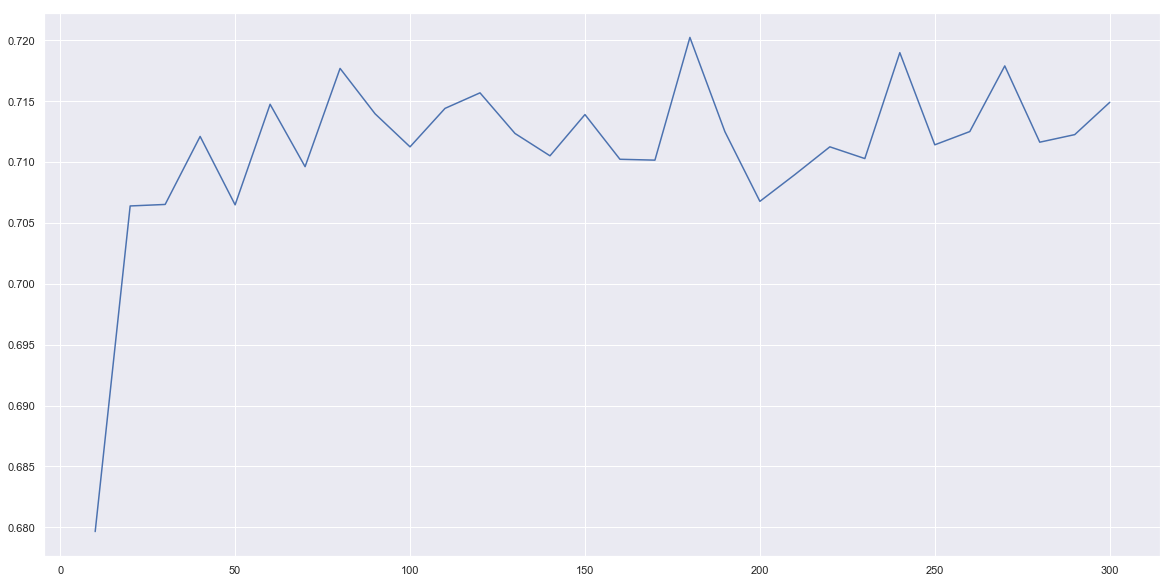

In [182]:
# Construire le graphique R2 vs n_estimators. 
#
#   A partir de quelle valeur de 'n_estimators' on n’améliore plus ?

from sklearn.ensemble import RandomForestRegressor

fig = plt.figure(figsize = (20, 10))   # largeur,hauteur

N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

for i in range(N):
    clf = RandomForestRegressor(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    #print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.savefig( "foret_al.png", dpi=50)
plt.show()

# A partir de n_estimators = 60,
#   le résultat commence à osciller autour de la moyenne, donc on ne gagne plus rien en augmentant la valeur.


In [183]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# n_estimators      : nombre d’arbres (default=10).
# max_depth         :  profondeur maximale de l'arbre
# min_samples_split :  Nombre minimal d'observations pour séparer un noeud
#
# max_features     : Nombre de features à considérer pour la meilleure séparation d'un noeud.
# max_samples      : taille de l’échantillon aléatoire tiré de la base d’apprentissage.
# min_samples_leaf : nombre minimal d’éléments dans un nœud feuille.
# criterion         :  Critère de découpe des noeuds, Gini pour la précision, Entropy pour un gain d'information

# L’objet search va conserver le bon parametrage et peut directement faire appel à la fonction predict() par exemple.
# Vous pouvez aussi regarder quel paramétrage a été élu via les propriétés best_params_ et best_estimator_. 
# Bien sur la méthode score vous donne le meilleur score obtenu avec la meilleure combinaison.
# Mode opératoire :
#  - Prenez tout d’abord les paramètres important (en commençant bien sur par les paramètres obligatoires), 
#      ajustez par la suite les paramètres facultatifs.
#  - Ayez une approche par dichotomie : prenez tout d’abord des valeurs espacées, puis réduisez l’écart.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
   
pgrid = {
          "n_estimators": [80, 90, 100],
          #"max_depth": [15, 16, 17, 18, 20],
          "min_samples_split": [6, 8, 9, 10],
          "max_features": [0.8, 0.9, 0.95, 0.99],
          "max_samples": [0.8, 0.9, 0.95, 0.99],
          "min_samples_leaf": [20, 30, 40]}

search = GridSearchCV(RandomForestRegressor(DecisionTreeRegressor()), param_grid=pgrid, cv=5, n_jobs=4)
search.fit(X_train, y_train)

print("Meilleur R2 : " + str(search.best_estimator_.score(X_test, y_test)))
print("Meilleur MSE = ",mean_squared_error(y_true=y_test, y_pred=search.best_estimator_.predict(X_test)))
print("n_estimators: " + str(search.best_estimator_.n_estimators))
print("min_samples_split: " + str(search.best_estimator_.min_samples_split))
print("max_features: " + str(search.best_estimator_.max_features))
print("max_samples: " + str(search.best_estimator_.max_samples))
print("min_samples_leaf: " + str(search.best_estimator_.min_samples_leaf))


Meilleur R2 : 0.6419880027996936
Meilleur MSE =  0.6391665929743238
n_estimators: 100
max_depth: None
min_samples_split: 8
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.9, max_leaf_nodes=None,
                      max_samples=0.99, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
{'max_features': 0.9, 'max_samples': 0.99, 'min_samples_leaf': 20, 'min_samples_split': 8, 'n_estimators': 100}


In [186]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)  

randomForest = RandomForestRegressor(n_estimators=100, n_jobs=4, max_features=0.9, max_samples=0.99, 
                                     min_samples_leaf=20, min_samples_split=8)
randomForest.fit(X_train, y_train)

r2 = randomForest.score(X_test, y_test)
print("R2  = ", r2)
print("MSE = ",mean_squared_error(y_true=y_test, y_pred=randomForest.predict(X_test)))

# R2  =  0.6433244858071936
# MSE =  0.6367805408387753


R2  =  0.6427263182334586
MSE =  0.6378484623976098


In [ ]:
# ----------------------------------------------------
#             R2                   MSE  
# ----------------------------------------------------
# Ridge       0.7205243575602776   0.4989539333721378     (Meilleur alpha = 3.6061765077612336)
# Lasso       0.7211607366376347   0.49781779198610804    (Meilleur alpha = 001855480420138844)
# ElasticNet  0.7220347746270452   0.4962573529835315     (Meilleur alpha = 0.0013354515629298987,  Meilleur ratio = 1.7)
# Arbre de    0.59279389430907     0.7269939031322253     (max_depth=6, min_samples_leaf=10, min_samples_split=12)
# décision  
# Bagging     0.7106522637829107   0.5165787967693056     (n_estimators=90, max_samples=0.99, max_features=0.90)
# Foret Alea  0.6433244858071936   0.6367805408387753     (n_estimators=100, max_features=0.9, max_samples=0.99,
#                                                          min_samples_leaf=20, min_samples_split=8)


### Boosting

In [ ]:
Gradient Tree Boosting :

Principe : Boosting + descente de gradient. 
           C'est-à-dire qu'on combine les arbres de façon pondérée en optimisant les poids par descente de gradient.

Sous sklearn le modèle est dénommé GradientTreeClassifier & GradientTreeRegressor. 
Comme pour les forêts, il y a les paramètres propres aux arbres, et ceux au boosting qui sont les suivants:

 - loss : Fonction de coût pour la GD.
 - learning_rate : pas de la descente de gradient, i.e., vitesse de choix des poids .
 - n_estimators : nombre d'itérations.
 - max_features : profondeur des arbres, cependant, dans le GTB, les arbres sont bien moins profond que pour les RF. 
    On obtient par exemple de bon résultat avec des stump trees (max_depth=2)
    

#### AdaBoost

In [192]:
#
# base_estimator :  The base estimator from which the boosted ensemble is built. Default DecisionTreeRegressor(max_depth=3).
# n_estimators   :  default=50
# learning_rate  :  default=1.
# loss           :  The loss function to use when updating the weights after each boosting iteration.
#                      {‘linear’, ‘square’, ‘exponential’}, default=’linear’


In [80]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

params = {'n_estimators': [60, 70, 80],
          'learning_rate' : [0.1, 0.5, 1.0 , 1.5, 2.0],
          'loss' : ['linear', 'square', 'exponential'] }

abreg = AdaBoostRegressor()
search = GridSearchCV(abreg, params, cv=5)
search.fit(X_train, y_train)

ypred = search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)
print("R2: %.2f" % r2)
print("MSE: %.2f" % mse)
print(search.best_params_)
print(search.best_estimator_)

# R2: 0.61
# MSE: 0.70
# {'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 60}
# AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='square',
#                   n_estimators=60, random_state=None)
    

NameError: name 'GridSearchCV' is not defined

In [194]:
from sklearn.ensemble import AdaBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# AdaBoost basé sur 60 arbres de décision
adaBoost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=60, learning_rate=1.0, loss='square')
adaBoost.fit(X_train, y_train)
r2 = adaBoost.score(X_test, y_test)
print("R2 =", r2)
print("MSE = ",mean_squared_error(y_true=y_test, y_pred=adaBoost.predict(X_test)))

# R2 = 0.6962495320027959
# MSE =  0.5422923065773816
# AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='square',
#                   n_estimators=60, random_state=None)

R2 = 0.697509393029929
MSE =  0.5400430493272587


#### GradientBoosting

In [195]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

params = {'n_estimators': [50, 60],
          'learning_rate' : [0.1, 0.5, 1.0 , 1.5, 2.0],
          'loss' : ['ls', 'lad', 'huber', 'quantile'] }

gradientBoosting = GradientBoostingRegressor()
search = GridSearchCV(gradientBoosting, params, cv=5)
search.fit(X_train, y_train)

ypred = search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)
print("R2: %.4f" % r2)
print("MSE: %.4f" % mse)
print(search.best_params_)

# {'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 60}
# R2: 0.7081
# MSE: 0.5211
    

R2: 0.7081
MSE: 0.5211
{'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 60}


In [197]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

gradientBoosting = GradientBoostingRegressor(n_estimators=60, learning_rate=0.1, loss='ls').fit(X_train, y_train)

print("R2  =", gradientBoosting.score(X_test, y_test))
print("MSE =", mean_squared_error(y_test, gradientBoosting.predict(X_test)))


R2  = 0.7047469184108753
MSE = 0.5271217380989189


In [445]:
# ----------------------------------------------------
#             R2                   MSE  
# ----------------------------------------------------
# Ridge       0.7205243575602776   0.4989539333721378     (Meilleur alpha = 3.6061765077612336)
# Lasso       0.7211607366376347   0.49781779198610804    (Meilleur alpha = 001855480420138844)
# ElasticNet  0.7220347746270452   0.4962573529835315     (Meilleur alpha = 0.0013354515629298987,  Meilleur ratio = 1.7)
# Arbre de    0.59279389430907     0.7269939031322253     (max_depth=6, min_samples_leaf=10, min_samples_split=12)
# décision  
# Bagging     0.7106522637829107   0.5165787967693056     (n_estimators=90, max_samples=0.99, max_features=0.90)
# Foret Alea  0.6433244858071936   0.6367805408387753     (n_estimators=100, max_features=0.9, max_samples=0.99,
#                                                          min_samples_leaf=20, min_samples_split=8)
# AdaBoost    0.6962495320027959   0.5422923065773816     (n_estimators=60, learning_rate=1.0, loss='square')
# GradientBo  0.7081               0.5211                 (n_estimators=60, learning_rate=0.1, loss='ls')





### XGboost

In [199]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

xgboost = XGBRegressor()
params = {'n_estimators': [50, 60],
          'learning_rate' : [0.1, 0.5, 1.0 , 1.5, 2.0],
          'nthread':[4], #when use hyperthread, xgboost may become slower
          'objective':['reg:linear'],
          'max_depth': [5, 6, 7],
          'min_child_weight': [4],
          'subsample': [0.7],
          'colsample_bytree': [0.7]}

search = GridSearchCV(xgboost, params, cv=5, n_jobs=4)
search.fit(X_train, y_train)

ypred = search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)
print("R2: %.4f" % r2)
print("MSE: %.4f" % mse)
print(search.best_params_)

# R2: 0.7022
# MSE: 0.5317
# {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 60, 
#  'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7}


[16:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
MSE: 0.5317
R2: 0.7022
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 60, 'nthread': 4, 'objective': 'reg:linear', 'subsample': 0.7}


In [200]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


xgbr = XGBRegressor(colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=60, 
                    nthread=4, objective='reg:linear', subsample=0.7)
xgbr.fit(X_train, y_train)

print("R2  =", xgbr.score(X_test, y_test))
print("MSE =", mean_squared_error(y_test, xgbr.predict(X_test)))

# R2  = 0.7021
# MSE = 0.5317


[16:33:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
R2  = 0.7021809588879278
MSE = 0.5317028013560668


In [ ]:
# ----------------------------------------------------
#                R2                   MSE  
# ----------------------------------------------------
# Ridge          0.7205               0.4989                 (Meilleur alpha = 3.6061765077612336)
# Lasso          0.7211               0.4978                 (Meilleur alpha = 001855480420138844)
# ElasticNet     0.7220               0.4962                 (Meilleur alpha = 0.0013354515629298987,  Meilleur ratio = 1.7)

# ArbreDecision  0.5927               0.7269                 (max_depth=6, min_samples_leaf=10, min_samples_split=12)
# Bagging        0.7106               0.5165                 (n_estimators=90, max_samples=0.99, max_features=0.90)
# ForetAlea      0.6433               0.6367                 (n_estimators=100, max_features=0.9, max_samples=0.99, 
#                                                             min_samples_leaf=20, min_samples_split=8)
# AdaBoost       0.6962               0.5422                 (n_estimators=60, learning_rate=1.0, loss='square')
# GradientBo     0.7081               0.5211                 (n_estimators=60, learning_rate=0.1, loss='ls')
# XGBoost        0.7022               0.5317                 {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 
#                                                             'min_child_weight': 4, 'n_estimators': 60, 'nthread': 4, 
#                                                              'objective': 'reg:linear', 'subsample': 0.7}



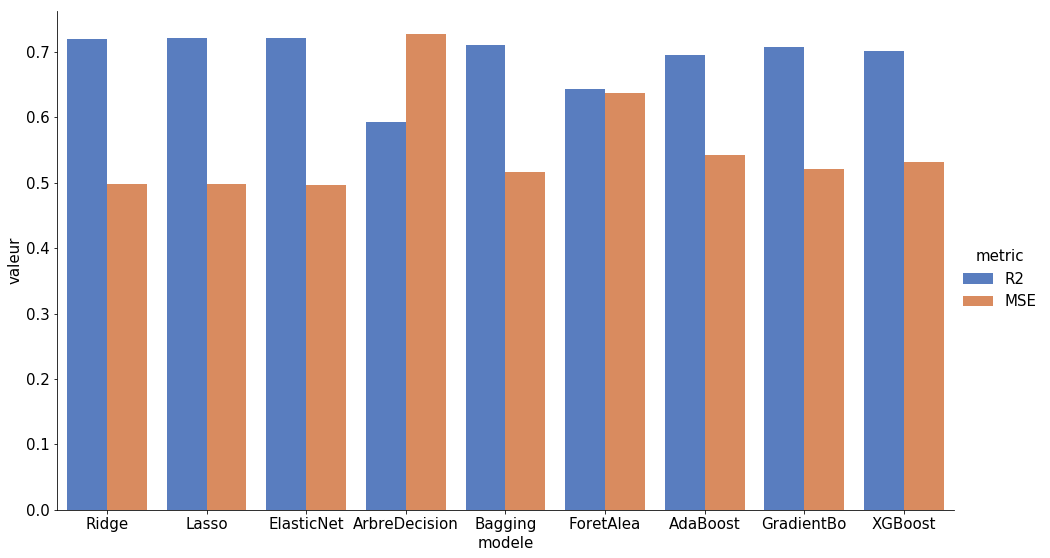

In [117]:
import seaborn as sns

# seaborn.catplot
figure_name = 'results_siteUse.png'

results = pd.DataFrame({'modele': ['Ridge','Lasso','ElasticNet','ArbreDecision','Bagging','ForetAlea','AdaBoost','GradientBo','XGBoost','Ridge','Lasso','ElasticNet','ArbreDecision','Bagging','ForetAlea','AdaBoost','GradientBo','XGBoost'],
                        'metric': ['R2','R2','R2','R2','R2','R2','R2','R2','R2', 'MSE','MSE','MSE','MSE','MSE','MSE','MSE','MSE','MSE'],
                        'valeur':  [0.7205, 0.7211, 0.7220, 0.5927, 0.7106, 0.6433, 0.6962, 0.7081, 0.7022, 0.4989, 0.4978, 0.4962, 0.7269, 0.5165, 0.6367, 0.5422, 0.5211, 0.5317]})

# sns.catplot(x='modele', y='valeur', hue='metric', data=results, kind='bar')
results_plot = sns.catplot(x='modele', y='valeur', hue='metric', data=results, kind='bar',  
            height=8, aspect=1.7, palette="muted", legend_out=True)

results_plot.fig.savefig(figure_name)  


### Sélection des Features

In [201]:
Choix du modèle 'ElasticNet' dont le modèle a été enregistré sous 'elastic2'


226

In [ ]:
# Si on a peu de features, on pourrait les afficher sur un histogramme afin d'évaluer à l'œil,
#   si il n'y a pas déjà une sélection à faire comme ici :

#  https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html


In [74]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import ElasticNet

X = energy_2016[list_col_X]
y = energy_2016['SiteEnergyUse']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

thresholds = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]   # Seuil
seuils  = []
rdeux = []

for th in thresholds:

    select = SelectFromModel(best_elastic, prefit=True, threshold=th)
    X_train2 = select.transform(X_train)                           # élimination des variables < th
    X_test2 = select.transform(X_test)                             # élimination des variables < th

    elastic = ElasticNet(alpha=0.0013354515629298987, l1_ratio=1.7)
    elastic.fit(X_train2, y_train)

    r2 = elastic.score(X_test2, y_test)
    print("\nPour un Seuil de ", th,  ":")
    print("Il reste ", X_train2.shape[1],"colonnes")
    print("R2  =", r2)
    print("MSE =", mean_squared_error(y_true=y_test, y_pred=elastic.predict(X_test2)) )

    rdeux.append(r2)  
    seuils.append(th)

#  Seuil   R2       MSE        nbColonnes
#  ---------------------------------------
#  0.5     0.7050   0.5266     12            => On conserve le seuil de 0.5
#  0.6     0.2539   1.3320     10
#  ---------------------------------------



Pour un Seuil de  0.01 :
Il reste  50 colonnes
R2  = 0.7191232698487947
MSE = 0.5014553256886239

Pour un Seuil de  0.02 :
Il reste  47 colonnes
R2  = 0.7195191916682167
MSE = 0.5007484778668106

Pour un Seuil de  0.03 :
Il reste  46 colonnes
R2  = 0.7185880340676506
MSE = 0.502410893751558

Pour un Seuil de  0.04 :
Il reste  40 colonnes
R2  = 0.7141282974139547
MSE = 0.5103729584443528

Pour un Seuil de  0.05 :
Il reste  36 colonnes
R2  = 0.713463785289776
MSE = 0.5115593263697934

Pour un Seuil de  0.06 :
Il reste  36 colonnes
R2  = 0.713463785289776
MSE = 0.5115593263697934

Pour un Seuil de  0.07 :
Il reste  36 colonnes
R2  = 0.713463785289776
MSE = 0.5115593263697934

Pour un Seuil de  0.08 :
Il reste  34 colonnes
R2  = 0.7127053132825514
MSE = 0.5129134429148123

Pour un Seuil de  0.09 :
Il reste  32 colonnes
R2  = 0.7126624477312871
MSE = 0.5129899717143271

Pour un Seuil de  0.1 :
Il reste  32 colonnes
R2  = 0.7126624477312871
MSE = 0.5129899717143271

Pour un Seuil de  0.2 :


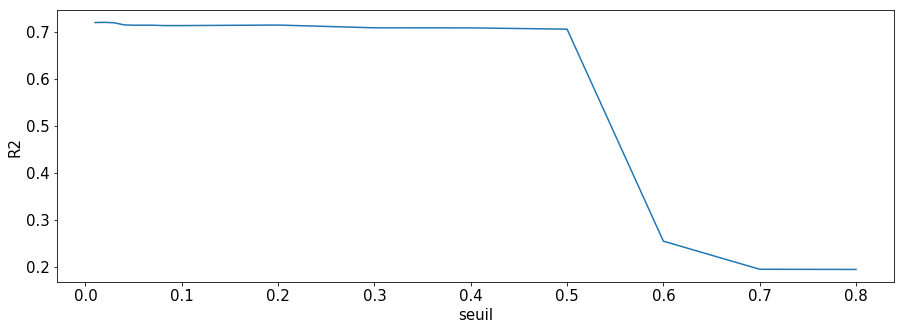

In [75]:
# Affichage du R2 en fonction du seuil imposé :

fig = plt.figure(figsize = (15, 5))   # largeur,hauteur

ax = plt.gca()
ax.plot(seuils, rdeux)

plt.xlabel('seuil')
plt.ylabel('R2')
plt.axis('tight')
plt.savefig( "seuil.png", dpi=50 )
plt.show()


In [76]:
# ----------------------------------------------------
#             R2                   MSE  
# ----------------------------------------------------
# ElasticNet  0.7220               0.4962                 (Meilleur alpha = 0.0013354515629298987,  Meilleur ratio = 1.7)

# th= 0.5     0.7050               0.5266                 12 colonnes


In [77]:
# Choix du seuil de 0.5 qui laisse 12 colonnes

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import ElasticNet

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

th = 0.5   # Seuil

select = SelectFromModel(best_elastic, prefit=True, threshold=th)
X_train2 = select.transform(X_train)

elastic = ElasticNet(alpha=0.0013354515629298987, l1_ratio=1.7)
elastic.fit(X_train2, y_train)

X_test2 = select.transform(X_test)   # X_test doit lui aussi être dégraissé des colonnes inutiles

r2 = elastic.score(X_test2, y_test)
print("\nPour un Seuil de ", th,  ":")
print("Il reste ", X_train2.shape[1],"colonnes")
print("R2  =", r2)
print("MSE =", mean_squared_error(y_true=y_test, y_pred=elastic.predict(X_test2)) )

# select.estimator.coef_



Pour un Seuil de  0.5 :
Il reste  12 colonnes
R2  = 0.7050341130605571
MSE = 0.5266090032542964


#### liste des colonnes conservées

In [78]:
selected_columns = X.columns[select.get_support()]
print("Colonnes sélectionnées :\n", selected_columns)
# select.estimator.coef_

# Nouveau dataframe d'après la liste des colonnes conservées :
X2 = X[selected_columns.tolist()]
X2_starScore = pd.concat([X2, energy_2016['ENERGYSTARScore']], axis = 1)   # # Ajout de la colonne 'ENERGYSTARScore'
X2_starScore.head(2)


Colonnes sélectionnées :
 Index(['PropertyGFATotal', 'LargestPropertyUseType_Data Center', 'LargestPropertyUseType_Distribution Center', 'LargestPropertyUseType_Hospital (General Medical & Surgical)', 'LargestPropertyUseType_Laboratory', 'LargestPropertyUseType_Non-Refrigerated Warehouse', 'LargestPropertyUseType_Other - Recreation', 'LargestPropertyUseType_Restaurant', 'LargestPropertyUseType_Self-Storage Facility', 'LargestPropertyUseType_Supermarket/Grocery Store', 'LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient', 'LargestPropertyUseType_Worship Facility'], dtype='object')


PropertyGFATotal  LargestPropertyUseType_Data Center  LargestPropertyUseType_Distribution Center  LargestPropertyUseType_Hospital (General Medical & Surgical)  LargestPropertyUseType_Laboratory  LargestPropertyUseType_Non-Refrigerated Warehouse  LargestPropertyUseType_Other - Recreation  LargestPropertyUseType_Restaurant  LargestPropertyUseType_Self-Storage Facility  LargestPropertyUseType_Supermarket/Grocery Store  LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient  LargestPropertyUseType_Worship Facility  ENERGYSTARScore
0         11.390012                                 0.0                                         0.0                                                0.0                                           0.0                                                0.0                                        0.0                                0.0                                           0.0                                               0.0                                                0.0                                               0.0         7.745967
1         11.547964                                 0.0                                         0.0                                                0.0                                           0.0                                                0.0                                        0.0                                0.0                                           0.0                                               0.0                                                0.0                                               0.0         7.810250

In [79]:
print(X2_starScore.shape)
print(y.shape)


(1524, 13)
(1524,)


In [80]:
from sklearn.linear_model import ElasticNet

X_train, X_test, y_train, y_test = train_test_split(X2_starScore, y, test_size=0.2, random_state=5)

elastic = ElasticNet(alpha=0.0013354515629298987, l1_ratio=1.7)
elastic.fit(X_train, y_train)
print("R2  =", elastic.score(X_test, y_test))
print("MSE =", mean_squared_error(y_true=y_test, y_pred=elastic.predict(X_test)))


R2  = 0.7430040176389783
MSE = 0.45882050807889246


In [81]:
# ----------------------------------------------------
#             R2                   MSE  
# ----------------------------------------------------
# ElasticNet        0.7220               0.4962                 (Meilleur alpha = 0.0013354515629298987,  Meilleur ratio = 1.7)

# th=0.5            0.7050               0.5266                 12 colonnes

# +ENERGYSTARScore  0.7430               0.4588                 13 colonnes


### Elimination des observations ou 'ENERGYSTARScore' = null

In [82]:

# Nouveau dataframe d'après la liste des colonnes conservées :
X3_starScore = pd.concat([X2_starScore, energy_2016['SiteEnergyUse']], axis = 1)   # # Ajout de la colonne 'SiteEnergyUse'
X3_starScore.head(2)


PropertyGFATotal  LargestPropertyUseType_Data Center  LargestPropertyUseType_Distribution Center  LargestPropertyUseType_Hospital (General Medical & Surgical)  LargestPropertyUseType_Laboratory  LargestPropertyUseType_Non-Refrigerated Warehouse  LargestPropertyUseType_Other - Recreation  LargestPropertyUseType_Restaurant  LargestPropertyUseType_Self-Storage Facility  LargestPropertyUseType_Supermarket/Grocery Store  LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient  LargestPropertyUseType_Worship Facility  ENERGYSTARScore  SiteEnergyUse
0         11.390012                                 0.0                                         0.0                                                0.0                                           0.0                                                0.0                                        0.0                                0.0                                           0.0                                               0.0                                                0.0                                               0.0         7.745967      15.793246
1         11.547964                                 0.0                                         0.0                                                0.0                                           0.0                                                0.0                                        0.0                                0.0                                           0.0                                               0.0                                                0.0                                               0.0         7.810250      15.942305

In [83]:
energy_2016_nn = X3_starScore[X3_starScore.ENERGYSTARScore > 0]
print(energy_2016_nn.shape)

y_nn = energy_2016_nn['SiteEnergyUse']
energy_2016_nn = energy_2016_nn.drop(['SiteEnergyUse'], 1) 
X_nn = energy_2016_nn

# star_nn = energy_2016_nn['ENERGYSTARScore']
X_train, X_test, y_train, y_test = train_test_split(X_nn, y_nn, test_size=0.2, random_state=5)   # Même dataset


(1030, 14)


In [86]:
from sklearn.linear_model import ElasticNet

X_train, X_test, y_train, y_test = train_test_split(X_nn, y_nn, test_size=0.2, random_state=5)

elastic_final = ElasticNet(alpha=0.0013354515629298987, l1_ratio=1.7)
elastic_final.fit(X_train, y_train)
print("R2  =", elastic_final.score(X_test, y_test))
print("MSE =", mean_squared_error(y_true=y_test, y_pred=elastic_final.predict(X_test)))


R2  = 0.8113354243359623
MSE = 0.30994880268727804


In [ ]:
# ----------------------------------------------------
#             R2                   MSE  
# ----------------------------------------------------
# ElasticNet        0.7220               0.4962                 (Meilleur alpha = 0.001335,  Meilleur ratio = 1.7)

# seuil= 0.5        0.7050               0.5266                 12 colonnes

# +ENERGYSTARScore  0.7430               0.4588                 13 colonnes

# +ENERGYSTARScore  0.8113               0.3099
#  non null


### Poids des Coefs du meilleur modèle

In [87]:
# Pour voir le poids des coefs :
coef_dict_baseline = {}
for coef, feat in zip(elastic_final.coef_, X_train.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# Présentation des Coefs du plus Grand au plus Petit :    
sorted(coef_dict_baseline.items(), key=lambda t: t[1], reverse=True)


[('LargestPropertyUseType_Data Center', 2.8106043525109135),
 ('LargestPropertyUseType_Supermarket/Grocery Store', 1.097720455680584),
 ('PropertyGFATotal', 1.0434163162244234),
 ('LargestPropertyUseType_Hospital (General Medical & Surgical)',
  0.8660382865404561),
 ('LargestPropertyUseType_Laboratory', 0.0),
 ('LargestPropertyUseType_Other - Recreation', 0.0),
 ('LargestPropertyUseType_Restaurant', 0.0),
 ('LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient', 0.0),
 ('ENERGYSTARScore', -0.16832379173296957),
 ('LargestPropertyUseType_Worship Facility', -0.5179834868009998),
 ('LargestPropertyUseType_Distribution Center', -0.7676170751353568),
 ('LargestPropertyUseType_Non-Refrigerated Warehouse', -0.9580233060870447),
 ('LargestPropertyUseType_Self-Storage Facility', -3.807395449887726)]